# Bank Marketing Campaign - Client Term Deposit Subscription Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Data Processing

In [2]:
file_path = "bank-full.csv"  # Update with your actual file name and extension
data = pd.read_csv(file_path, sep=';')  # Specify the separator used in the dataset (likely `;` for Bank Marketing)
  
# Separate features (X) and target (y)
data = data.drop(columns=['day', 'month'])
X = data.drop(columns=['y'])
y = data['y']

In [3]:
X.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  duration  campaign  pdays  previous poutcome  
0  unknown       261         1     -1         0  unknown  
1  unknown       151         1     -1         0  unknown  
2  unknown        76         1     -1         0  unknown  
3  unknown        92         1     -1         0  unknown  
4  unknown       198         1     -1         0  unknown

In [4]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [5]:
# Display dataset information
print("Features (X) Info:")
print(X.info())

print("\nTarget (y) Info:")
print(y.info()) 

Features (X) Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.8+ MB
None

Target (y) Info:
<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype 
--------------  ----- 
45211 non-null  object
dtypes: object(1)

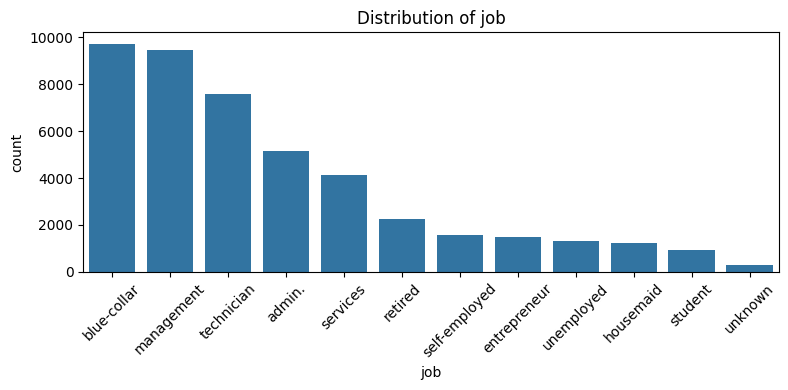

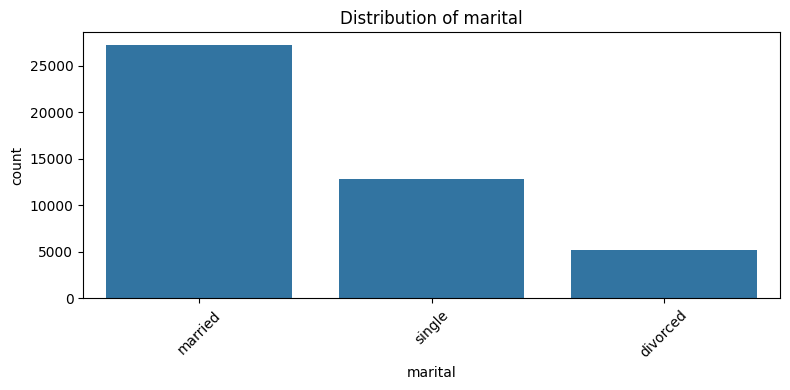

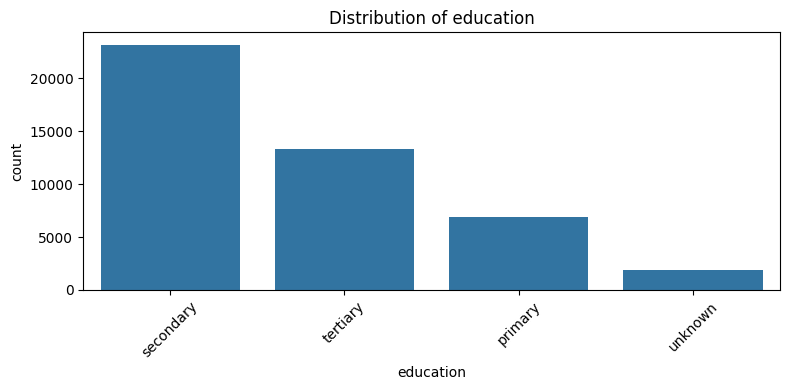

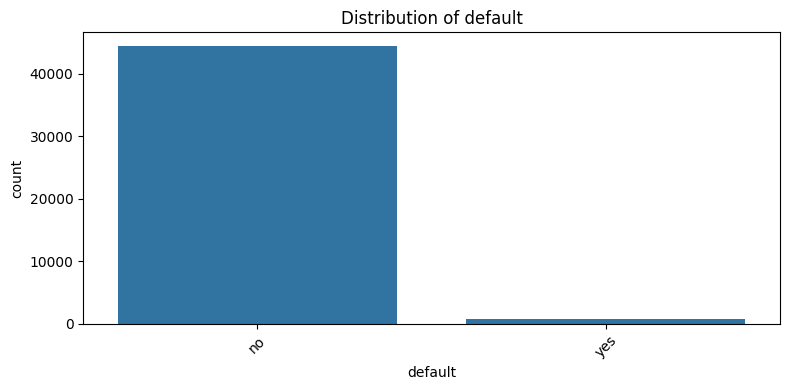

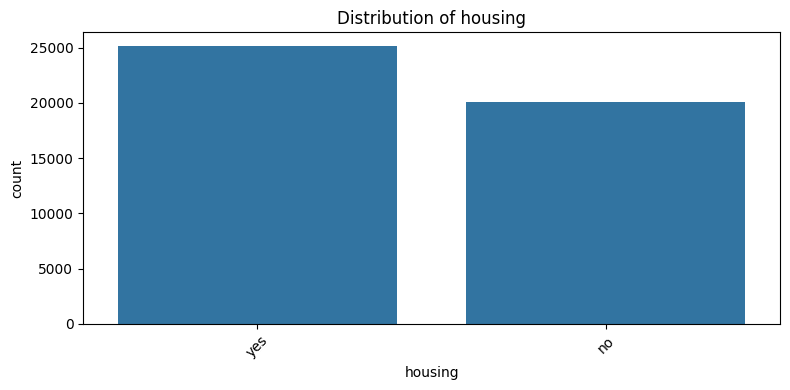

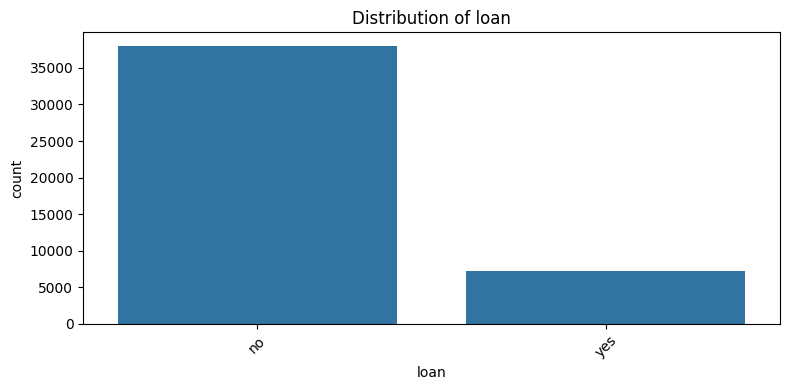

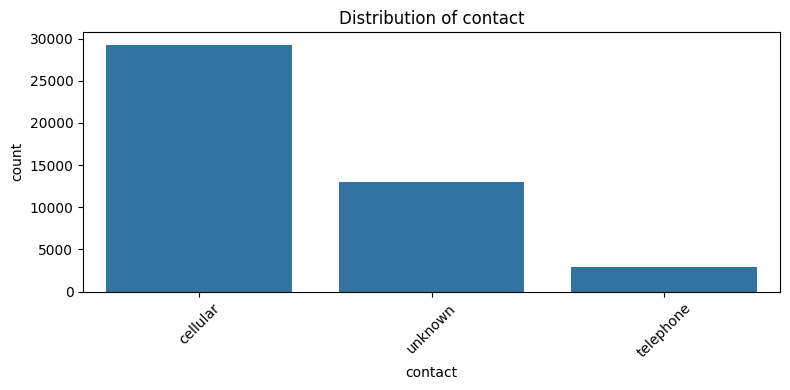

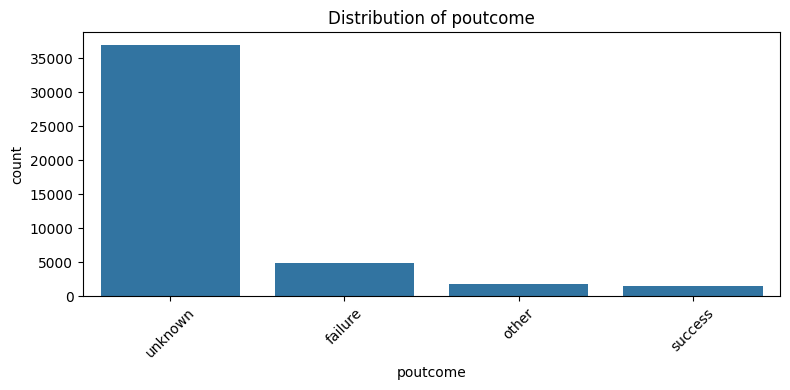

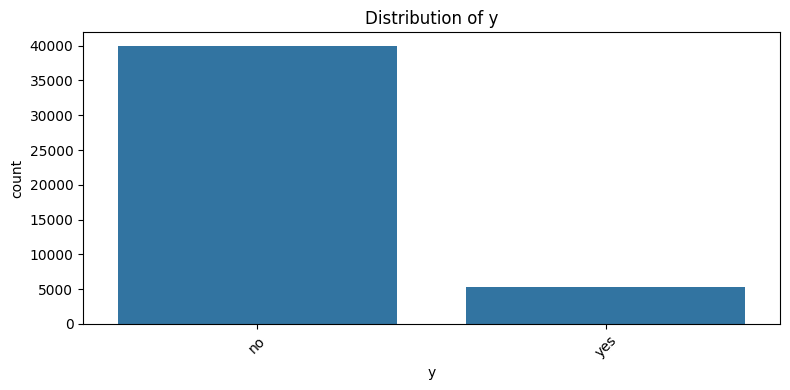

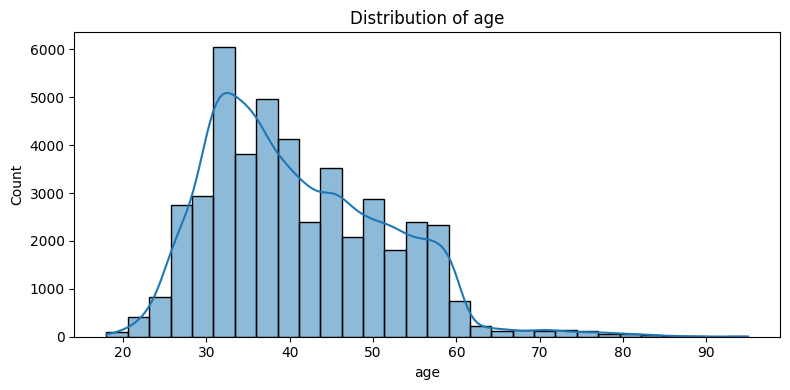

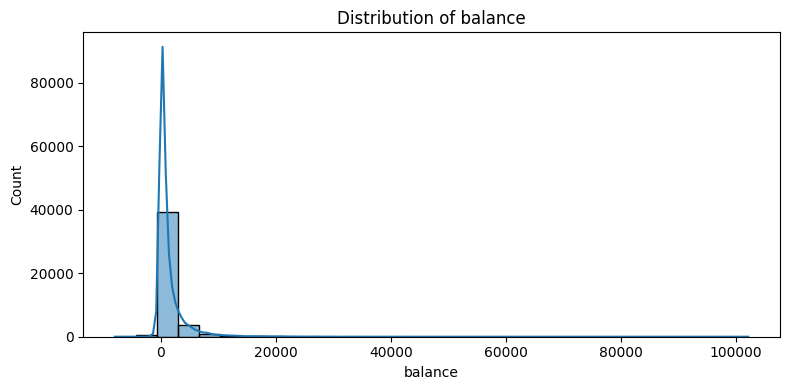

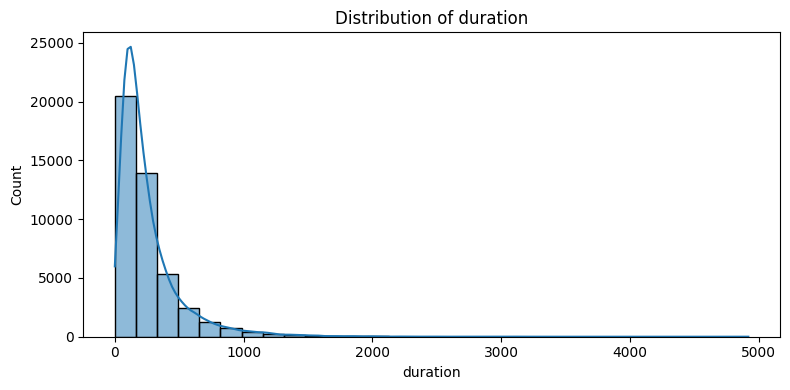

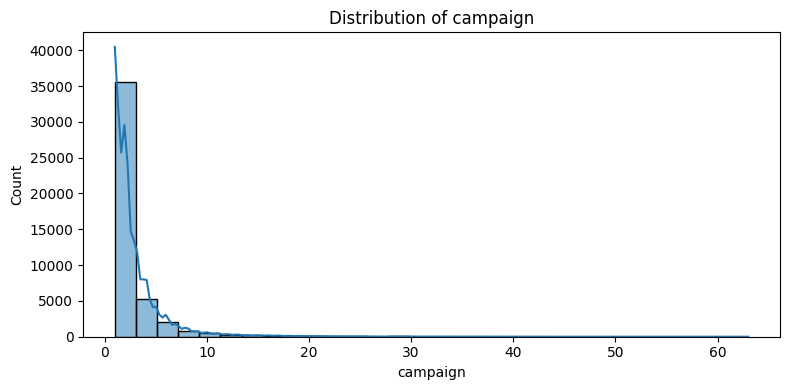

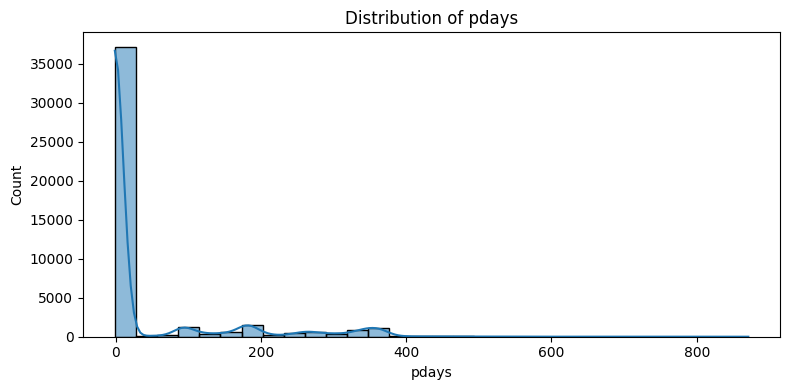

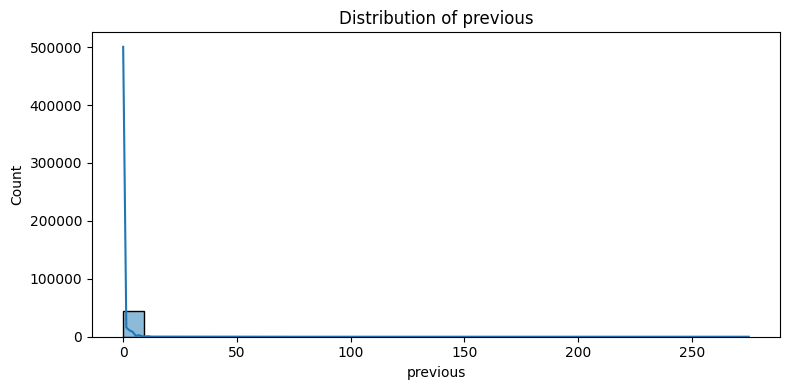

In [6]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64']).columns

# Plot categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{col}_distribution.png")  # Save figures if required
    plt.show()

# Plot numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(f"{col}_histogram.png")  # Save figures if required
    plt.show()

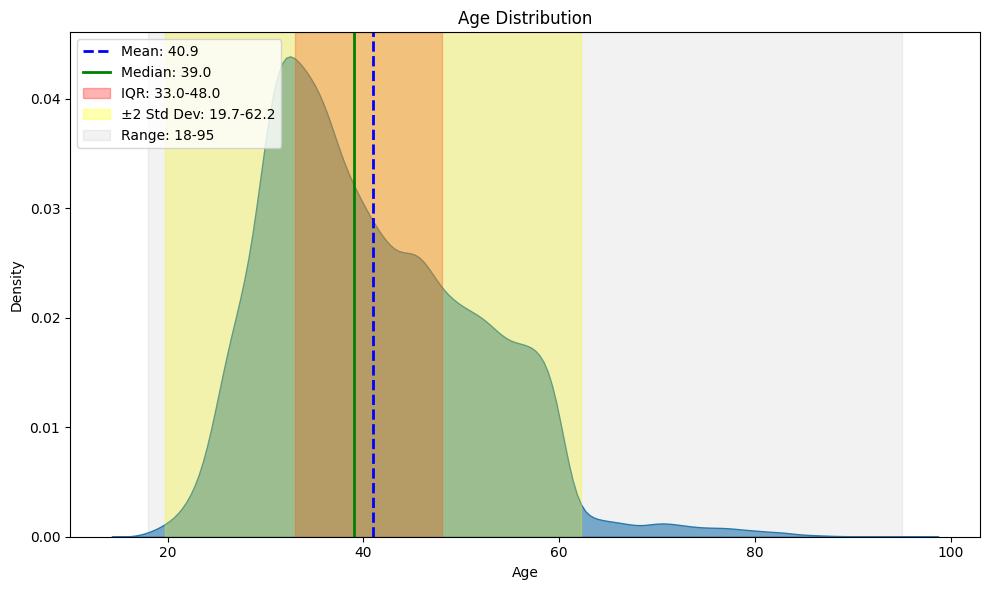

In [7]:
# Set up a KDE figure for a single histogram with detailed statistics for the "age" variable
fig, ax = plt.subplots(figsize=(10, 6))

# Create a KDE plot for the age variable
sns.kdeplot(data=data, x='age', ax=ax, fill=True, alpha=0.6)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Density')

# Calculate statistics for the entire "age" variable
mean = data['age'].mean()
median = data['age'].median()
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
std_dev = data['age'].std()
min_val = data['age'].min()
max_val = data['age'].max()

# Add lines for mean and median
ax.axvline(x=mean, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean:.1f}')
ax.axvline(x=median, color='green', linestyle='-', linewidth=2, label=f'Median: {median:.1f}')

# Add shaded area for IQR
ax.axvspan(q1, q3, color='red', alpha=0.3, label=f'IQR: {q1:.1f}-{q3:.1f}')

# Add shaded area for range ±2 std dev
ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color='yellow', alpha=0.3,
           label=f'±2 Std Dev: {mean - 2 * std_dev:.1f}-{mean + 2 * std_dev:.1f}')

# Add shaded area for full range
ax.axvspan(min_val, max_val, color='grey', alpha=0.1, label=f'Range: {min_val}-{max_val}')

# Add legend
ax.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

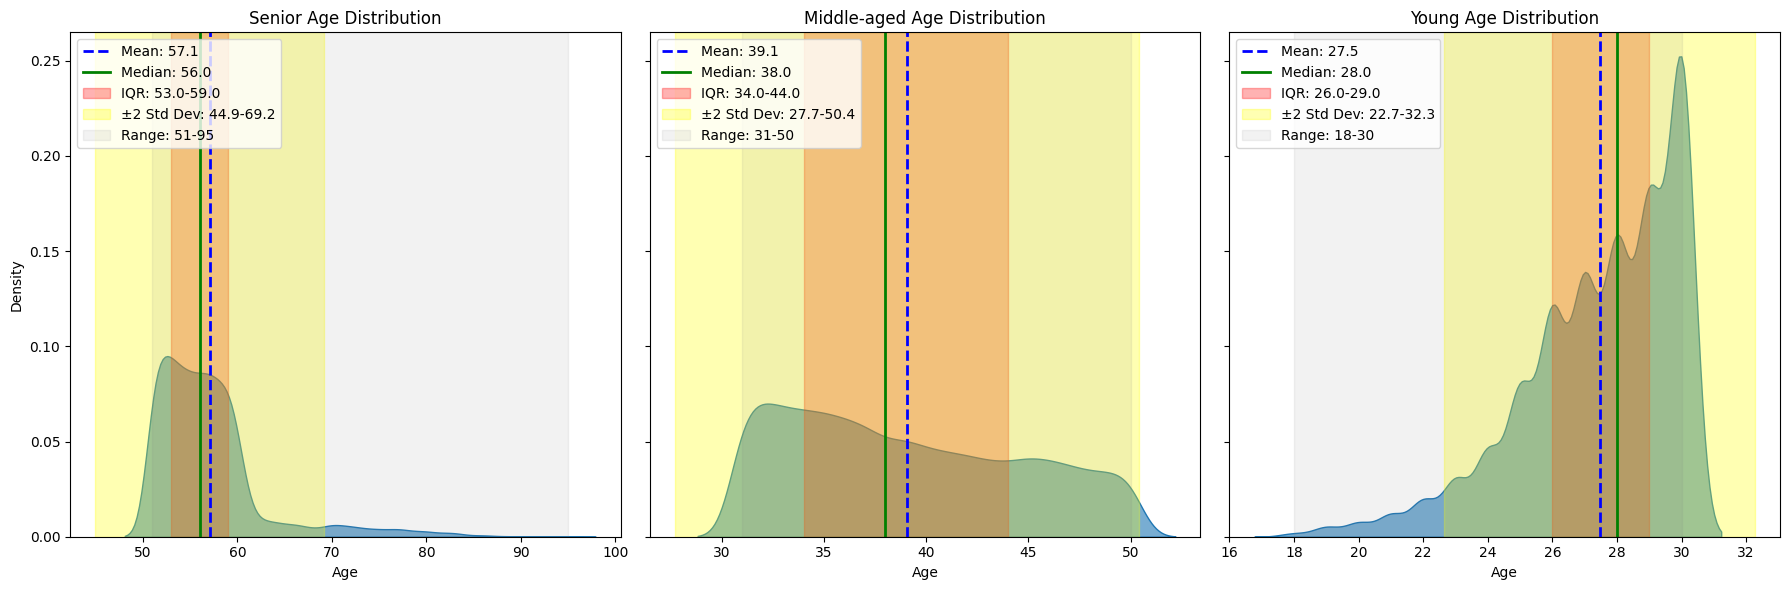

In [8]:
# Assuming 'age_group' is defined for the dataset as:
# Young: Age <= 30, Middle-aged: 30 < Age <= 50, Senior: Age > 50
data['age_group'] = pd.cut(
    data['age'], bins=[0, 30, 50, float('inf')], labels=['Young', 'Middle-aged', 'Senior']
)

# Set up a matplotlib figure with subplots for age groups
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Share y-axis scale for consistency

# Unique age groups in the dataset
age_groups = data['age_group'].unique()

# Iterate over age groups and plot
for ax, group in zip(axes, age_groups):
    subset = data[data['age_group'] == group]
    sns.kdeplot(data=subset, x='age', ax=ax, fill=True, alpha=0.6)
    ax.set_title(f'{group} Age Distribution')
    ax.set_xlabel('Age')
    ax.set_ylabel('Density')

    # Calculate statistics
    mean = subset['age'].mean()
    median = subset['age'].median()
    q1 = subset['age'].quantile(0.25)
    q3 = subset['age'].quantile(0.75)
    std_dev = subset['age'].std()
    min_val = subset['age'].min()
    max_val = subset['age'].max()

    # Add lines for mean and median
    ax.axvline(x=mean, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean:.1f}')
    ax.axvline(x=median, color='green', linestyle='-', linewidth=2, label=f'Median: {median:.1f}')

    # Add shaded area for IQR
    ax.axvspan(q1, q3, color='red', alpha=0.3, label=f'IQR: {q1:.1f}-{q3:.1f}')

    # Add shaded area for range ±2 std dev
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color='yellow', alpha=0.3, label=f'±2 Std Dev: {mean - 2 * std_dev:.1f}-{mean + 2 * std_dev:.1f}')

    # Add shaded area for full range
    ax.axvspan(min_val, max_val, color='grey', alpha=0.1, label=f'Range: {min_val}-{max_val}')

    # Adding legend to each plot
    ax.legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [9]:
# Split data into age groups
age_groups = ['Young', 'Middle-aged', 'Senior']
split_data = {group: data[data['age_group'] == group] for group in age_groups}

# Separate X and y for each age group and export datasets
X_young, y_young = split_data['Young'].drop(columns=['y', 'age_group']), split_data['Young']['y']
X_middle_aged, y_middle_aged = split_data['Middle-aged'].drop(columns=['y', 'age_group']), split_data['Middle-aged']['y']
X_senior, y_senior = split_data['Senior'].drop(columns=['y', 'age_group']), split_data['Senior']['y']

# Export datasets
for group, subset in split_data.items():
    # Drop the 'age_group' column for export
    subset_cleaned = subset.drop(columns=['age_group'])
    
    # Export as CSV
    subset_cleaned.to_csv(f"{group.lower()}_population.csv", index=False)
    
    # Print confirmation
    print(f"{group} population exported with {len(subset)} samples.")

Young population exported with 7030 samples.
Middle-aged population exported with 28926 samples.
Senior population exported with 9255 samples.


In [10]:
X_young.head()

age          job  marital  education default  balance housing loan  \
6    28   management   single   tertiary      no      447     yes  yes   
11   29       admin.   single  secondary      no      390     yes   no   
20   28  blue-collar  married  secondary      no      723     yes  yes   
23   25     services  married  secondary      no       50     yes   no   
36   25  blue-collar  married  secondary      no       -7     yes   no   

    contact  duration  campaign  pdays  previous poutcome  
6   unknown       217         1     -1         0  unknown  
11  unknown       137         1     -1         0  unknown  
20  unknown       262         1     -1         0  unknown  
23  unknown       342         1     -1         0  unknown  
36  unknown       365         1     -1         0  unknown

In [11]:
# Define binary columns and their encoding
binary_columns = ['default', 'housing', 'loan']
binary_mapping = {'yes': 1, 'no': 0}

# Manually encode binary columns in the dataset
for col in binary_columns:
    X_young[col] = X_young[col].map(binary_mapping)

In [12]:
# Identify categorical columns and numerical columns (excluding binary-encoded ones)
categorical_columns = [col for col in X.select_dtypes(include=['object']).columns if col not in binary_columns]
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
categorical_columns

['job', 'marital', 'education', 'contact', 'poutcome']

In [14]:
numerical_columns

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode categorical variables
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)  # Only transform categorical columns
    ],
    remainder='passthrough'  # Leave numerical columns unchanged
)

# Apply the transformer
X_young_encoded_array = transformer.fit_transform(X_young)

# Retrieve feature names for categorical columns
encoder = transformer.named_transformers_['cat']
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
not_encoded_feature_names = [col for col in X.columns if col not in categorical_columns]

# Combine the one-hot-encoded names with numerical column names
final_feature_names = list(encoded_feature_names) + not_encoded_feature_names

# Convert the transformed data into a DataFrame with appropriate feature names
X_young_encoded = pd.DataFrame(X_young_encoded_array, columns=final_feature_names)

# Ensure y_young is numerical
y_young_encoded = y_young.map({'yes': 1, 'no': 0})

In [16]:
X_young_encoded.head()

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0         0.0              0.0               0.0            0.0   
1         1.0              0.0               0.0            0.0   
2         0.0              1.0               0.0            0.0   
3         0.0              0.0               0.0            0.0   
4         0.0              1.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             1.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           0.0          0.0   
2             0.0          0.0                0.0           0.0          0.0   
3             0.0          0.0                0.0           1.0          0.0   
4             0.0          0.0                0.0           0.0          0.0   

   job_technician  ...  poutcome_unknown   age  default  balance  housing  \
0             0.0  ...               1.0  28.0      0.0    447.0      1.0   
1             0.0  ...               1.0  29.0      0.0    390.0      1.0   
2             0.0  ...               1.0  28.0      0.0    723.0      1.0   
3             0.0  ...               1.0  25.0      0.0     50.0      1.0   
4             0.0  ...               1.0  25.0      0.0     -7.0      1.0   

   loan  duration  campaign  pdays  previous  
0   1.0     217.0       1.0   -1.0       0.0  
1   0.0     137.0       1.0   -1.0       0.0  
2   1.0     262.0       1.0   -1.0       0.0  
3   0.0     342.0       1.0   -1.0       0.0  
4   0.0     365.0       1.0   -1.0       0.0  

[5 rows x 35 columns]

k = 3: F1-Scores for each fold = [0.38418079 0.31197772 0.29608939 0.23463687 0.35111111], Mean F1-Score = 0.3156
k = 5: F1-Scores for each fold = [0.42228739 0.30088496 0.26865672 0.21686747 0.34515366], Mean F1-Score = 0.3108
k = 7: F1-Scores for each fold = [0.39759036 0.33333333 0.26139818 0.22839506 0.31392405], Mean F1-Score = 0.3069
k = 9: F1-Scores for each fold = [0.38244514 0.26875    0.24840764 0.19871795 0.30890052], Mean F1-Score = 0.2814
k = 11: F1-Scores for each fold = [0.37785016 0.3030303  0.24528302 0.20578778 0.29362881], Mean F1-Score = 0.2851
k = 15: F1-Scores for each fold = [0.34868421 0.25641026 0.19141914 0.14141414 0.23564955], Mean F1-Score = 0.2347


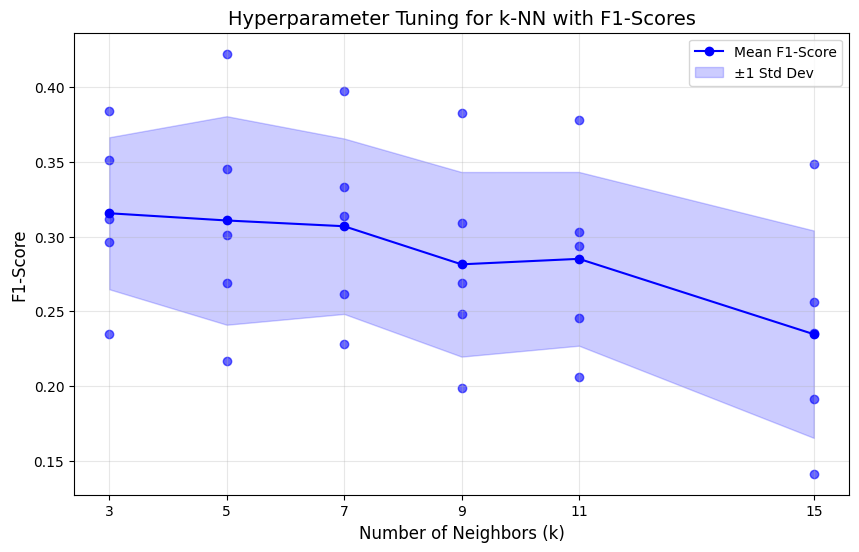

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the hyperparameter values to test
k_values = [3, 5, 7, 9, 11, 15]

# Corrected scorer: Set pos_label to 1 (assuming binary classification with 0 and 1)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Initialize a dictionary to store results for each k
results = {}

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize k-NN with current k
    cv_scores = cross_val_score(knn, X_young_encoded, y_young_encoded, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[k] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each k
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Print F1-Scores for each fold and their mean for each k
for k, scores in results.items():
    print(f"k = {k}: F1-Scores for each fold = {scores}, Mean F1-Score = {scores.mean():.4f}")

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(k_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for k, scores in results.items():
    plt.scatter([k] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for k-NN with F1-Scores', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

## Models Training & Implementation

### k-Nearest Neighbors:

#### Young

In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_young_train, X_young_val, y_young_train, y_young_val = train_test_split(
    X_young_encoded,
    y_young_encoded,        
    test_size=0.1,    
    random_state=88,  
    stratify=y_young_encoded
)

# Print the sizes of the splits
print(f"Training set size: {len(X_young_train)} samples")
print(f"Validation set size: {len(X_young_val)} samples")

Training set size: 6327 samples
Validation set size: 703 samples


In [19]:
# Convert X_young_train and X_young_val back to DataFrames with proper column names
X_young_train_df = pd.DataFrame(X_young_train, columns=final_feature_names)
X_young_train_df['target'] = y_young_train.values  # Add target column
X_young_train_df.to_csv("X_young_train.csv", index=False)

X_young_val_df = pd.DataFrame(X_young_val, columns=final_feature_names)
X_young_val_df['target'] = y_young_val.values  # Add target column
X_young_val_df.to_csv("X_young_val.csv", index=False)

k = 3: F1-Scores for each fold = [0.36842105 0.37430168 0.42134831 0.35849057 0.36734694], Mean F1-Score = 0.3780
k = 5: F1-Scores for each fold = [0.3836478  0.3853211  0.43804035 0.33670034 0.36538462], Mean F1-Score = 0.3818
k = 7: F1-Scores for each fold = [0.35099338 0.36012862 0.41121495 0.31205674 0.34210526], Mean F1-Score = 0.3553
k = 9: F1-Scores for each fold = [0.34812287 0.31081081 0.37299035 0.31914894 0.28178694], Mean F1-Score = 0.3266
k = 11: F1-Scores for each fold = [0.32508834 0.29787234 0.36842105 0.31884058 0.30555556], Mean F1-Score = 0.3232
k = 15: F1-Scores for each fold = [0.32490975 0.3        0.3554007  0.27272727 0.2527881 ], Mean F1-Score = 0.3012


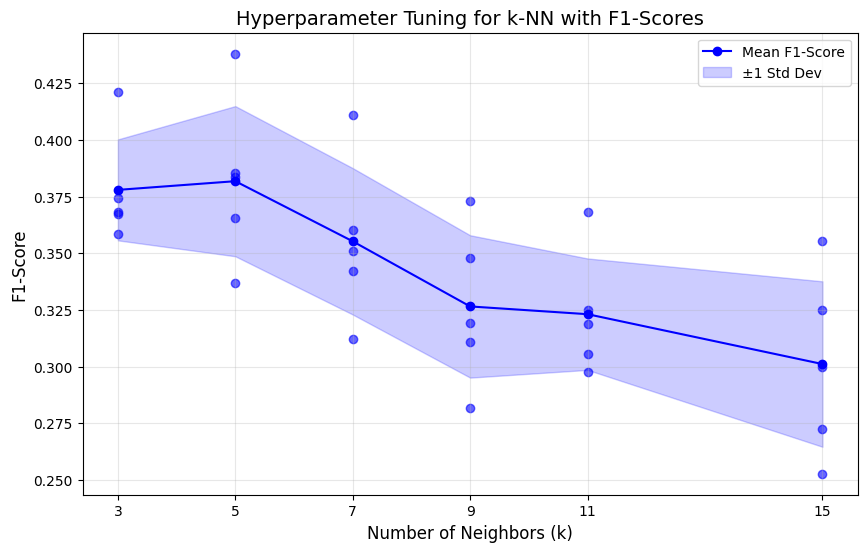

In [20]:
# Initialize a dictionary to store results for each k
results = {}

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize k-NN with current k
    cv_scores = cross_val_score(knn, X_young_train, y_young_train, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[k] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each k
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Print F1-Scores for each fold and their mean for each k
for k, scores in results.items():
    print(f"k = {k}: F1-Scores for each fold = {scores}, Mean F1-Score = {scores.mean():.4f}")

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(k_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for k, scores in results.items():
    plt.scatter([k] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for k-NN with F1-Scores', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

The best hyperparameter value for the k-NN model is k=3. This value was selected as it achieved a mean F1-score of 0.3780 across the 5-fold cross-validation, which is slightly lower than the highest mean F1-score of 0.3818 obtained with k=5. However, k=3 was chosen due to its narrower standard deviation, indicating more consistent performance across the folds. This selection reflects the importance of balancing precision and recall, as measured by the F1-score, which is crucial for handling imbalanced datasets effectively. Lower values of k tend to capture finer patterns in the data, which aligns well with this dataset's requirements.

Training runtime: 0.0021 seconds
Prediction runtime: 0.0183 seconds


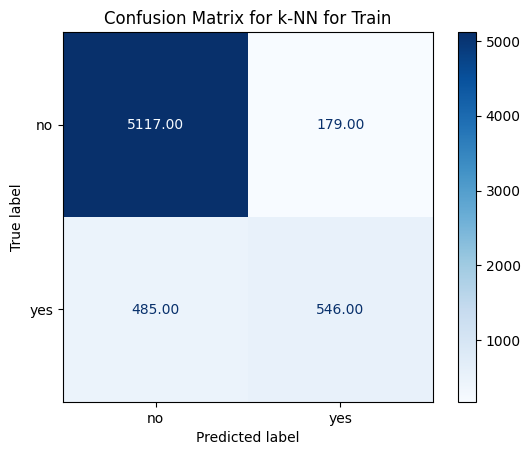

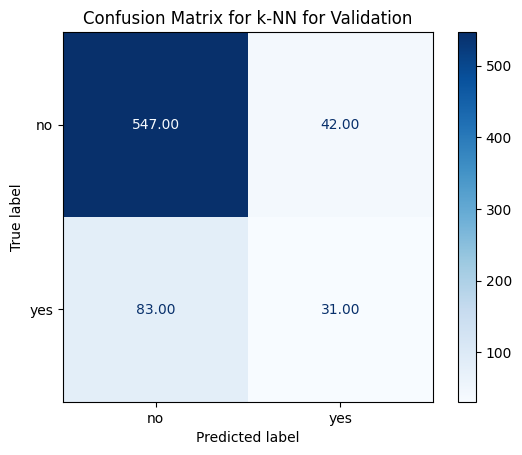


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      5296
         yes       0.75      0.53      0.62      1031

    accuracy                           0.90      6327
   macro avg       0.83      0.75      0.78      6327
weighted avg       0.89      0.90      0.89      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.87      0.93      0.90       589
         yes       0.42      0.27      0.33       114

    accuracy                           0.82       703
   macro avg       0.65      0.60      0.61       703
weighted avg       0.80      0.82      0.81       703



In [21]:
import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire training dataset and Measure training runtime
start_time = time.time()
knn_best.fit(X_young_train, y_young_train)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

y_train_pred = knn_best.predict(X_young_train)

# Predict on the validation dataset
start_time = time.time()
y_val_pred = knn_best.predict(X_young_val)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrix
conf_matrix_train = confusion_matrix(y_young_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val, y_val_pred)

# Plot confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Train')
plt.show()

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Validation')
plt.show()

print("\nClassification Report for Train:")
print(classification_report(y_young_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the dataset to ensure coefficients are comparable
scaler = StandardScaler()
X_young_scaled = scaler.fit_transform(X_young_encoded)

# Train the logistic regression model
log_reg = LogisticRegression(random_state=88, max_iter=1000)
log_reg.fit(X_young_scaled, y_young_encoded)

# Get absolute values of coefficients
coefficients = np.abs(log_reg.coef_[0])

# Sort the indices of features by their coefficient values
top_k = X_young_encoded.shape[1] // 2  # Number of features to select
indices = np.argsort(coefficients)[-top_k:][::-1]  # Sort in descending order

# Select the top 19 features
X_young_reduced = X_young_encoded.iloc[:, indices]

# Get feature names and their corresponding coefficients
selected_feature_names = X_young_encoded.columns[indices]
selected_coefficients = coefficients[indices]

# Combine feature names and coefficients into a DataFrame
feature_coeff_df = pd.DataFrame({
    "Feature": selected_feature_names,
    "Absolute Coefficient": selected_coefficients
}).sort_values(by="Absolute Coefficient", ascending=False)

# Print results
print(f"Reduced Dimensions: {X_young_reduced.shape[1]}")
print("Selected Features Ranked by Absolute Coefficients:")
print(feature_coeff_df)

Reduced Dimensions: 17
Selected Features Ranked by Absolute Coefficients:
              Feature  Absolute Coefficient
0            duration              1.076467
1             housing              0.452022
2    poutcome_success              0.375420
3                loan              0.262022
4     contact_unknown              0.258178
5    contact_cellular              0.252089
6                 age              0.225309
7    poutcome_unknown              0.215511
8               pdays              0.143223
9            campaign              0.142660
10        job_retired              0.128339
11    marital_married              0.125799
12     marital_single              0.122637
13            balance              0.102476
14        job_student              0.082091
15  education_primary              0.073419
16   job_entrepreneur              0.066189


In [23]:
# Split reduced dataset
X_young_train_reduced, X_young_val_reduced, y_young_train_reduced, y_young_val_reduced = train_test_split(
    X_young_reduced,
    y_young_encoded,
    test_size=0.1,
    random_state=88,
    stratify=y_young_encoded
)

# Print sizes of training and validation sets
print(f"Training set size (reduced): {len(X_young_train_reduced)} samples")
print(f"Validation set size (reduced): {len(X_young_val_reduced)} samples")

Training set size (reduced): 6327 samples
Validation set size (reduced): 703 samples


In [24]:
# Convert X_young_train to DataFrame with default column names
X_train_reduced_df = pd.DataFrame(X_young_train_reduced)
X_train_reduced_df['target'] = y_young_train_reduced.values
X_train_reduced_df.to_csv("X_young_train_reduced.csv", index=False)

X_val_reduced_df = pd.DataFrame(X_young_val_reduced)
X_val_reduced_df['target'] = y_young_val_reduced.values
X_val_reduced_df.to_csv("X_young_val_reduced.csv", index=False)

k = 3: F1-Scores for each fold = [0.36842105 0.37325905 0.42016807 0.35849057 0.36842105], Mean F1-Score = 0.3778
k = 5: F1-Scores for each fold = [0.3836478  0.3803681  0.43804035 0.33670034 0.36538462], Mean F1-Score = 0.3808
k = 7: F1-Scores for each fold = [0.35099338 0.36012862 0.41121495 0.31205674 0.34323432], Mean F1-Score = 0.3555
k = 9: F1-Scores for each fold = [0.34812287 0.31649832 0.37299035 0.31914894 0.28178694], Mean F1-Score = 0.3277
k = 11: F1-Scores for each fold = [0.32508834 0.29893238 0.36963696 0.31272727 0.29965157], Mean F1-Score = 0.3212
k = 15: F1-Scores for each fold = [0.32490975 0.3        0.3554007  0.27272727 0.2527881 ], Mean F1-Score = 0.3012


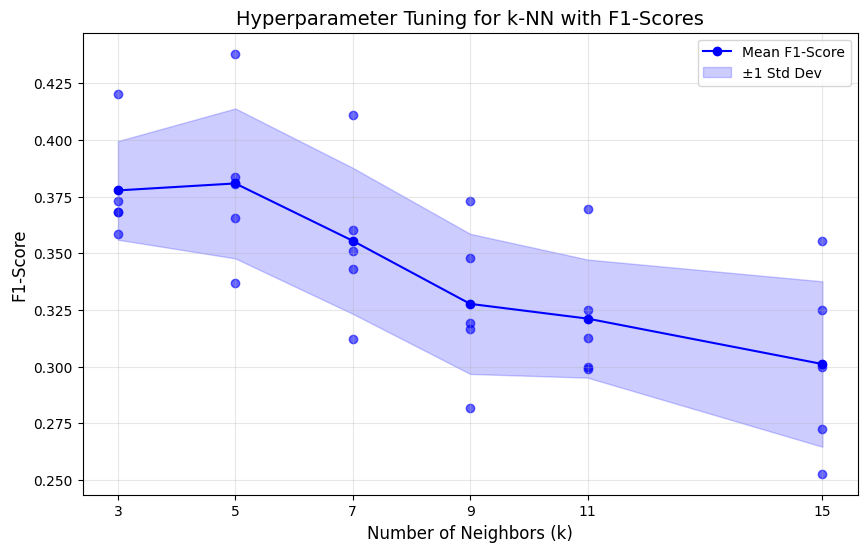

In [25]:
# Initialize a dictionary to store results for each k
results = {}

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize k-NN with current k
    cv_scores = cross_val_score(knn, X_young_train_reduced, y_young_train_reduced, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[k] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each k
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Print F1-Scores for each fold and their mean for each k
for k, scores in results.items():
    print(f"k = {k}: F1-Scores for each fold = {scores}, Mean F1-Score = {scores.mean():.4f}")

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(k_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for k, scores in results.items():
    plt.scatter([k] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for k-NN with F1-Scores', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

Training runtime: 0.0022 seconds
Prediction runtime: 0.0169 seconds


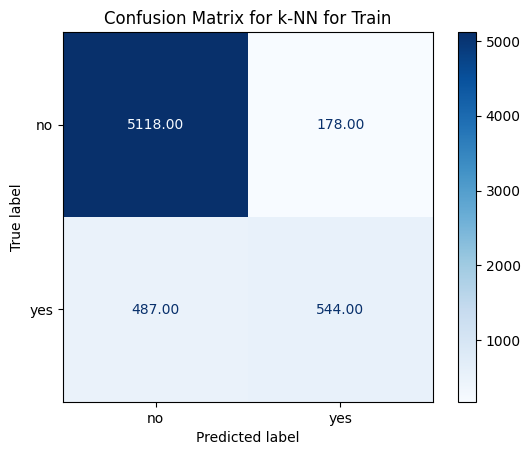

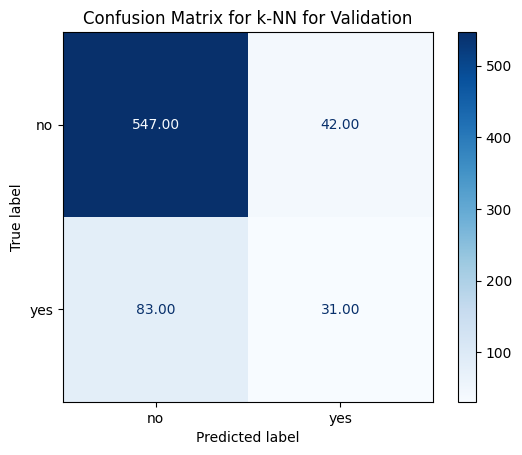


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      5296
         yes       0.75      0.53      0.62      1031

    accuracy                           0.89      6327
   macro avg       0.83      0.75      0.78      6327
weighted avg       0.89      0.89      0.89      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.87      0.93      0.90       589
         yes       0.42      0.27      0.33       114

    accuracy                           0.82       703
   macro avg       0.65      0.60      0.61       703
weighted avg       0.80      0.82      0.81       703



In [26]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire training dataset and Measure training runtime
start_time = time.time()
knn_best.fit(X_young_train_reduced, y_young_train_reduced)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

y_train_reduced_pred = knn_best.predict(X_young_train_reduced)

# Predict on the validation dataset
start_time = time.time()
y_val_reduced_pred = knn_best.predict(X_young_val_reduced)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrix
conf_matrix_train_reduced = confusion_matrix(y_young_train_reduced, y_train_reduced_pred)
conf_matrix_val_reduced = confusion_matrix(y_young_val_reduced, y_val_reduced_pred)

# Plot confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train_reduced, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Train')
plt.show()

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val_reduced, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Validation')
plt.show()

print("\nClassification Report for Train:")
print(classification_report(y_young_train_reduced, y_train_reduced_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val_reduced, y_val_reduced_pred, target_names=["no", "yes"]))

#### Middle_aged

In [27]:
# Manually encode binary columns in the dataset
for col in binary_columns:
    X_middle_aged[col] = X_middle_aged[col].map(binary_mapping)

In [28]:
# Apply the transformer
X_middle_aged_encoded_array = transformer.fit_transform(X_middle_aged)

# Convert the transformed data into a DataFrame with appropriate feature names
X_middle_aged_encoded = pd.DataFrame(X_middle_aged_encoded_array, columns=final_feature_names)

# Ensure y_young is numerical
y_middle_aged_encoded = y_middle_aged.map({'yes': 1, 'no': 0})

In [29]:
# Split the dataset
X_middle_aged_train, X_middle_aged_val, y_middle_aged_train, y_middle_aged_val = train_test_split(
    X_middle_aged_encoded,
    y_middle_aged_encoded,        
    test_size=0.1,    
    random_state=88,  
    stratify=y_middle_aged_encoded
)

# Print the sizes of the splits
print(f"Training set size: {len(X_middle_aged_train)} samples")
print(f"Validation set size: {len(X_middle_aged_val)} samples")

Training set size: 26033 samples
Validation set size: 2893 samples


In [30]:
# Convert X_middle_aged_train and X_middle_aged_val back to DataFrames with proper column names
X_middle_aged_train_df = pd.DataFrame(X_middle_aged_train, columns=final_feature_names)
X_middle_aged_train_df['target'] = y_middle_aged_train.values  # Add target column
X_middle_aged_train_df.to_csv("X_middle_aged_train.csv", index=False)

X_middle_aged_val_df = pd.DataFrame(X_middle_aged_val, columns=final_feature_names)
X_middle_aged_val_df['target'] = y_middle_aged_val.values  # Add target column
X_middle_aged_val_df.to_csv("X_middle_aged_val.csv", index=False)

k = 3: F1-Scores for each fold = [0.32019116 0.33047736 0.33740831 0.3356974  0.36027714], Mean F1-Score = 0.3368
k = 5: F1-Scores for each fold = [0.31457801 0.32166018 0.35984355 0.3461063  0.35897436], Mean F1-Score = 0.3402
k = 7: F1-Scores for each fold = [0.30729167 0.32533333 0.31737346 0.33806452 0.34020619], Mean F1-Score = 0.3257
k = 9: F1-Scores for each fold = [0.29986613 0.31793478 0.30747532 0.3187251  0.31331593], Mean F1-Score = 0.3115
k = 11: F1-Scores for each fold = [0.2829932  0.3229308  0.29512894 0.30896552 0.31451613], Mean F1-Score = 0.3049
k = 15: F1-Scores for each fold = [0.26441632 0.29479769 0.29282577 0.29101284 0.30136986], Mean F1-Score = 0.2889


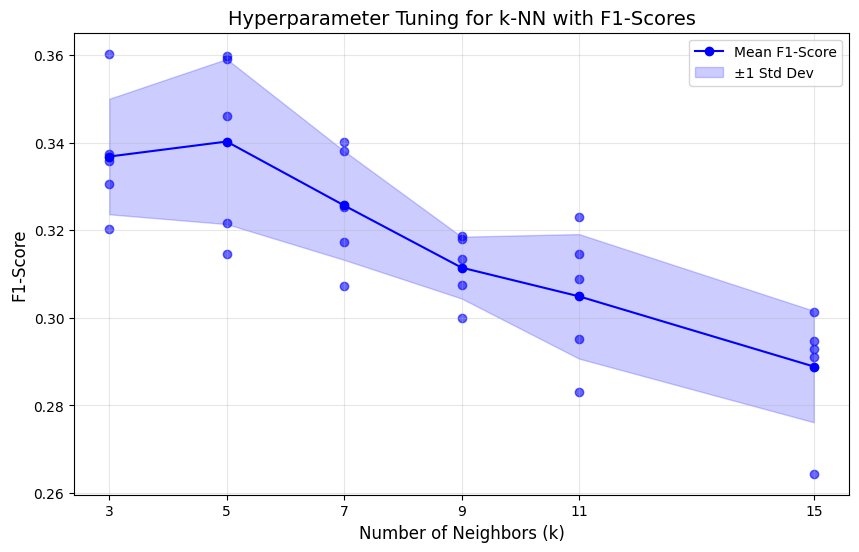

In [31]:
# Initialize a dictionary to store results for each k
results = {}

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize k-NN with current k
    cv_scores = cross_val_score(knn, X_middle_aged_train, y_middle_aged_train, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[k] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each k
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Print F1-Scores for each fold and their mean for each k
for k, scores in results.items():
    print(f"k = {k}: F1-Scores for each fold = {scores}, Mean F1-Score = {scores.mean():.4f}")

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(k_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for k, scores in results.items():
    plt.scatter([k] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for k-NN with F1-Scores', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

Training runtime: 0.0021 seconds
Prediction runtime: 0.0932 seconds


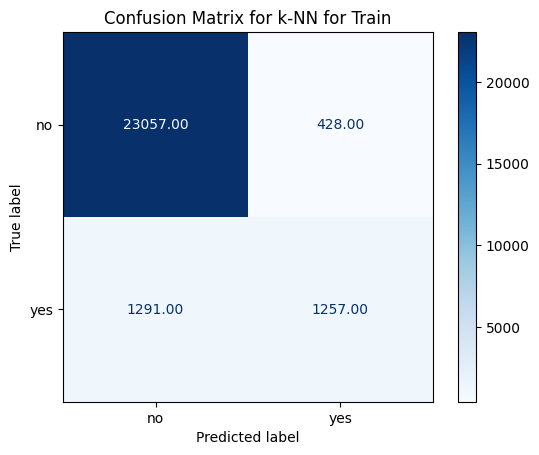

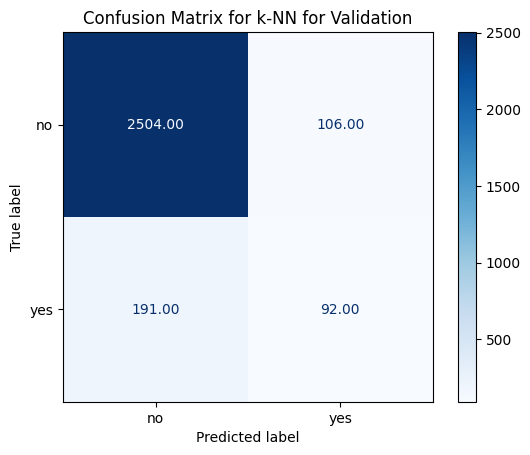


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.95      0.98      0.96     23485
         yes       0.75      0.49      0.59      2548

    accuracy                           0.93     26033
   macro avg       0.85      0.74      0.78     26033
weighted avg       0.93      0.93      0.93     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.96      0.94      2610
         yes       0.46      0.33      0.38       283

    accuracy                           0.90      2893
   macro avg       0.70      0.64      0.66      2893
weighted avg       0.88      0.90      0.89      2893



In [32]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire training dataset and Measure training runtime
start_time = time.time()
knn_best.fit(X_middle_aged_train, y_middle_aged_train)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

y_train_pred = knn_best.predict(X_middle_aged_train)

# Predict on the validation dataset
start_time = time.time()
y_val_pred = knn_best.predict(X_middle_aged_val)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrix
conf_matrix_train = confusion_matrix(y_middle_aged_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val, y_val_pred)

# Plot confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Train')
plt.show()

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Validation')
plt.show()

print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

In [33]:
# Scale the dataset to ensure coefficients are comparable
scaler = StandardScaler()
X_middle_aged_scaled = scaler.fit_transform(X_middle_aged_encoded)

# Train the logistic regression model
log_reg = LogisticRegression(random_state=88, max_iter=1000)
log_reg.fit(X_middle_aged_scaled, y_middle_aged_encoded)

# Get absolute values of coefficients
coefficients = np.abs(log_reg.coef_[0])

# Sort the indices of features by their coefficient values
top_k = X_middle_aged_encoded.shape[1] // 2  # Number of features to select
indices = np.argsort(coefficients)[-top_k:][::-1]  # Sort in descending order

# Select the top 19 features
X_middle_aged_reduced = X_middle_aged_encoded.iloc[:, indices]

# Get feature names and their corresponding coefficients
selected_feature_names = X_middle_aged_encoded.columns[indices]
selected_coefficients = coefficients[indices]

# Combine feature names and coefficients into a DataFrame
feature_coeff_df = pd.DataFrame({
    "Feature": selected_feature_names,
    "Absolute Coefficient": selected_coefficients
}).sort_values(by="Absolute Coefficient", ascending=False)

# Print results
print(f"Reduced Dimensions: {X_middle_aged_reduced.shape[1]}")
print("Selected Features Ranked by Absolute Coefficients:")
print(feature_coeff_df)

Reduced Dimensions: 17
Selected Features Ranked by Absolute Coefficients:
                Feature  Absolute Coefficient
0              duration              1.095784
1      poutcome_success              0.379431
2               housing              0.365600
3              campaign              0.314615
4       contact_unknown              0.267787
5      contact_cellular              0.213783
6                  loan              0.174138
7      poutcome_unknown              0.170407
8    education_tertiary              0.123776
9            job_admin.              0.110285
10    contact_telephone              0.097600
11    education_primary              0.091148
12              balance              0.059660
13    job_self-employed              0.056349
14  education_secondary              0.053638
15        job_housemaid              0.045875
16      job_blue-collar              0.042253


In [34]:
# Split reduced dataset
X_middle_aged_train_reduced, X_middle_aged_val_reduced, y_middle_aged_train_reduced, y_middle_aged_val_reduced = train_test_split(
    X_middle_aged_reduced,
    y_middle_aged_encoded,
    test_size=0.1,
    random_state=88,
    stratify=y_middle_aged_encoded
)

# Print sizes of training and validation sets
print(f"Training set size (reduced): {len(X_middle_aged_train_reduced)} samples")
print(f"Validation set size (reduced): {len(X_middle_aged_val_reduced)} samples")

Training set size (reduced): 26033 samples
Validation set size (reduced): 2893 samples


In [35]:
# Convert X_middle_aged_train to DataFrame with default column names
X_train_reduced_df = pd.DataFrame(X_middle_aged_train_reduced)
X_train_reduced_df['target'] = y_middle_aged_train_reduced.values
X_train_reduced_df.to_csv("X_middle_aged_train_reduced.csv", index=False)

X_val_reduced_df = pd.DataFrame(X_middle_aged_val_reduced)
X_val_reduced_df['target'] = y_middle_aged_val_reduced.values
X_val_reduced_df.to_csv("X_middle_aged_val_reduced.csv", index=False)

k = 3: F1-Scores for each fold = [0.25031928 0.29177057 0.3113325  0.28229665 0.30532544], Mean F1-Score = 0.2882
k = 5: F1-Scores for each fold = [0.26720648 0.26216216 0.30369357 0.28791774 0.28571429], Mean F1-Score = 0.2813
k = 7: F1-Scores for each fold = [0.25626741 0.26160338 0.28939828 0.28797886 0.28989362], Mean F1-Score = 0.2770
k = 9: F1-Scores for each fold = [0.26197183 0.27132867 0.30527817 0.29032258 0.26038781], Mean F1-Score = 0.2779
k = 11: F1-Scores for each fold = [0.26037196 0.2853067  0.28444444 0.29476584 0.28729282], Mean F1-Score = 0.2824
k = 15: F1-Scores for each fold = [0.26248217 0.28653295 0.27300613 0.2697274  0.28652482], Mean F1-Score = 0.2757


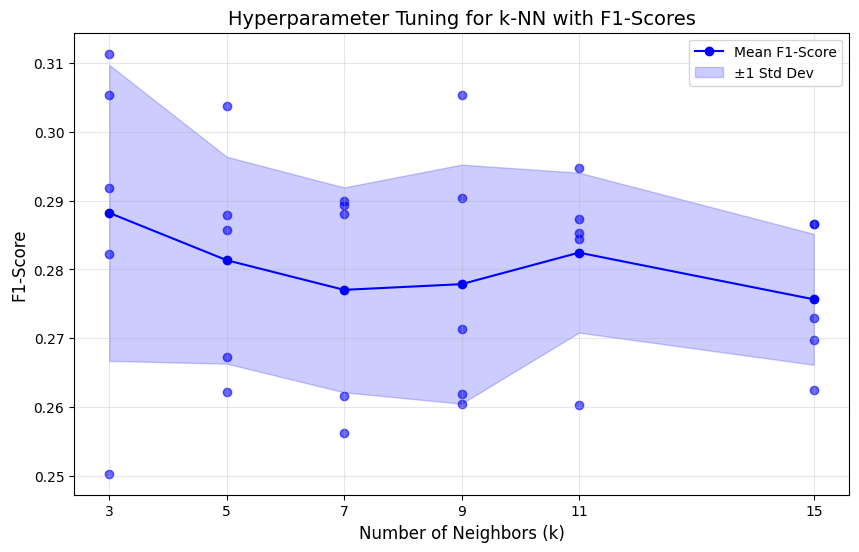

In [36]:
# Initialize a dictionary to store results for each k
results = {}

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize k-NN with current k
    cv_scores = cross_val_score(knn, X_middle_aged_train_reduced, y_middle_aged_train_reduced, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[k] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each k
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Print F1-Scores for each fold and their mean for each k
for k, scores in results.items():
    print(f"k = {k}: F1-Scores for each fold = {scores}, Mean F1-Score = {scores.mean():.4f}")

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(k_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for k, scores in results.items():
    plt.scatter([k] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for k-NN with F1-Scores', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

Training runtime: 0.0028 seconds
Prediction runtime: 0.0839 seconds


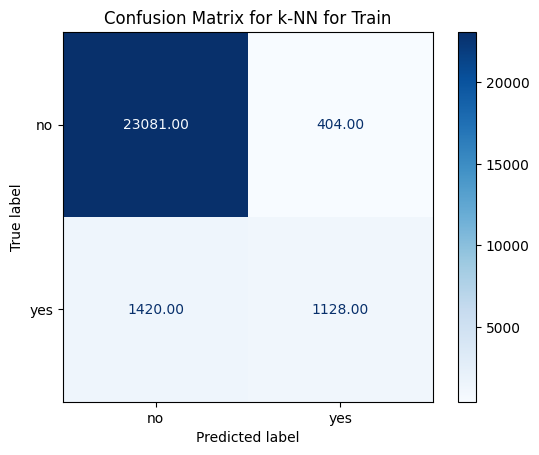

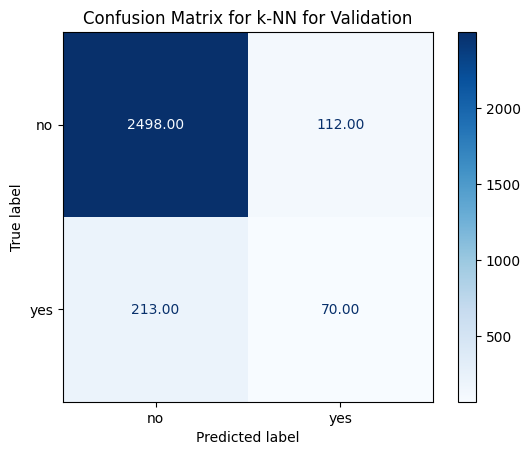


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.94      0.98      0.96     23485
         yes       0.74      0.44      0.55      2548

    accuracy                           0.93     26033
   macro avg       0.84      0.71      0.76     26033
weighted avg       0.92      0.93      0.92     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      2610
         yes       0.38      0.25      0.30       283

    accuracy                           0.89      2893
   macro avg       0.65      0.60      0.62      2893
weighted avg       0.87      0.89      0.88      2893



In [37]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire training dataset and Measure training runtime
start_time = time.time()
knn_best.fit(X_middle_aged_train_reduced, y_middle_aged_train_reduced)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

y_train_reduced_pred = knn_best.predict(X_middle_aged_train_reduced)

# Predict on the validation dataset
start_time = time.time()
y_val_reduced_pred = knn_best.predict(X_middle_aged_val_reduced)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrix
conf_matrix_train_reduced = confusion_matrix(y_middle_aged_train_reduced, y_train_reduced_pred)
conf_matrix_val_reduced = confusion_matrix(y_middle_aged_val_reduced, y_val_reduced_pred)

# Plot confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train_reduced, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Train')
plt.show()

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val_reduced, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Validation')
plt.show()

print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train_reduced, y_train_reduced_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val_reduced, y_val_reduced_pred, target_names=["no", "yes"]))

#### Senior

In [38]:
# Manually encode binary columns in the dataset
for col in binary_columns:
    X_senior[col] = X_senior[col].map(binary_mapping)

In [39]:
# Apply the transformer
X_senior_encoded_array = transformer.fit_transform(X_senior)

# Retrieve feature names for categorical columns
encoder = transformer.named_transformers_['cat']
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
not_encoded_feature_names = [col for col in X.columns if col not in categorical_columns]

# Combine the one-hot-encoded names with numerical column names
final_feature_names = list(encoded_feature_names) + not_encoded_feature_names

# Convert the transformed data into a DataFrame with appropriate feature names
X_senior_encoded = pd.DataFrame(X_senior_encoded_array, columns=final_feature_names)

# Ensure y_young is numerical
y_senior_encoded = y_senior.map({'yes': 1, 'no': 0})

In [40]:
# Split the dataset
X_senior_train, X_senior_val, y_senior_train, y_senior_val = train_test_split(
    X_senior_encoded,
    y_senior_encoded,        
    test_size=0.1,    
    random_state=88,  
    stratify=y_senior_encoded
)

# Print the sizes of the splits
print(f"Training set size: {len(X_senior_train)} samples")
print(f"Validation set size: {len(X_senior_val)} samples")

Training set size: 8329 samples
Validation set size: 926 samples


In [41]:
# Convert X_senior_train and X_senior_val back to DataFrames with proper column names
X_senior_train_df = pd.DataFrame(X_senior_train, columns=final_feature_names)
X_senior_train_df['target'] = y_senior_train.values  # Add target column
X_senior_train_df.to_csv("X_senior_train.csv", index=False)

X_senior_val_df = pd.DataFrame(X_senior_val, columns=final_feature_names)
X_senior_val_df['target'] = y_senior_val.values  # Add target column
X_senior_val_df.to_csv("X_senior_val.csv", index=False)

k = 3: F1-Scores for each fold = [0.32736573 0.36190476 0.34760705 0.36702128 0.32929782], Mean F1-Score = 0.3466
k = 5: F1-Scores for each fold = [0.3        0.34031414 0.35135135 0.32664756 0.33070866], Mean F1-Score = 0.3298
k = 7: F1-Scores for each fold = [0.28011204 0.32044199 0.33810888 0.29179331 0.32044199], Mean F1-Score = 0.3102
k = 9: F1-Scores for each fold = [0.27195467 0.30144928 0.32738095 0.23225806 0.27906977], Mean F1-Score = 0.2824
k = 11: F1-Scores for each fold = [0.24852071 0.29673591 0.32335329 0.24183007 0.29154519], Mean F1-Score = 0.2804
k = 15: F1-Scores for each fold = [0.26168224 0.26875    0.28846154 0.20666667 0.2327044 ], Mean F1-Score = 0.2517


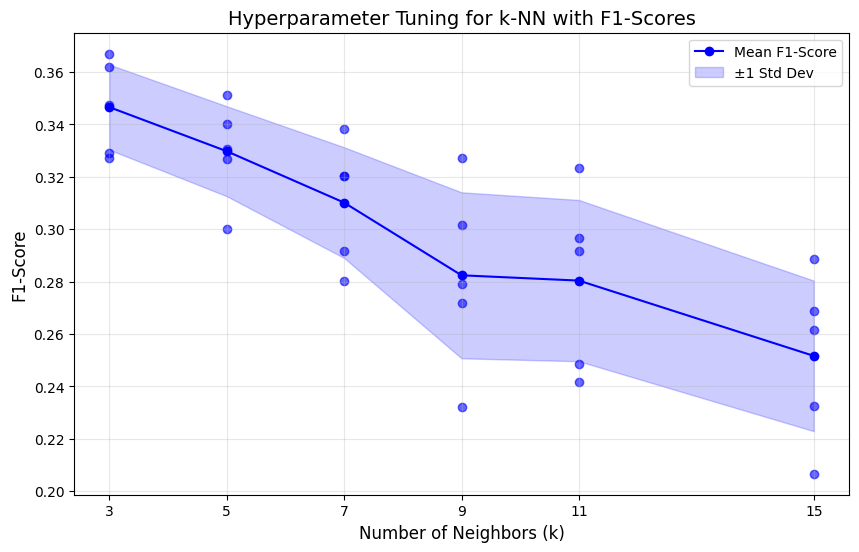

In [42]:
# Initialize a dictionary to store results for each k
results = {}

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize k-NN with current k
    cv_scores = cross_val_score(knn, X_senior_train, y_senior_train, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[k] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each k
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Print F1-Scores for each fold and their mean for each k
for k, scores in results.items():
    print(f"k = {k}: F1-Scores for each fold = {scores}, Mean F1-Score = {scores.mean():.4f}")

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(k_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for k, scores in results.items():
    plt.scatter([k] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for k-NN with F1-Scores', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

Training runtime: 0.0018 seconds
Prediction runtime: 0.0305 seconds


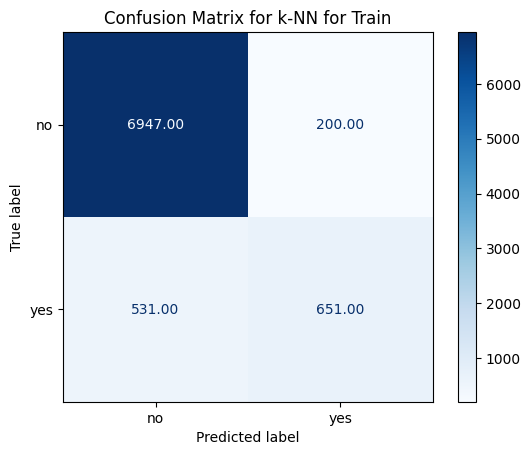

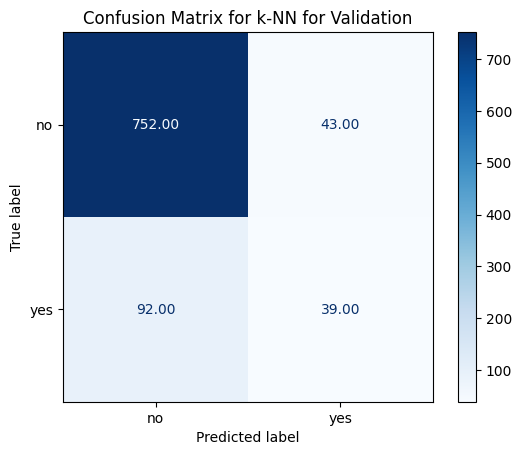


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7147
         yes       0.76      0.55      0.64      1182

    accuracy                           0.91      8329
   macro avg       0.85      0.76      0.80      8329
weighted avg       0.91      0.91      0.91      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.89      0.95      0.92       795
         yes       0.48      0.30      0.37       131

    accuracy                           0.85       926
   macro avg       0.68      0.62      0.64       926
weighted avg       0.83      0.85      0.84       926



In [43]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire training dataset and Measure training runtime
start_time = time.time()
knn_best.fit(X_senior_train, y_senior_train)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

y_train_pred = knn_best.predict(X_senior_train)

# Predict on the validation dataset
start_time = time.time()
y_val_pred = knn_best.predict(X_senior_val)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrix
conf_matrix_train = confusion_matrix(y_senior_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val, y_val_pred)

# Plot confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Train')
plt.show()

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Validation')
plt.show()

print("\nClassification Report for Train:")
print(classification_report(y_senior_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

In [44]:
# Scale the dataset to ensure coefficients are comparable
scaler = StandardScaler()
X_senior_scaled = scaler.fit_transform(X_senior_encoded)

# Train the logistic regression model
log_reg = LogisticRegression(random_state=88, max_iter=1000)
log_reg.fit(X_senior_scaled, y_senior_encoded)

# Get absolute values of coefficients
coefficients = np.abs(log_reg.coef_[0])

# Sort the indices of features by their coefficient values
top_k = X_senior_encoded.shape[1] // 2  # Number of features to select
indices = np.argsort(coefficients)[-top_k:][::-1]  # Sort in descending order

# Select the top 19 features
X_senior_reduced = X_senior_encoded.iloc[:, indices]

# Get feature names and their corresponding coefficients
selected_feature_names = X_senior_encoded.columns[indices]
selected_coefficients = coefficients[indices]

# Combine feature names and coefficients into a DataFrame
feature_coeff_df = pd.DataFrame({
    "Feature": selected_feature_names,
    "Absolute Coefficient": selected_coefficients
}).sort_values(by="Absolute Coefficient", ascending=False)

# Print results
print(f"Reduced Dimensions: {X_senior_reduced.shape[1]}")
print("Selected Features Ranked by Absolute Coefficients:")
print(feature_coeff_df)

Reduced Dimensions: 17
Selected Features Ranked by Absolute Coefficients:
              Feature  Absolute Coefficient
0            duration              0.903109
1            campaign              0.460711
2     contact_unknown              0.362398
3    poutcome_success              0.361686
4                 age              0.353953
5             housing              0.283696
6    contact_cellular              0.270895
7                loan              0.223112
8               pdays              0.212032
9    poutcome_failure              0.187306
10            default              0.096415
11  education_primary              0.088801
12    job_blue-collar              0.083869
13  contact_telephone              0.080072
14           previous              0.078237
15       job_services              0.063365
16         job_admin.              0.055093


In [45]:
# Split reduced dataset
X_senior_train_reduced, X_senior_val_reduced, y_senior_train_reduced, y_senior_val_reduced = train_test_split(
    X_senior_reduced,
    y_senior_encoded,
    test_size=0.1,
    random_state=88,
    stratify=y_senior_encoded
)

# Print sizes of training and validation sets
print(f"Training set size (reduced): {len(X_senior_train_reduced)} samples")
print(f"Validation set size (reduced): {len(X_senior_val_reduced)} samples")

Training set size (reduced): 8329 samples
Validation set size (reduced): 926 samples


In [46]:
# Convert X_senior_aged_train to DataFrame with default column names
X_train_reduced_df = pd.DataFrame(X_senior_train_reduced)
X_train_reduced_df['target'] = y_senior_train_reduced.values
X_train_reduced_df.to_csv("X_senior_train_reduced.csv", index=False)

X_val_reduced_df = pd.DataFrame(X_senior_val_reduced)
X_val_reduced_df['target'] = y_senior_val_reduced.values
X_val_reduced_df.to_csv("X_senior_val_reduced.csv", index=False)

k = 3: F1-Scores for each fold = [0.45535714 0.44285714 0.40092166 0.45563549 0.45454545], Mean F1-Score = 0.4419
k = 5: F1-Scores for each fold = [0.43559719 0.44554455 0.36945813 0.4496124  0.43373494], Mean F1-Score = 0.4268
k = 7: F1-Scores for each fold = [0.42718447 0.42713568 0.36828645 0.42133333 0.42959427], Mean F1-Score = 0.4147
k = 9: F1-Scores for each fold = [0.44987775 0.43256997 0.38987342 0.42359249 0.43672457], Mean F1-Score = 0.4265
k = 11: F1-Scores for each fold = [0.41895262 0.38860104 0.38341969 0.40223464 0.42926829], Mean F1-Score = 0.4045
k = 15: F1-Scores for each fold = [0.40201005 0.41666667 0.39892183 0.41025641 0.441247  ], Mean F1-Score = 0.4138


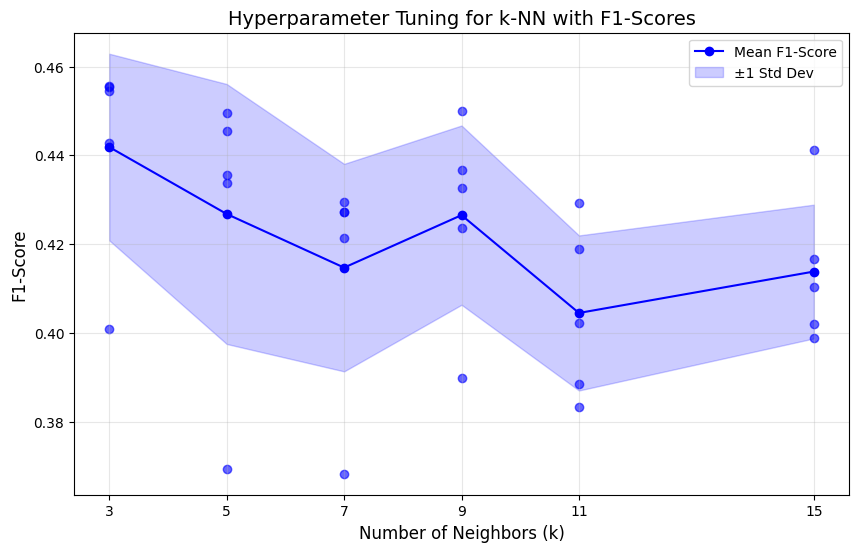

In [47]:
# Initialize a dictionary to store results for each k
results = {}

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize k-NN with current k
    cv_scores = cross_val_score(knn, X_senior_train_reduced, y_senior_train_reduced, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[k] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each k
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Print F1-Scores for each fold and their mean for each k
for k, scores in results.items():
    print(f"k = {k}: F1-Scores for each fold = {scores}, Mean F1-Score = {scores.mean():.4f}")

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(k_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for k, scores in results.items():
    plt.scatter([k] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for k-NN with F1-Scores', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

Training runtime: 0.0017 seconds
Prediction runtime: 0.0197 seconds


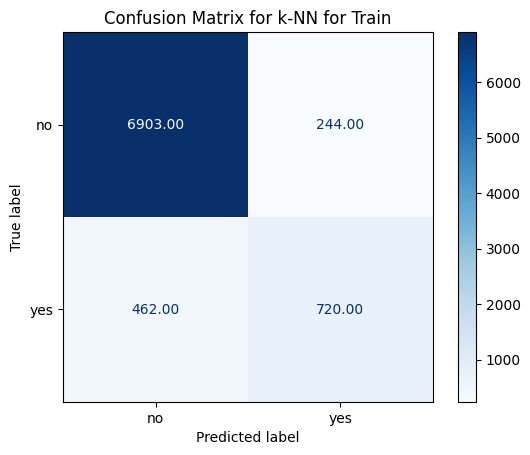

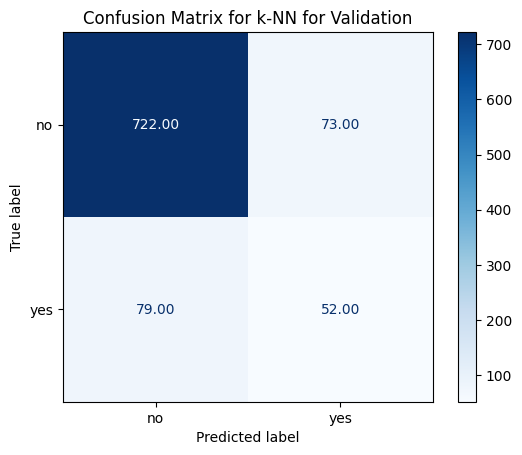


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7147
         yes       0.75      0.61      0.67      1182

    accuracy                           0.92      8329
   macro avg       0.84      0.79      0.81      8329
weighted avg       0.91      0.92      0.91      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.90      0.91      0.90       795
         yes       0.42      0.40      0.41       131

    accuracy                           0.84       926
   macro avg       0.66      0.65      0.66       926
weighted avg       0.83      0.84      0.83       926



In [48]:
best_k = 3
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model on the entire training dataset and Measure training runtime
start_time = time.time()
knn_best.fit(X_senior_train_reduced, y_senior_train_reduced)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

y_train_reduced_pred = knn_best.predict(X_senior_train_reduced)

# Predict on the validation dataset
start_time = time.time()
y_val_reduced_pred = knn_best.predict(X_senior_val_reduced)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrix
conf_matrix_train_reduced = confusion_matrix(y_senior_train_reduced, y_train_reduced_pred)
conf_matrix_val_reduced = confusion_matrix(y_senior_val_reduced, y_val_reduced_pred)

# Plot confusion matrix for k-NN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train_reduced, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Train')
plt.show()

disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val_reduced, display_labels=["no", "yes"])
disp_knn.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for k-NN for Validation')
plt.show()

print("\nClassification Report for Train:")
print(classification_report(y_senior_train_reduced, y_train_reduced_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val_reduced, y_val_reduced_pred, target_names=["no", "yes"]))

### Artificial Neural Network:

#### Young

In [49]:
# Convert X and y to numpy arrays
X_young_encoded_array = X_young_encoded.to_numpy()  # Convert DataFrame to numpy array
y_young_encoded_array = y_young_encoded.to_numpy()

In [50]:
# Split the dataset
X_young_train_array, X_young_val_array, y_young_train_array, y_young_val_array = train_test_split(
    X_young_encoded_array,
    y_young_encoded_array,
    test_size=0.1,  
    random_state=88, 
    stratify=y_young_encoded_array
)

/Users/cd/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
40/40 ━━━━━━━━━━

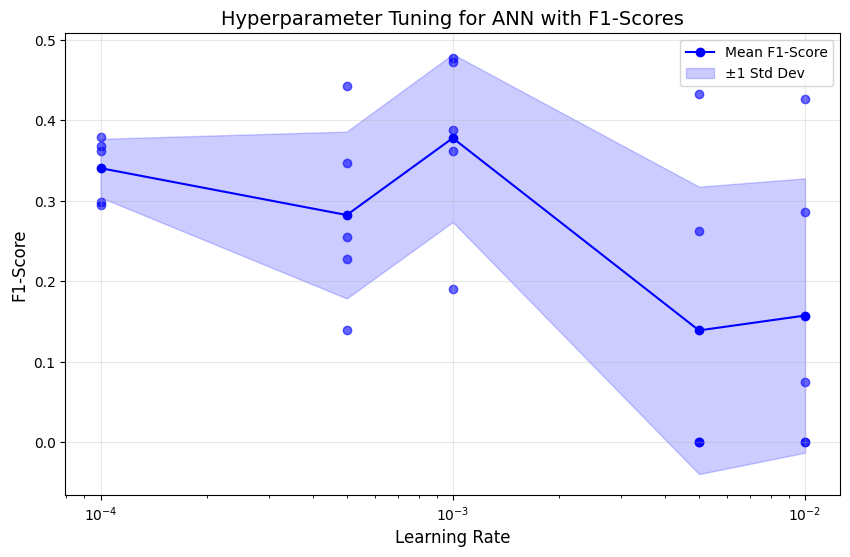

Learning Rate = 0.0001: F1-Scores for each fold = [0.3794212218649518, 0.29496402877697836, 0.3625, 0.29830508474576267, 0.3681318681318681], Mean F1-Score = 0.3407
Learning Rate = 0.0005: F1-Scores for each fold = [0.4421768707482993, 0.2553191489361702, 0.13953488372093026, 0.22813688212927755, 0.3468208092485549], Mean F1-Score = 0.2824
Learning Rate = 0.001: F1-Scores for each fold = [0.4728434504792332, 0.36184210526315785, 0.19047619047619047, 0.3875, 0.47747747747747743], Mean F1-Score = 0.3780
Learning Rate = 0.005: F1-Scores for each fold = [0.43278688524590164, 0.26229508196721313, 0.0, 0.0, 0.0], Mean F1-Score = 0.1390
Learning Rate = 0.01: F1-Scores for each fold = [0.07511737089201878, 0.0, 0.0, 0.28571428571428575, 0.4265927977839335], Mean F1-Score = 0.1575


In [51]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the learning rates to test
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

# Initialize dictionary to store results
results = {}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=88)

# Function to create ANN model
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_young_train_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),      # First hidden layer
        Dense(16, activation='relu'),      # Second hidden layer
        Dense(1, activation='sigmoid')     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation for each learning rate
for lr in learning_rates:
    fold_scores = []
    for train_idx, val_idx in kf.split(X_young_train_array):
        # Split the data
        X_train, X_val = X_young_train_array[train_idx], X_young_train_array[val_idx]
        y_train, y_val = y_young_train_array[train_idx], y_young_train_array[val_idx]
        
        # Build and train the ANN model
        model = create_ann(lr)
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        
        # Predict and calculate F1-score
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        fold_score = f1_score(y_val, y_pred, pos_label=1)
        fold_scores.append(fold_score)
    
    results[lr] = fold_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each learning rate
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(learning_rates,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for lr, scores in results.items():
    plt.scatter([lr] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for ANN with F1-Scores', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for learning rates
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each learning rate
for lr, scores in results.items():
    print(f"Learning Rate = {lr}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 2.1523 seconds
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
Prediction runtime: 0.0375 seconds


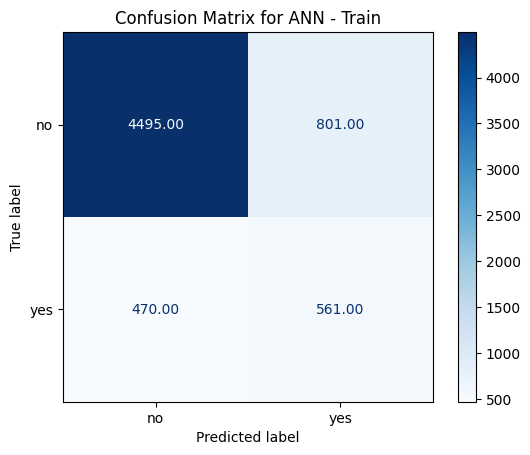

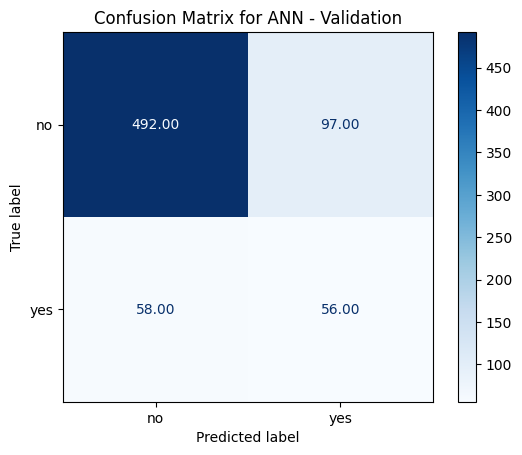


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.91      0.85      0.88      5296
         yes       0.41      0.54      0.47      1031

    accuracy                           0.80      6327
   macro avg       0.66      0.70      0.67      6327
weighted avg       0.82      0.80      0.81      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.89      0.84      0.86       589
         yes       0.37      0.49      0.42       114

    accuracy                           0.78       703
   macro avg       0.63      0.66      0.64       703
weighted avg       0.81      0.78      0.79       703



In [52]:
# Based on earlier hyperparameter tuning
best_learning_rate = 0.001  

# Function to create ANN model (if not already defined)
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_young_train_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),                      # First hidden layer
        Dense(16, activation='relu'),                      # Second hidden layer
        Dense(1, activation='sigmoid')                     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

#Train the ANN model
ann_best = create_ann(best_learning_rate)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
ann_best.fit(X_young_train_array, y_young_train_array, epochs=20, batch_size=32, verbose=0)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred_prob = ann_best.predict(X_young_train_array)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Predict on the validation dataset and measure runtime
start_time = time.time()
y_val_pred_prob = ann_best.predict(X_young_val_array)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train_array, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val_array, y_val_pred)

# Plot confusion matrix for ANN
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Train')
plt.show()

disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train_array, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val_array, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

In [53]:
# Convert X to numpy arrays
X_young_reduced_array = X_young_reduced.to_numpy()

In [54]:
# Split reduced dataset
X_young_train_reduced_array, X_young_val_reduced_array, y_young_train_reduced_array, y_young_val_reduced_array = train_test_split(
    X_young_reduced_array,
    y_young_encoded_array,
    test_size=0.1,
    random_state=88,
    stratify=y_young_encoded_array
)

# Print sizes of training and validation sets
print(f"Training set size (reduced): {len(X_young_train_reduced_array)} samples")
print(f"Validation set size (reduced): {len(X_young_val_reduced_array)} samples")

Training set size (reduced): 6327 samples
Validation set size (reduced): 703 samples


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
40/40 ━━━━━━━━━

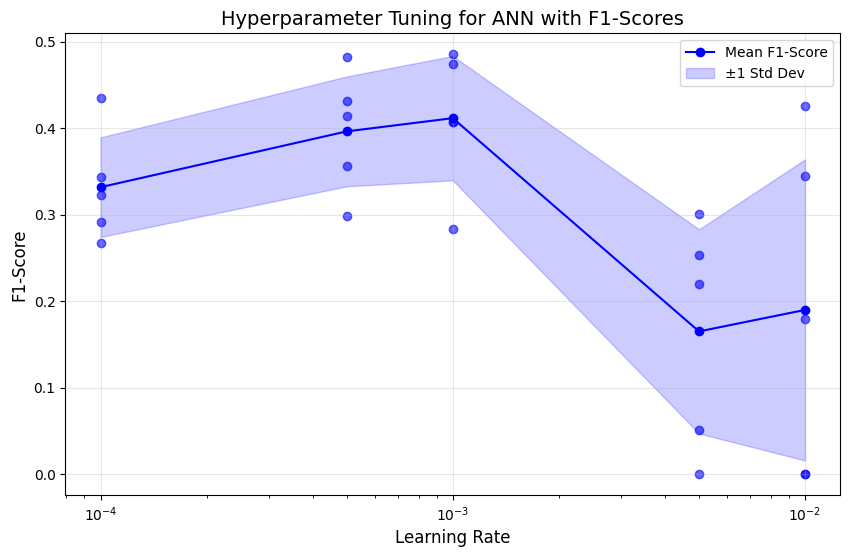

Learning Rate = 0.0001: F1-Scores for each fold = [0.32258064516129037, 0.2671480144404332, 0.291044776119403, 0.43436754176610975, 0.34375], Mean F1-Score = 0.3318
Learning Rate = 0.0005: F1-Scores for each fold = [0.4310344827586207, 0.48261758691206535, 0.4135593220338983, 0.35608308605341243, 0.2983050847457627], Mean F1-Score = 0.3963
Learning Rate = 0.001: F1-Scores for each fold = [0.4741641337386018, 0.28346456692913385, 0.4075235109717868, 0.48565121412803536, 0.407185628742515], Mean F1-Score = 0.4116
Learning Rate = 0.005: F1-Scores for each fold = [0.22040816326530613, 0.0505050505050505, 0.0, 0.3006993006993007, 0.2535211267605634], Mean F1-Score = 0.1650
Learning Rate = 0.01: F1-Scores for each fold = [0.4253968253968254, 0.0, 0.3443223443223443, 0.17968750000000003, 0.0], Mean F1-Score = 0.1899


In [55]:
# Define the learning rates to test
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

# Initialize dictionary to store results
results = {}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=88)

# Function to create ANN model
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_young_train_reduced_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),      # First hidden layer
        Dense(16, activation='relu'),      # Second hidden layer
        Dense(1, activation='sigmoid')     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation for each learning rate
for lr in learning_rates:
    fold_scores = []
    for train_idx, val_idx in kf.split(X_young_train_reduced_array):
        # Split the data
        X_train, X_val = X_young_train_reduced_array[train_idx], X_young_train_reduced_array[val_idx]
        y_train, y_val = y_young_train_reduced_array[train_idx], y_young_train_reduced_array[val_idx]
        
        # Build and train the ANN model
        model = create_ann(lr)
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        
        # Predict and calculate F1-score
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        fold_score = f1_score(y_val, y_pred, pos_label=1)
        fold_scores.append(fold_score)
    
    results[lr] = fold_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each learning rate
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(learning_rates,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for lr, scores in results.items():
    plt.scatter([lr] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for ANN with F1-Scores', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for learning rates
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each learning rate
for lr, scores in results.items():
    print(f"Learning Rate = {lr}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 2.1274 seconds
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
Prediction runtime: 0.0365 seconds


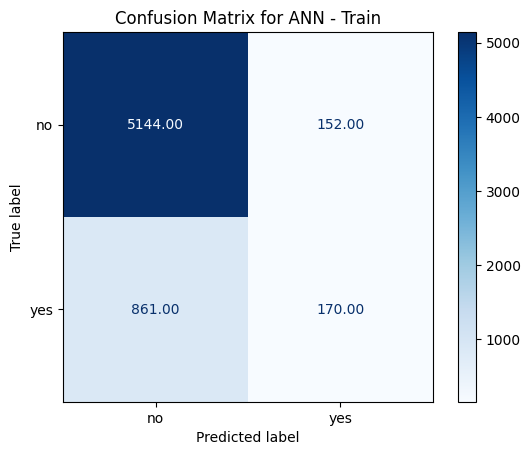

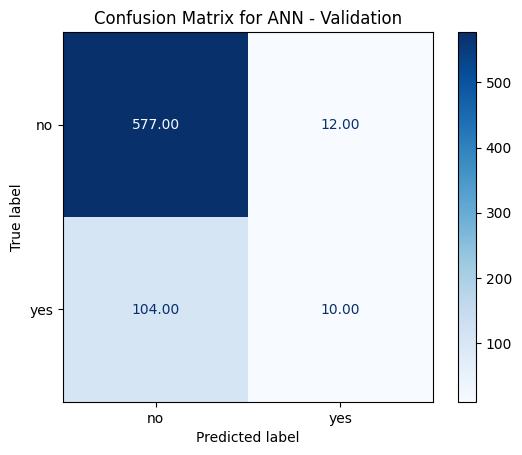


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.86      0.97      0.91      5296
         yes       0.53      0.16      0.25      1031

    accuracy                           0.84      6327
   macro avg       0.69      0.57      0.58      6327
weighted avg       0.80      0.84      0.80      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.85      0.98      0.91       589
         yes       0.45      0.09      0.15       114

    accuracy                           0.83       703
   macro avg       0.65      0.53      0.53       703
weighted avg       0.78      0.83      0.79       703



In [56]:
# Based on earlier hyperparameter tuning
best_learning_rate = 0.0001  

# Function to create ANN model (if not already defined)
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_young_train_reduced_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),                      # First hidden layer
        Dense(16, activation='relu'),                      # Second hidden layer
        Dense(1, activation='sigmoid')                     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

#Train the ANN model
ann_best = create_ann(best_learning_rate)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
ann_best.fit(X_young_train_reduced_array, y_young_train_reduced_array, epochs=20, batch_size=32, verbose=0)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred_prob = ann_best.predict(X_young_train_reduced_array)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Predict on the validation dataset and measure runtime
start_time = time.time()
y_val_pred_prob = ann_best.predict(X_young_val_reduced_array)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train_reduced_array, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val_reduced_array, y_val_pred)

# Plot confusion matrix for ANN
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Train')
plt.show()

disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train_reduced_array, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val_reduced_array, y_val_pred, target_names=["no", "yes"]))

#### Middle_aged

In [57]:
# Convert X and y to numpy arrays
X_middle_aged_encoded_array = X_middle_aged_encoded.to_numpy()  # Convert DataFrame to numpy array
y_middle_aged_encoded_array = y_middle_aged_encoded.to_numpy()

In [58]:
# Split the dataset
X_middle_aged_train_array, X_middle_aged_val_array, y_middle_aged_train_array, y_middle_aged_val_array = train_test_split(
    X_middle_aged_encoded_array,
    y_middle_aged_encoded_array,
    test_size=0.1,  
    random_state=88, 
    stratify=y_middle_aged_encoded_array
)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
163/163 ━━━

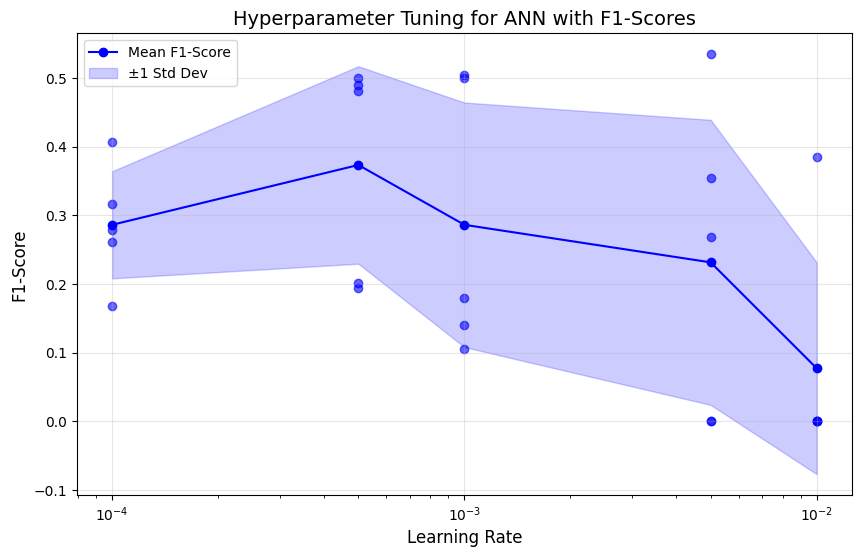

Learning Rate = 0.0001: F1-Scores for each fold = [0.3170028818443804, 0.407530454042082, 0.2782874617737003, 0.2608695652173913, 0.16748768472906406], Mean F1-Score = 0.2862
Learning Rate = 0.0005: F1-Scores for each fold = [0.20102214650766612, 0.19374999999999998, 0.5004887585532747, 0.4906976744186047, 0.48134328358208955], Mean F1-Score = 0.3735
Learning Rate = 0.001: F1-Scores for each fold = [0.5044897959183674, 0.14052287581699344, 0.17957746478873238, 0.10583941605839417, 0.5007824726134585], Mean F1-Score = 0.2862
Learning Rate = 0.005: F1-Scores for each fold = [0.0, 0.2678311499272198, 0.35474860335195535, 0.5350444225074037, 0.0], Mean F1-Score = 0.2315
Learning Rate = 0.01: F1-Scores for each fold = [0.3857729138166895, 0.0, 0.0, 0.0, 0.0], Mean F1-Score = 0.0772


In [59]:
# Define the learning rates to test
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

# Initialize dictionary to store results
results = {}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=88)

# Function to create ANN model
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_middle_aged_train_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),      # First hidden layer
        Dense(16, activation='relu'),      # Second hidden layer
        Dense(1, activation='sigmoid')     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation for each learning rate
for lr in learning_rates:
    fold_scores = []
    for train_idx, val_idx in kf.split(X_middle_aged_train_array):
        # Split the data
        X_train, X_val = X_middle_aged_train_array[train_idx], X_middle_aged_train_array[val_idx]
        y_train, y_val = y_middle_aged_train_array[train_idx], y_middle_aged_train_array[val_idx]
        
        # Build and train the ANN model
        model = create_ann(lr)
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        
        # Predict and calculate F1-score
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        fold_score = f1_score(y_val, y_pred, pos_label=1)
        fold_scores.append(fold_score)
    
    results[lr] = fold_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each learning rate
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(learning_rates,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for lr, scores in results.items():
    plt.scatter([lr] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for ANN with F1-Scores', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for learning rates
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each learning rate
for lr, scores in results.items():
    print(f"Learning Rate = {lr}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 6.8649 seconds
814/814 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step
Prediction runtime: 0.0610 seconds


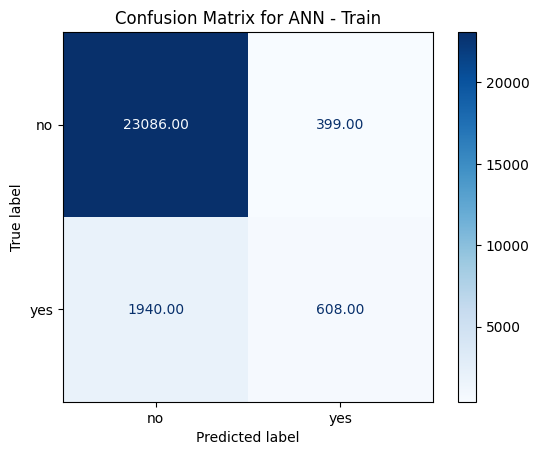

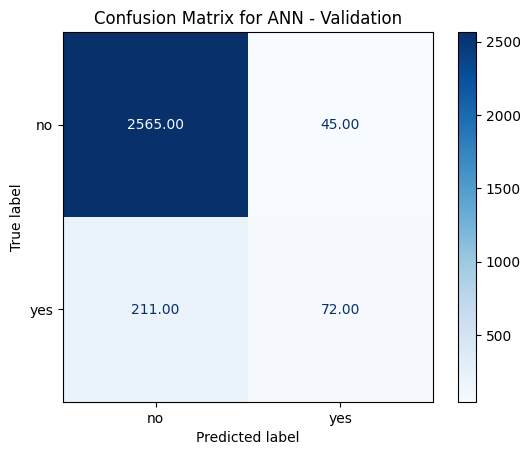


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     23485
         yes       0.60      0.24      0.34      2548

    accuracy                           0.91     26033
   macro avg       0.76      0.61      0.65     26033
weighted avg       0.89      0.91      0.89     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      2610
         yes       0.62      0.25      0.36       283

    accuracy                           0.91      2893
   macro avg       0.77      0.62      0.66      2893
weighted avg       0.89      0.91      0.89      2893



In [60]:
# Based on earlier hyperparameter tuning
best_learning_rate = 0.0001  

# Function to create ANN model (if not already defined)
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_middle_aged_train_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),                      # First hidden layer
        Dense(16, activation='relu'),                      # Second hidden layer
        Dense(1, activation='sigmoid')                     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

# Train the ANN model
ann_best = create_ann(best_learning_rate)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
ann_best.fit(X_middle_aged_train_array, y_middle_aged_train_array, epochs=20, batch_size=32, verbose=0)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred_prob = ann_best.predict(X_middle_aged_train_array)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Predict on the validation dataset and measure runtime
start_time = time.time()
y_val_pred_prob = ann_best.predict(X_middle_aged_val_array)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train_array, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val_array, y_val_pred)

# Plot confusion matrix for training set
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Train')
plt.show()

# Plot confusion matrix for validation set
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train_array, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val_array, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

In [61]:
# Convert X to numpy arrays
X_middle_aged_reduced_array = X_middle_aged_reduced.to_numpy()

In [62]:
# Split reduced dataset
X_middle_aged_train_reduced_array, X_middle_aged_val_reduced_array, y_middle_aged_train_reduced_array, y_middle_aged_val_reduced_array = train_test_split(
    X_middle_aged_reduced_array,
    y_middle_aged_encoded_array,
    test_size=0.1,
    random_state=88,
    stratify=y_middle_aged_encoded_array
)

# Print sizes of training and validation sets
print(f"Training set size (reduced): {len(X_middle_aged_train_reduced_array)} samples")
print(f"Validation set size (reduced): {len(X_middle_aged_val_reduced_array)} samples")

Training set size (reduced): 26033 samples
Validation set size (reduced): 2893 samples


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
163/163 ━━━

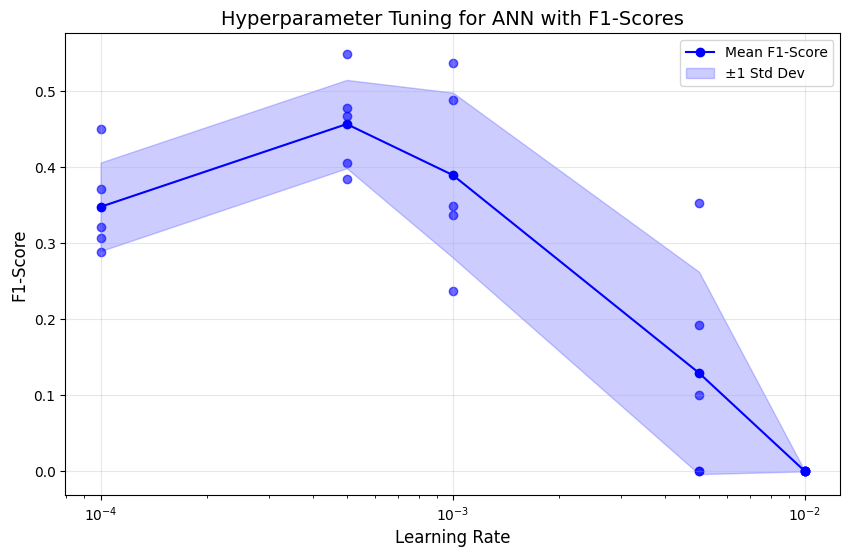

Learning Rate = 0.0001: F1-Scores for each fold = [0.28843106180665606, 0.371859296482412, 0.321483771251932, 0.3074581430745814, 0.45045045045045046], Mean F1-Score = 0.3479
Learning Rate = 0.0005: F1-Scores for each fold = [0.4061855670103093, 0.467780429594272, 0.3839285714285714, 0.548828125, 0.4773109243697479], Mean F1-Score = 0.4568
Learning Rate = 0.001: F1-Scores for each fold = [0.2375, 0.4879310344827586, 0.34965034965034963, 0.536888888888889, 0.3368538076709283], Mean F1-Score = 0.3898
Learning Rate = 0.005: F1-Scores for each fold = [0.0, 0.0, 0.35344827586206895, 0.1930116472545757, 0.1009009009009009], Mean F1-Score = 0.1295
Learning Rate = 0.01: F1-Scores for each fold = [0.0, 0.0, 0.0, 0.0, 0.0], Mean F1-Score = 0.0000


In [63]:
# Define the learning rates to test
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

# Initialize dictionary to store results
results = {}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=88)

# Function to create ANN model
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_middle_aged_train_reduced_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),      # First hidden layer
        Dense(16, activation='relu'),      # Second hidden layer
        Dense(1, activation='sigmoid')     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation for each learning rate
for lr in learning_rates:
    fold_scores = []
    for train_idx, val_idx in kf.split(X_middle_aged_train_reduced_array):
        # Split the data
        X_train, X_val = X_middle_aged_train_reduced_array[train_idx], X_middle_aged_train_reduced_array[val_idx]
        y_train, y_val = y_middle_aged_train_reduced_array[train_idx], y_middle_aged_train_reduced_array[val_idx]
        
        # Build and train the ANN model
        model = create_ann(lr)
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        
        # Predict and calculate F1-score
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        fold_score = f1_score(y_val, y_pred, pos_label=1)
        fold_scores.append(fold_score)
    
    results[lr] = fold_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each learning rate
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(learning_rates,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for lr, scores in results.items():
    plt.scatter([lr] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for ANN with F1-Scores', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for learning rates
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each learning rate
for lr, scores in results.items():
    print(f"Learning Rate = {lr}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 6.9980 seconds
814/814 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step
Prediction runtime: 0.0574 seconds


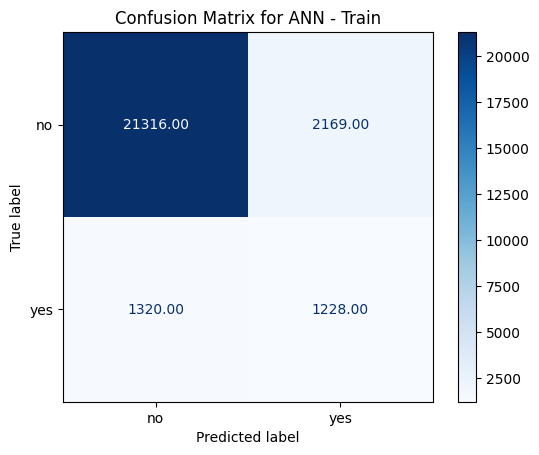

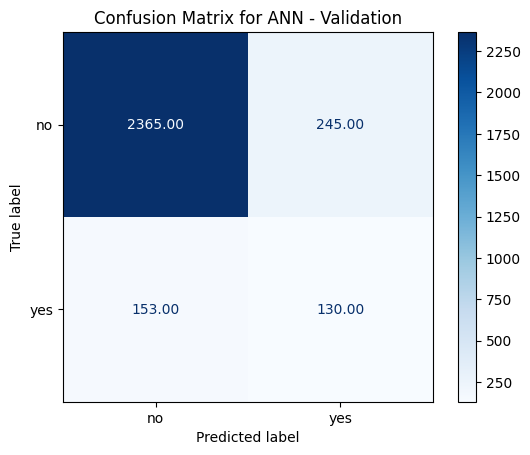


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.94      0.91      0.92     23485
         yes       0.36      0.48      0.41      2548

    accuracy                           0.87     26033
   macro avg       0.65      0.69      0.67     26033
weighted avg       0.88      0.87      0.87     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.94      0.91      0.92      2610
         yes       0.35      0.46      0.40       283

    accuracy                           0.86      2893
   macro avg       0.64      0.68      0.66      2893
weighted avg       0.88      0.86      0.87      2893



In [64]:
# Based on earlier hyperparameter tuning
best_learning_rate = 0.001  

# Function to create ANN model (if not already defined)
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_middle_aged_train_reduced_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),                      # First hidden layer
        Dense(16, activation='relu'),                      # Second hidden layer
        Dense(1, activation='sigmoid')                     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

#Train the ANN model
ann_best = create_ann(best_learning_rate)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
ann_best.fit(X_middle_aged_train_reduced_array, y_middle_aged_train_reduced_array, epochs=20, batch_size=32, verbose=0)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred_prob = ann_best.predict(X_middle_aged_train_reduced_array)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Predict on the validation dataset and measure runtime
start_time = time.time()
y_val_pred_prob = ann_best.predict(X_middle_aged_val_reduced_array)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train_reduced_array, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val_reduced_array, y_val_pred)

# Plot confusion matrix for ANN
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Train')
plt.show()

disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train_reduced_array, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val_reduced_array, y_val_pred, target_names=["no", "yes"]))

#### Senior

In [65]:
# Convert X and y to numpy arrays
X_senior_encoded_array = X_senior_encoded.to_numpy()  # Convert DataFrame to numpy array
y_senior_encoded_array = y_senior_encoded.to_numpy()

In [66]:
# Split the dataset
X_senior_train_array, X_senior_val_array, y_senior_train_array, y_senior_val_array = train_test_split(
    X_senior_encoded_array,
    y_senior_encoded_array,
    test_size=0.1,  
    random_state=88, 
    stratify=y_senior_encoded_array
)

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
53/53 ━━━━━━━━━━

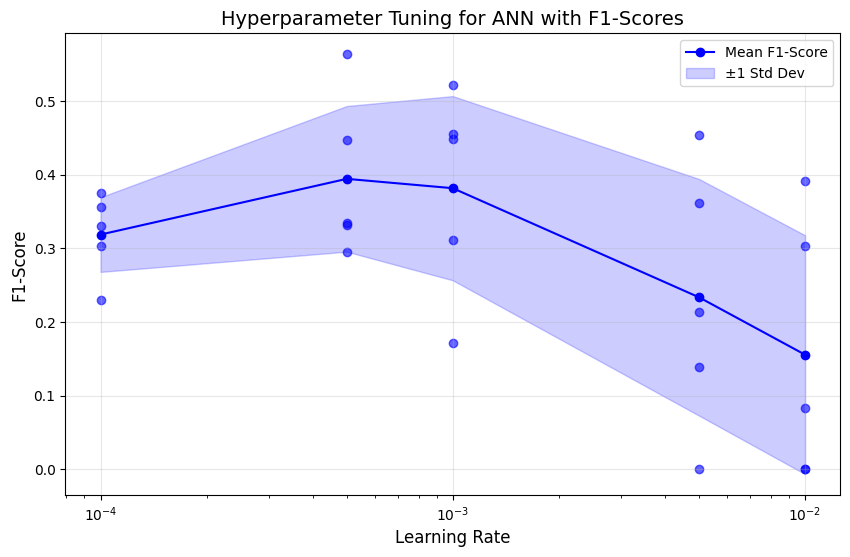

Learning Rate = 0.0001: F1-Scores for each fold = [0.3032258064516129, 0.22941176470588234, 0.3296703296703296, 0.37479270315091207, 0.35555555555555557], Mean F1-Score = 0.3185
Learning Rate = 0.0005: F1-Scores for each fold = [0.3310810810810811, 0.5633333333333332, 0.4468937875751502, 0.2949308755760369, 0.334384858044164], Mean F1-Score = 0.3941
Learning Rate = 0.001: F1-Scores for each fold = [0.520884520884521, 0.44768856447688565, 0.1718213058419244, 0.4551724137931034, 0.3116883116883117], Mean F1-Score = 0.3815
Learning Rate = 0.005: F1-Scores for each fold = [0.2134387351778656, 0.13861386138613863, 0.3611859838274933, 0.0, 0.4540540540540541], Mean F1-Score = 0.2335
Learning Rate = 0.01: F1-Scores for each fold = [0.0, 0.0, 0.39185750636132316, 0.08298755186721991, 0.30303030303030304], Mean F1-Score = 0.1556


In [67]:
# Define the learning rates to test
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

# Initialize dictionary to store results
results = {}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=88)

# Function to create ANN model
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_senior_train_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),      # First hidden layer
        Dense(16, activation='relu'),      # Second hidden layer
        Dense(1, activation='sigmoid')     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation for each learning rate
for lr in learning_rates:
    fold_scores = []
    for train_idx, val_idx in kf.split(X_senior_train_array):
        # Split the data
        X_train, X_val = X_senior_train_array[train_idx], X_senior_train_array[val_idx]
        y_train, y_val = y_senior_train_array[train_idx], y_senior_train_array[val_idx]
        
        # Build and train the ANN model
        model = create_ann(lr)
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        
        # Predict and calculate F1-score
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        fold_score = f1_score(y_val, y_pred, pos_label=1)
        fold_scores.append(fold_score)
    
    results[lr] = fold_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each learning rate
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(learning_rates,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for lr, scores in results.items():
    plt.scatter([lr] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for ANN with F1-Scores', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for learning rates
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each learning rate
for lr, scores in results.items():
    print(f"Learning Rate = {lr}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 2.6314 seconds
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
Prediction runtime: 0.0401 seconds


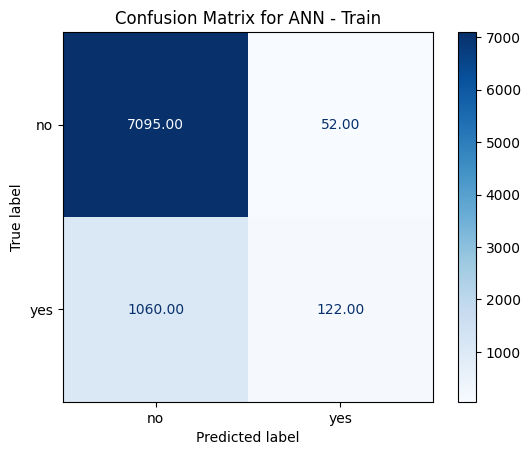

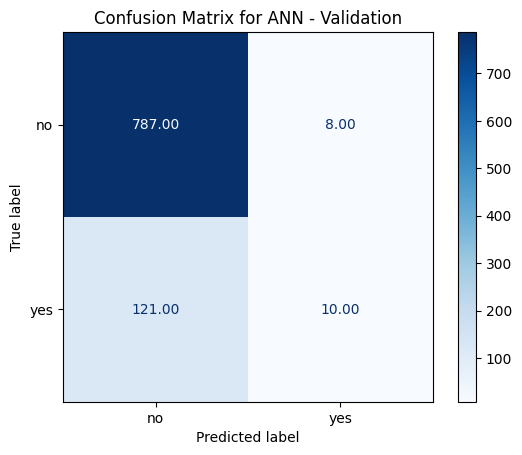


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.87      0.99      0.93      7147
         yes       0.70      0.10      0.18      1182

    accuracy                           0.87      8329
   macro avg       0.79      0.55      0.55      8329
weighted avg       0.85      0.87      0.82      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.87      0.99      0.92       795
         yes       0.56      0.08      0.13       131

    accuracy                           0.86       926
   macro avg       0.71      0.53      0.53       926
weighted avg       0.82      0.86      0.81       926



In [68]:
# Based on earlier hyperparameter tuning
best_learning_rate = 0.0005  

# Function to create ANN model (if not already defined)
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_senior_train_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),                      # First hidden layer
        Dense(16, activation='relu'),                      # Second hidden layer
        Dense(1, activation='sigmoid')                     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

#Train the ANN model
ann_best = create_ann(best_learning_rate)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
ann_best.fit(X_senior_train_array, y_senior_train_array, epochs=20, batch_size=32, verbose=0)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred_prob = ann_best.predict(X_senior_train_array)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Predict on the validation dataset and measure runtime
start_time = time.time()
y_val_pred_prob = ann_best.predict(X_senior_val_array)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train_array, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val_array, y_val_pred)

# Plot confusion matrix for ANN
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Train')
plt.show()

disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train_array, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val_array, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

In [69]:
# Convert X to numpy arrays
X_senior_reduced_array = X_senior_reduced.to_numpy()

In [70]:
# Split reduced dataset
X_senior_train_reduced_array, X_senior_val_reduced_array, y_senior_train_reduced_array, y_senior_val_reduced_array = train_test_split(
    X_senior_reduced_array,
    y_senior_encoded_array,
    test_size=0.1,
    random_state=88,
    stratify=y_senior_encoded_array
)

# Print sizes of training and validation sets
print(f"Training set size (reduced): {len(X_senior_train_reduced_array)} samples")
print(f"Validation set size (reduced): {len(X_senior_val_reduced_array)} samples")

Training set size (reduced): 8329 samples
Validation set size (reduced): 926 samples


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
53/53 ━━━━━━━━━━

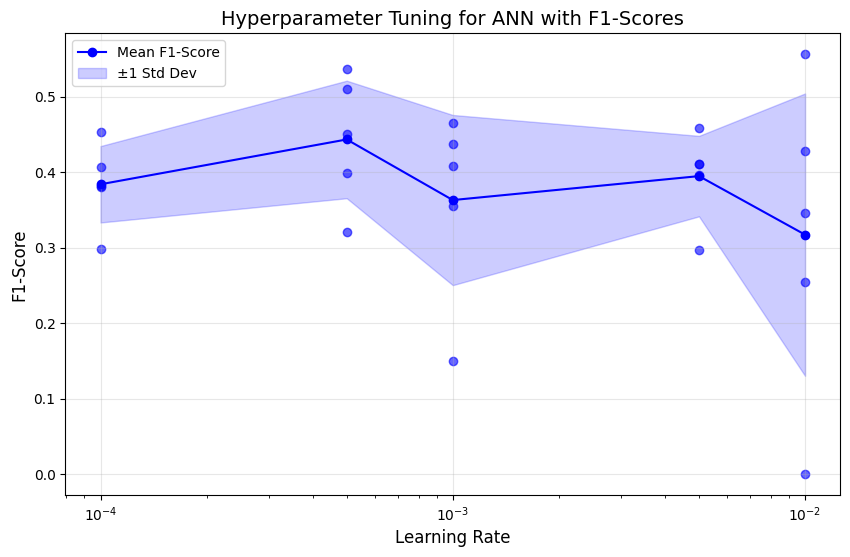

Learning Rate = 0.0001: F1-Scores for each fold = [0.380327868852459, 0.3816793893129771, 0.40633245382585753, 0.2975778546712803, 0.4533333333333333], Mean F1-Score = 0.3839
Learning Rate = 0.0005: F1-Scores for each fold = [0.3986710963455149, 0.5100671140939598, 0.5362903225806451, 0.3202846975088968, 0.45077720207253885], Mean F1-Score = 0.4432
Learning Rate = 0.001: F1-Scores for each fold = [0.40816326530612246, 0.14965986394557823, 0.4370179948586118, 0.35494880546075086, 0.46498599439775906], Mean F1-Score = 0.3630
Learning Rate = 0.005: F1-Scores for each fold = [0.2965779467680608, 0.4105263157894737, 0.3967391304347826, 0.45833333333333337, 0.411214953271028], Mean F1-Score = 0.3947
Learning Rate = 0.01: F1-Scores for each fold = [0.5562372188139059, 0.3463687150837989, 0.25490196078431376, 0.0, 0.42813455657492355], Mean F1-Score = 0.3171


In [71]:
# Define the learning rates to test
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]

# Initialize dictionary to store results
results = {}

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=88)

# Function to create ANN model
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_senior_train_reduced_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),      # First hidden layer
        Dense(16, activation='relu'),      # Second hidden layer
        Dense(1, activation='sigmoid')     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform cross-validation for each learning rate
for lr in learning_rates:
    fold_scores = []
    for train_idx, val_idx in kf.split(X_senior_train_reduced_array):
        # Split the data
        X_train, X_val = X_senior_train_reduced_array[train_idx], X_senior_train_reduced_array[val_idx]
        y_train, y_val = y_senior_train_reduced_array[train_idx], y_senior_train_reduced_array[val_idx]
        
        # Build and train the ANN model
        model = create_ann(lr)
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        
        # Predict and calculate F1-score
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        fold_score = f1_score(y_val, y_pred, pos_label=1)
        fold_scores.append(fold_score)
    
    results[lr] = fold_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each learning rate
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(learning_rates,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for lr, scores in results.items():
    plt.scatter([lr] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for ANN with F1-Scores', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for learning rates
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each learning rate
for lr, scores in results.items():
    print(f"Learning Rate = {lr}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 2.6108 seconds
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
Prediction runtime: 0.0397 seconds


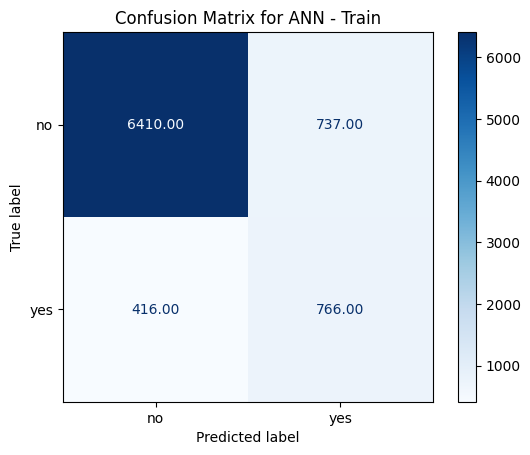

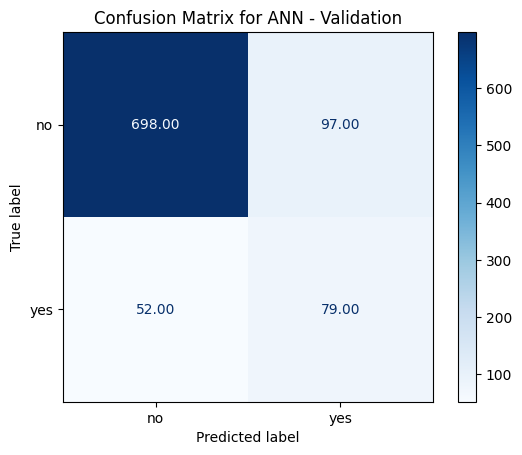


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.94      0.90      0.92      7147
         yes       0.51      0.65      0.57      1182

    accuracy                           0.86      8329
   macro avg       0.72      0.77      0.74      8329
weighted avg       0.88      0.86      0.87      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.88      0.90       795
         yes       0.45      0.60      0.51       131

    accuracy                           0.84       926
   macro avg       0.69      0.74      0.71       926
weighted avg       0.86      0.84      0.85       926



In [72]:
# Based on earlier hyperparameter tuning
best_learning_rate = 0.0005  

# Function to create ANN model (if not already defined)
def create_ann(learning_rate):
    model = Sequential([
        Input(shape=(X_senior_train_reduced_array.shape[1],)),  # Define input shape using Input layer
        Dense(32, activation='relu'),                      # First hidden layer
        Dense(16, activation='relu'),                      # Second hidden layer
        Dense(1, activation='sigmoid')                     # Output layer
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

#Train the ANN model
ann_best = create_ann(best_learning_rate)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
ann_best.fit(X_senior_train_reduced_array, y_senior_train_reduced_array, epochs=20, batch_size=32, verbose=0)
end_time = time.time()

# Calculate and print runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred_prob = ann_best.predict(X_senior_train_reduced_array)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Predict on the validation dataset and measure runtime
start_time = time.time()
y_val_pred_prob = ann_best.predict(X_senior_val_reduced_array)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
end_time = time.time()

# Calculate and print runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train_reduced_array, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val_reduced_array, y_val_pred)

# Plot confusion matrix for ANN
disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Train')
plt.show()

disp_ann = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_ann.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for ANN - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train_reduced_array, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val_reduced_array, y_val_pred, target_names=["no", "yes"]))

### Decision Tree:

#### Young

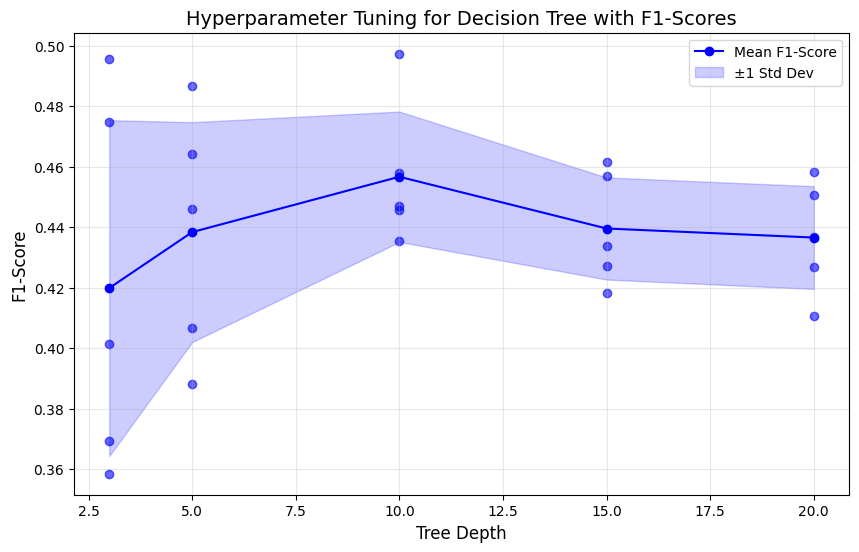

Tree Depth = 3: F1-Scores for each fold = [0.49557522 0.47477745 0.40138408 0.36912752 0.35842294], Mean F1-Score = 0.4199
Tree Depth = 5: F1-Scores for each fold = [0.38795987 0.44594595 0.48680352 0.40677966 0.46437995], Mean F1-Score = 0.4384
Tree Depth = 10: F1-Scores for each fold = [0.45801527 0.43553009 0.49740933 0.44686649 0.44565217], Mean F1-Score = 0.4567
Tree Depth = 15: F1-Scores for each fold = [0.41826923 0.46153846 0.45700246 0.43386243 0.42718447], Mean F1-Score = 0.4396
Tree Depth = 20: F1-Scores for each fold = [0.43661972 0.42679901 0.45833333 0.45063291 0.41050119], Mean F1-Score = 0.4366


In [73]:
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter values to test (max depths)
depth_values = [3, 5, 10, 15, 20]

# Initialize a dictionary to store results for each depth
results = {}

# Loop over each value of max_depth
for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=88)  # Initialize Decision Tree with current depth
    cv_scores = cross_val_score(tree, X_young_train, y_young_train, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[depth] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each depth
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(depth_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for depth, scores in results.items():
    plt.scatter([depth] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Decision Tree with F1-Scores', fontsize=14)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each depth
for depth, scores in results.items():
    print(f"Tree Depth = {depth}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0169 seconds
Prediction runtime: 0.0005 seconds


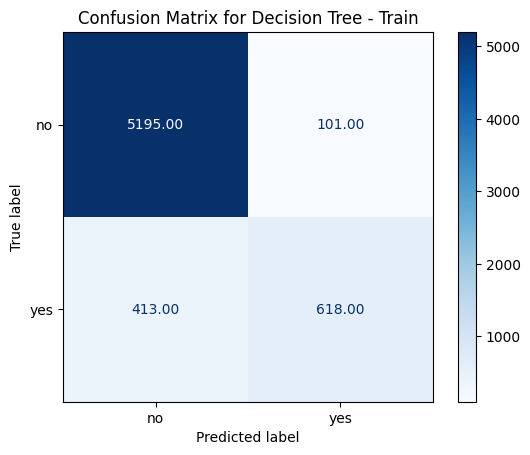

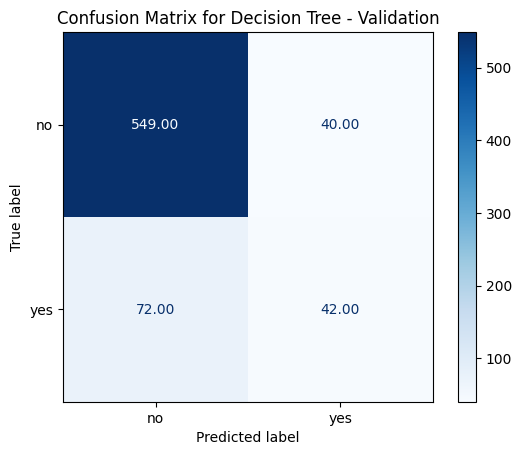


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      5296
         yes       0.86      0.60      0.71      1031

    accuracy                           0.92      6327
   macro avg       0.89      0.79      0.83      6327
weighted avg       0.92      0.92      0.91      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.88      0.93      0.91       589
         yes       0.51      0.37      0.43       114

    accuracy                           0.84       703
   macro avg       0.70      0.65      0.67       703
weighted avg       0.82      0.84      0.83       703



In [74]:
# Based on earlier hyperparameter tuning
best_depth = 10 

# Initialize the Decision Tree model
tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=88)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
tree_best.fit(X_young_train, y_young_train)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = tree_best.predict(X_young_train)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = tree_best.predict(X_young_val)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val, y_val_pred)

# Plot confusion matrix for Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Train')
plt.show()

disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

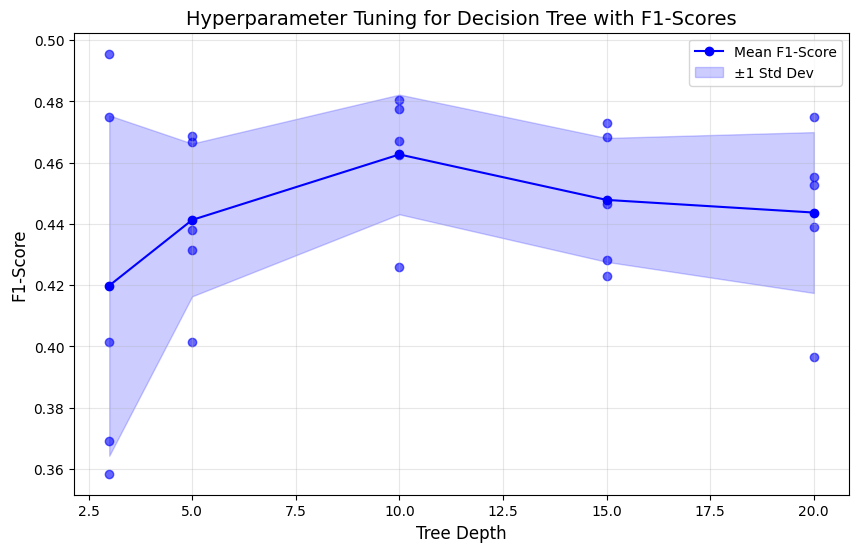

Tree Depth = 3: F1-Scores for each fold = [0.49557522 0.47477745 0.40138408 0.36912752 0.35842294], Mean F1-Score = 0.4199
Tree Depth = 5: F1-Scores for each fold = [0.4379085  0.43150685 0.46884273 0.40138408 0.4668435 ], Mean F1-Score = 0.4413
Tree Depth = 10: F1-Scores for each fold = [0.4671916  0.48044693 0.47745358 0.46246246 0.42587601], Mean F1-Score = 0.4627
Tree Depth = 15: F1-Scores for each fold = [0.44665012 0.46842105 0.47281324 0.42307692 0.42823529], Mean F1-Score = 0.4478
Tree Depth = 20: F1-Scores for each fold = [0.45539906 0.475      0.45265589 0.43902439 0.39647577], Mean F1-Score = 0.4437


In [75]:
# Define the hyperparameter values to test (max depths)
depth_values = [3, 5, 10, 15, 20]

# Initialize a dictionary to store results for each depth
results = {}

# Loop over each value of max_depth
for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=88)  # Initialize Decision Tree with current depth
    cv_scores = cross_val_score(tree, X_young_train_reduced, y_young_train_reduced, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[depth] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each depth
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(depth_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for depth, scores in results.items():
    plt.scatter([depth] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Decision Tree with F1-Scores', fontsize=14)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each depth
for depth, scores in results.items():
    print(f"Tree Depth = {depth}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0128 seconds
Prediction runtime: 0.0012 seconds


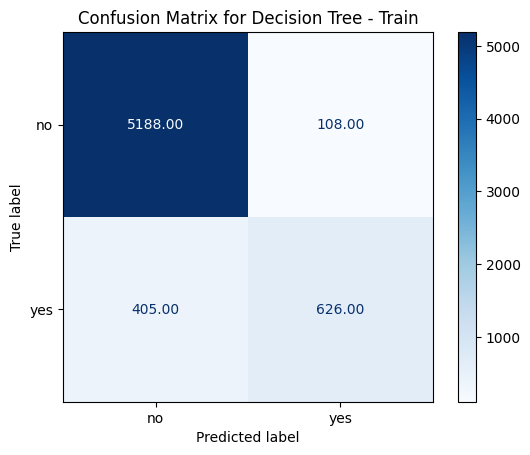

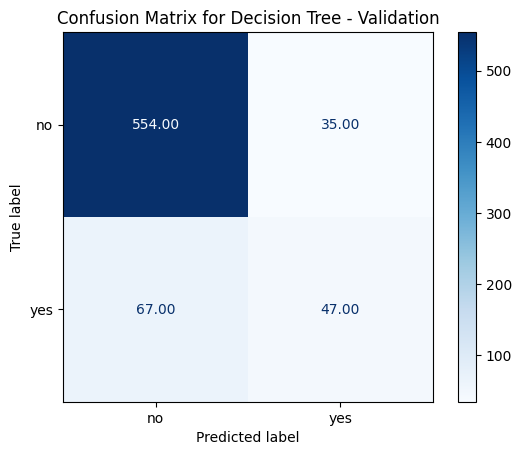


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      5296
         yes       0.85      0.61      0.71      1031

    accuracy                           0.92      6327
   macro avg       0.89      0.79      0.83      6327
weighted avg       0.92      0.92      0.91      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.89      0.94      0.92       589
         yes       0.57      0.41      0.48       114

    accuracy                           0.85       703
   macro avg       0.73      0.68      0.70       703
weighted avg       0.84      0.85      0.84       703



In [76]:
# Based on earlier hyperparameter tuning
best_depth = 10 

# Initialize the Decision Tree model
tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=88)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
tree_best.fit(X_young_train_reduced, y_young_train_reduced)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = tree_best.predict(X_young_train_reduced)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = tree_best.predict(X_young_val_reduced)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val_reduced, y_val_pred)

# Plot confusion matrix for Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Train')
plt.show()

disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val_reduced, y_val_pred, target_names=["no", "yes"]))

#### Middle_aged

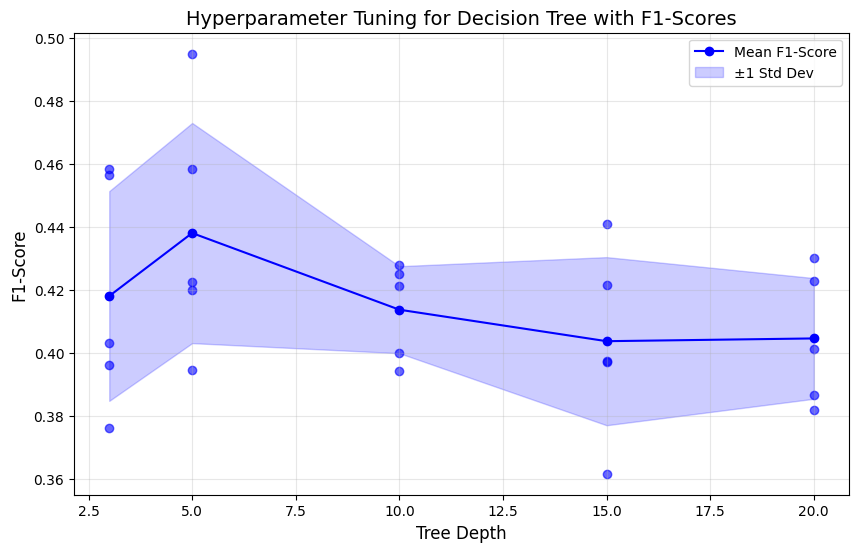

Tree Depth = 3: F1-Scores for each fold = [0.45833333 0.45654994 0.37621024 0.39620081 0.40322581], Mean F1-Score = 0.4181
Tree Depth = 5: F1-Scores for each fold = [0.49509804 0.45833333 0.42007926 0.42242503 0.39463087], Mean F1-Score = 0.4381
Tree Depth = 10: F1-Scores for each fold = [0.42523364 0.42789598 0.4        0.42130751 0.39433294], Mean F1-Score = 0.4138
Tree Depth = 15: F1-Scores for each fold = [0.44102564 0.42161017 0.39735099 0.36163175 0.39711934], Mean F1-Score = 0.4037
Tree Depth = 20: F1-Scores for each fold = [0.43023256 0.42300195 0.40122825 0.382      0.38666667], Mean F1-Score = 0.4046


In [77]:
# Define the hyperparameter values to test (max depths)
depth_values = [3, 5, 10, 15, 20]

# Initialize a dictionary to store results for each depth
results = {}

# Loop over each value of max_depth
for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=88)  # Initialize Decision Tree with current depth
    cv_scores = cross_val_score(tree, X_middle_aged_train, y_middle_aged_train, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[depth] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each depth
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(depth_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for depth, scores in results.items():
    plt.scatter([depth] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Decision Tree with F1-Scores', fontsize=14)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each depth
for depth, scores in results.items():
    print(f"Tree Depth = {depth}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0395 seconds
Prediction runtime: 0.0007 seconds


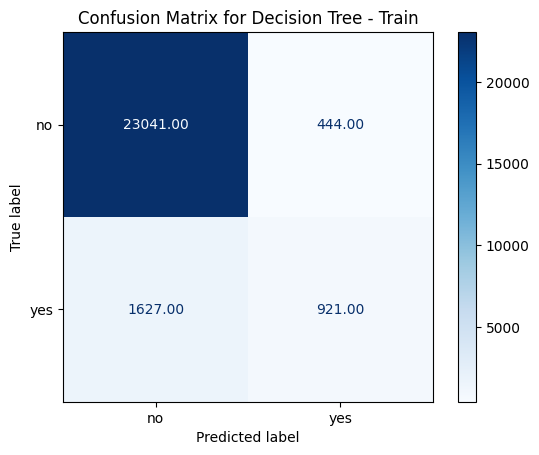

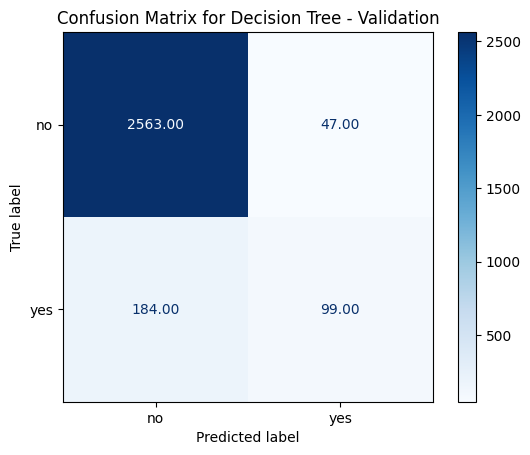


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.93      0.98      0.96     23485
         yes       0.67      0.36      0.47      2548

    accuracy                           0.92     26033
   macro avg       0.80      0.67      0.71     26033
weighted avg       0.91      0.92      0.91     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.98      0.96      2610
         yes       0.68      0.35      0.46       283

    accuracy                           0.92      2893
   macro avg       0.81      0.67      0.71      2893
weighted avg       0.91      0.92      0.91      2893



In [78]:
# Based on earlier hyperparameter tuning
best_depth = 5

# Initialize the Decision Tree model
tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=88)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
tree_best.fit(X_middle_aged_train, y_middle_aged_train)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = tree_best.predict(X_middle_aged_train)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = tree_best.predict(X_middle_aged_val)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val, y_val_pred)

# Plot confusion matrix for Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Train')
plt.show()

disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

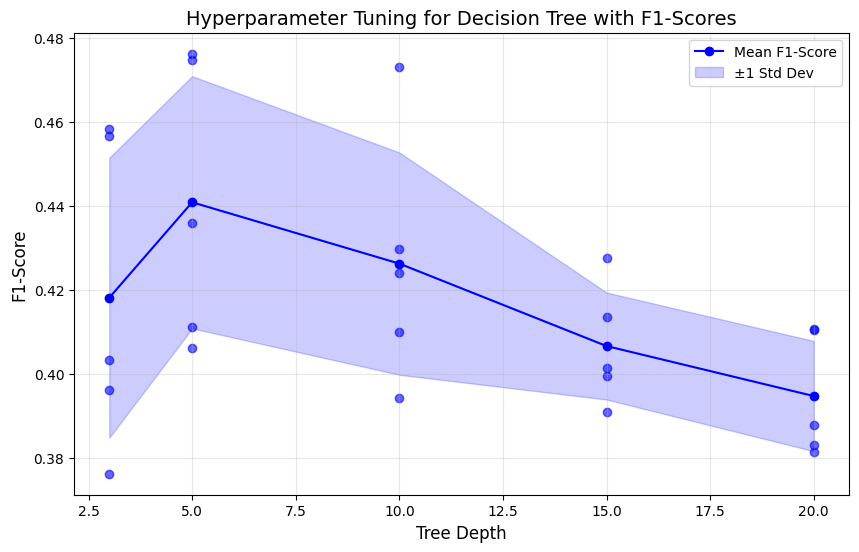

Tree Depth = 3: F1-Scores for each fold = [0.45833333 0.45654994 0.37621024 0.39620081 0.40322581], Mean F1-Score = 0.4181
Tree Depth = 5: F1-Scores for each fold = [0.47619048 0.47474747 0.41114058 0.4358655  0.40620957], Mean F1-Score = 0.4408
Tree Depth = 10: F1-Scores for each fold = [0.41       0.47306792 0.42979243 0.42401961 0.39423077], Mean F1-Score = 0.4262
Tree Depth = 15: F1-Scores for each fold = [0.39957717 0.4135737  0.39097744 0.40128755 0.42758621], Mean F1-Score = 0.4066
Tree Depth = 20: F1-Scores for each fold = [0.38777459 0.38314945 0.3814329  0.4106814  0.41044776], Mean F1-Score = 0.3947


In [79]:
# Define the hyperparameter values to test (max depths)
depth_values = [3, 5, 10, 15, 20]

# Initialize a dictionary to store results for each depth
results = {}

# Loop over each value of max_depth
for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=88)  # Initialize Decision Tree with current depth
    cv_scores = cross_val_score(tree, X_middle_aged_train_reduced, y_middle_aged_train_reduced, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[depth] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each depth
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(depth_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for depth, scores in results.items():
    plt.scatter([depth] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Decision Tree with F1-Scores', fontsize=14)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each depth
for depth, scores in results.items():
    print(f"Tree Depth = {depth}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0302 seconds
Prediction runtime: 0.0007 seconds


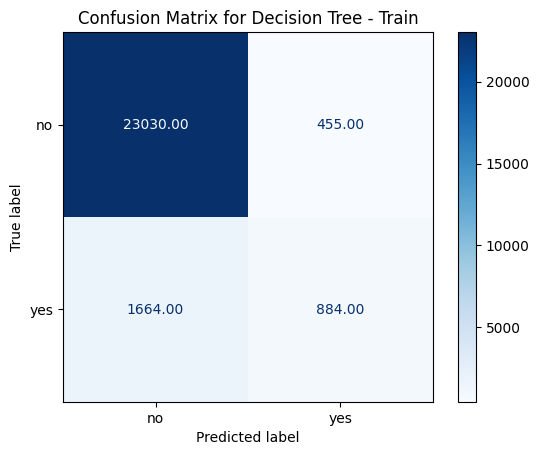

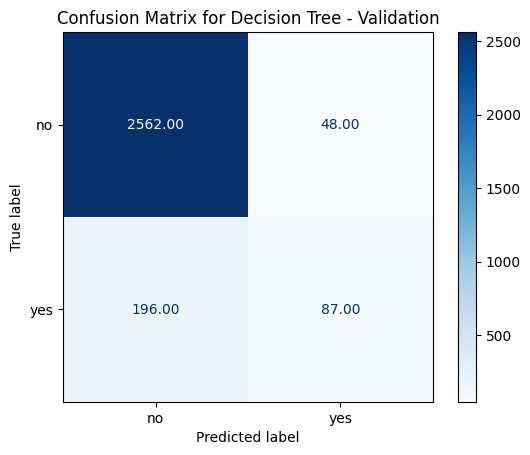


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.93      0.98      0.96     23485
         yes       0.66      0.35      0.45      2548

    accuracy                           0.92     26033
   macro avg       0.80      0.66      0.71     26033
weighted avg       0.91      0.92      0.91     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      2610
         yes       0.64      0.31      0.42       283

    accuracy                           0.92      2893
   macro avg       0.79      0.64      0.69      2893
weighted avg       0.90      0.92      0.90      2893



In [80]:
# Based on earlier hyperparameter tuning
best_depth = 5 

# Initialize the Decision Tree model
tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=88)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
tree_best.fit(X_middle_aged_train_reduced, y_middle_aged_train_reduced)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = tree_best.predict(X_middle_aged_train_reduced)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = tree_best.predict(X_middle_aged_val_reduced)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val_reduced, y_val_pred)

# Plot confusion matrix for Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Train')
plt.show()

disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val_reduced, y_val_pred, target_names=["no", "yes"]))

#### Senior

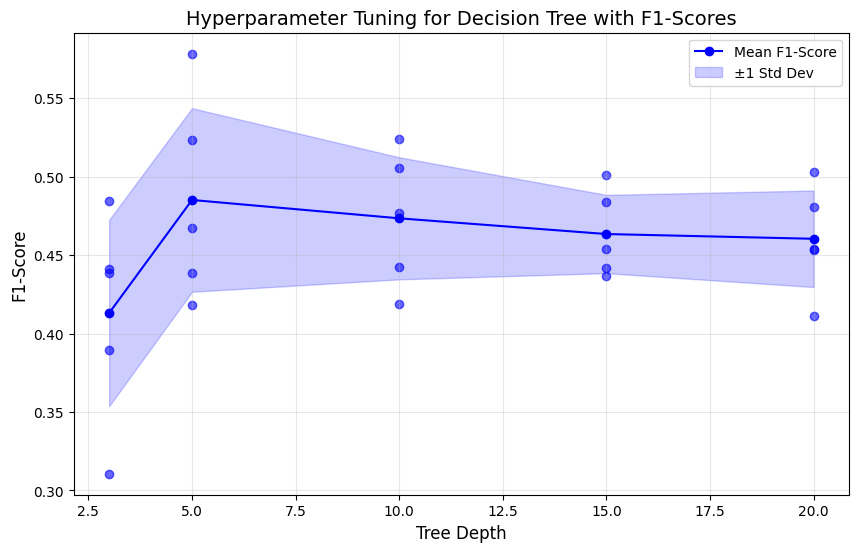

Tree Depth = 3: F1-Scores for each fold = [0.38983051 0.31067961 0.43888889 0.48467967 0.44141689], Mean F1-Score = 0.4131
Tree Depth = 5: F1-Scores for each fold = [0.43877551 0.46733668 0.4180791  0.57843137 0.52336449], Mean F1-Score = 0.4852
Tree Depth = 10: F1-Scores for each fold = [0.44239631 0.47663551 0.41871921 0.52403846 0.50569476], Mean F1-Score = 0.4735
Tree Depth = 15: F1-Scores for each fold = [0.44161359 0.43668122 0.45414847 0.5010989  0.48387097], Mean F1-Score = 0.4635
Tree Depth = 20: F1-Scores for each fold = [0.4534413  0.4111349  0.48049281 0.45416667 0.50301811], Mean F1-Score = 0.4605


In [81]:
# Define the hyperparameter values to test (max depths)
depth_values = [3, 5, 10, 15, 20]

# Initialize a dictionary to store results for each depth
results = {}

# Loop over each value of max_depth
for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=88)  # Initialize Decision Tree with current depth
    cv_scores = cross_val_score(tree, X_senior_train, y_senior_train, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[depth] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each depth
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(depth_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for depth, scores in results.items():
    plt.scatter([depth] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Decision Tree with F1-Scores', fontsize=14)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each depth
for depth, scores in results.items():
    print(f"Tree Depth = {depth}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0158 seconds
Prediction runtime: 0.0010 seconds


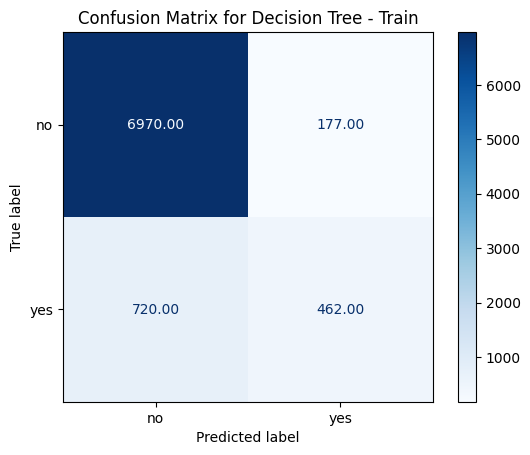

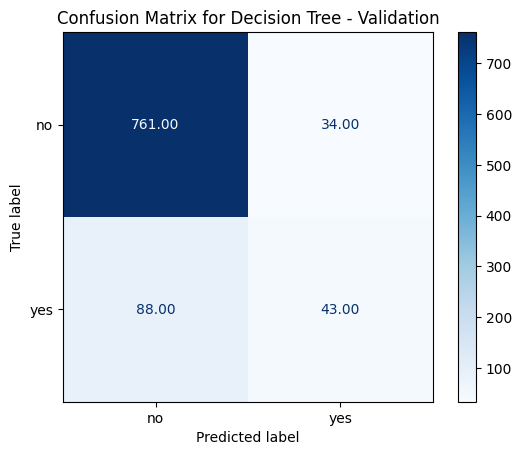


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7147
         yes       0.72      0.39      0.51      1182

    accuracy                           0.89      8329
   macro avg       0.81      0.68      0.72      8329
weighted avg       0.88      0.89      0.88      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.90      0.96      0.93       795
         yes       0.56      0.33      0.41       131

    accuracy                           0.87       926
   macro avg       0.73      0.64      0.67       926
weighted avg       0.85      0.87      0.85       926



In [82]:
# Based on earlier hyperparameter tuning
best_depth = 5 

# Initialize the Decision Tree model
tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=88)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
tree_best.fit(X_senior_train, y_senior_train)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = tree_best.predict(X_senior_train)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = tree_best.predict(X_senior_val)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val, y_val_pred)

# Plot confusion matrix for Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Train')
plt.show()

disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

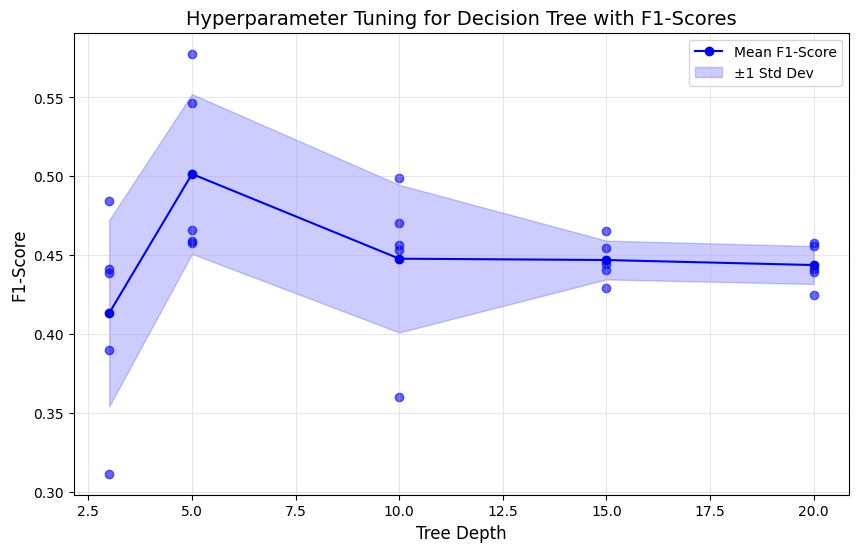

Tree Depth = 3: F1-Scores for each fold = [0.38983051 0.31168831 0.43888889 0.48467967 0.44141689], Mean F1-Score = 0.4133
Tree Depth = 5: F1-Scores for each fold = [0.45925926 0.46616541 0.45776567 0.5776699  0.54672897], Mean F1-Score = 0.5015
Tree Depth = 10: F1-Scores for each fold = [0.45637584 0.36       0.45365854 0.47058824 0.49875312], Mean F1-Score = 0.4479
Tree Depth = 15: F1-Scores for each fold = [0.42950108 0.45475638 0.44090909 0.44444444 0.46551724], Mean F1-Score = 0.4470
Tree Depth = 20: F1-Scores for each fold = [0.4248927  0.45575221 0.43923241 0.45773196 0.44161359], Mean F1-Score = 0.4438


In [83]:
# Define the hyperparameter values to test (max depths)
depth_values = [3, 5, 10, 15, 20]

# Initialize a dictionary to store results for each depth
results = {}

# Loop over each value of max_depth
for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=88)  # Initialize Decision Tree with current depth
    cv_scores = cross_val_score(tree, X_senior_train_reduced, y_senior_train_reduced, cv=5, scoring=f1_scorer)  # 5-fold CV
    results[depth] = cv_scores  # Store F1-Scores for each fold

# Calculate mean and standard deviation for each depth
mean_f1_scores = [np.mean(scores) for scores in results.values()]
std_f1_scores = [np.std(scores) for scores in results.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(depth_values, mean_f1_scores, marker='o', linestyle='-', color='blue', label='Mean F1-Score')
plt.fill_between(depth_values,
                 [m - s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 [m + s for m, s in zip(mean_f1_scores, std_f1_scores)],
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for depth, scores in results.items():
    plt.scatter([depth] * len(scores), scores, color='blue', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Decision Tree with F1-Scores', fontsize=14)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each depth
for depth, scores in results.items():
    print(f"Tree Depth = {depth}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0098 seconds
Prediction runtime: 0.0006 seconds


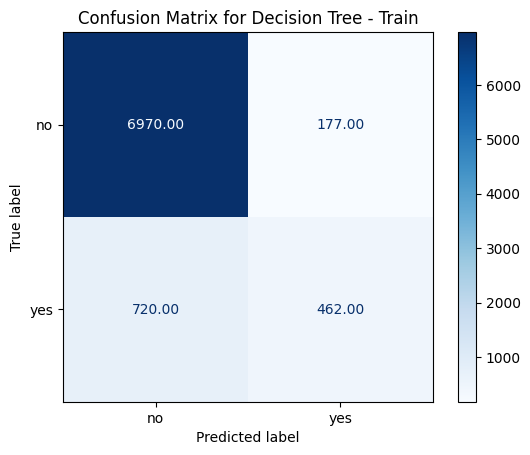

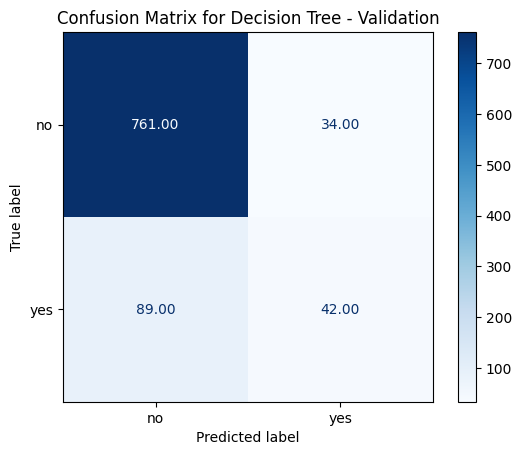


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7147
         yes       0.72      0.39      0.51      1182

    accuracy                           0.89      8329
   macro avg       0.81      0.68      0.72      8329
weighted avg       0.88      0.89      0.88      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.90      0.96      0.93       795
         yes       0.55      0.32      0.41       131

    accuracy                           0.87       926
   macro avg       0.72      0.64      0.67       926
weighted avg       0.85      0.87      0.85       926



In [84]:
# Based on earlier hyperparameter tuning
best_depth = 5 

# Initialize the Decision Tree model
tree_best = DecisionTreeClassifier(max_depth=best_depth, random_state=88)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
tree_best.fit(X_senior_train_reduced, y_senior_train_reduced)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = tree_best.predict(X_senior_train_reduced)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = tree_best.predict(X_senior_val_reduced)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val_reduced, y_val_pred)

# Plot confusion matrix for Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Train')
plt.show()

disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_tree.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Decision Tree - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val_reduced, y_val_pred, target_names=["no", "yes"]))

### Random Forest:

#### Young

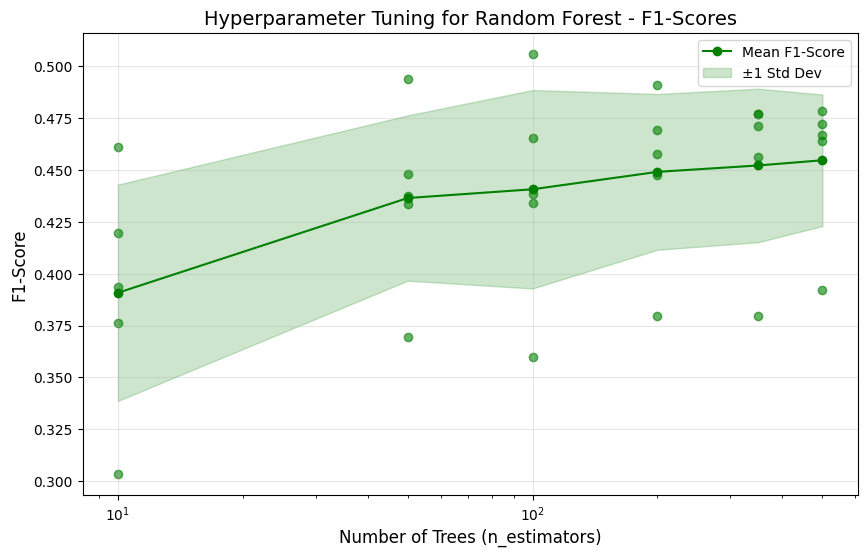

n_estimators = 10: F1-Scores for each fold = [0.39375    0.37623762 0.46105919 0.30344828 0.41945289], Mean F1-Score = 0.3908
n_estimators = 50: F1-Scores for each fold = [0.44785276 0.43365696 0.49390244 0.36933798 0.43768997], Mean F1-Score = 0.4365
n_estimators = 100: F1-Scores for each fold = [0.4652568  0.43396226 0.5060241  0.35986159 0.43843844], Mean F1-Score = 0.4407
n_estimators = 200: F1-Scores for each fold = [0.4695122  0.45768025 0.49090909 0.37966102 0.44776119], Mean F1-Score = 0.4491
n_estimators = 350: F1-Scores for each fold = [0.47129909 0.47678019 0.47678019 0.37966102 0.45645646], Mean F1-Score = 0.4522
n_estimators = 500: F1-Scores for each fold = [0.46706587 0.47204969 0.47852761 0.39202658 0.46385542], Mean F1-Score = 0.4547


In [85]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter values to test
n_estimators_values = [10, 50, 100, 200, 350, 500]

# Initialize a dictionary to store results for each n_estimators
results_rf = {}

# Perform 5-fold cross-validation for each value of n_estimators
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=88)
    cv_scores = cross_val_score(rf, X_young_train, y_young_train, cv=5, scoring=f1_scorer)
    results_rf[n] = cv_scores

# Calculate mean and standard deviation for each n_estimators
mean_f1_scores_rf = [np.mean(scores) for scores in results_rf.values()]
std_f1_scores_rf = [np.std(scores) for scores in results_rf.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_f1_scores_rf, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(n_estimators_values,
                 [m - s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 [m + s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for n, scores in results_rf.items():
    plt.scatter([n] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Random Forest - F1-Scores', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for n_estimators
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each n_estimators
for n, scores in results_rf.items():
    print(f"n_estimators = {n}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 1.0414 seconds
Prediction runtime: 0.0295 seconds


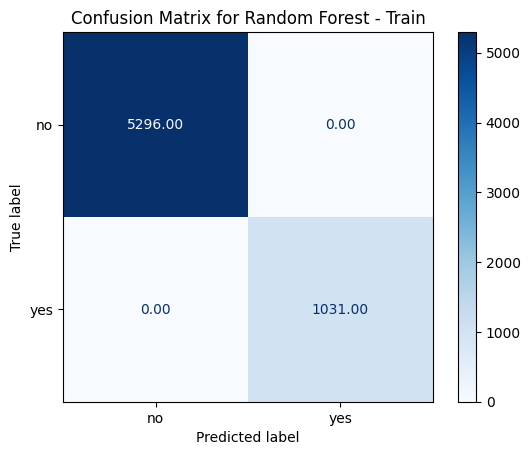

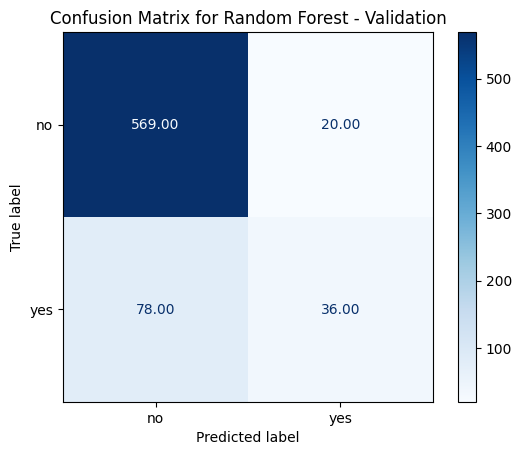


Classification Report for Train:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      5296
         yes       1.00      1.00      1.00      1031

    accuracy                           1.00      6327
   macro avg       1.00      1.00      1.00      6327
weighted avg       1.00      1.00      1.00      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.88      0.97      0.92       589
         yes       0.64      0.32      0.42       114

    accuracy                           0.86       703
   macro avg       0.76      0.64      0.67       703
weighted avg       0.84      0.86      0.84       703



In [86]:
# Best hyperparameter value from cross-validation
best_n_estimators = 350

# Train the Random Forest model on the entire training dataset
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=88)

# Measure training runtime
start_time = time.time()
rf_best.fit(X_young_train, y_young_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = rf_best.predict(X_young_train)

# Measure prediction runtime on validation dataset
start_time = time.time()
y_val_pred = rf_best.predict(X_young_val)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val, y_val_pred)

# Plot confusion matrix for training
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_rf_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Train')
plt.show()

# Plot confusion matrix for validation
disp_rf_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_rf_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

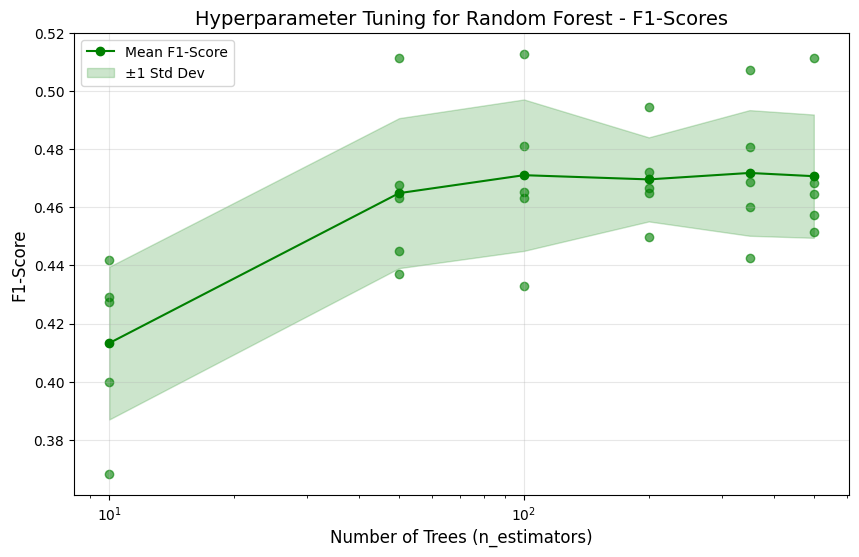

n_estimators = 10: F1-Scores for each fold = [0.42900302 0.44171779 0.4272997  0.36825397 0.4       ], Mean F1-Score = 0.4133
n_estimators = 50: F1-Scores for each fold = [0.46783626 0.44512195 0.51123596 0.43692308 0.46327684], Mean F1-Score = 0.4649
n_estimators = 100: F1-Scores for each fold = [0.46511628 0.48115942 0.51282051 0.43292683 0.46327684], Mean F1-Score = 0.4711
n_estimators = 200: F1-Scores for each fold = [0.44970414 0.47230321 0.49438202 0.46666667 0.46498599], Mean F1-Score = 0.4696
n_estimators = 350: F1-Scores for each fold = [0.44247788 0.46017699 0.50720461 0.48071217 0.46857143], Mean F1-Score = 0.4718
n_estimators = 500: F1-Scores for each fold = [0.45747801 0.46470588 0.51149425 0.46846847 0.45142857], Mean F1-Score = 0.4707


In [87]:
# Define hyperparameter values to test
n_estimators_values = [10, 50, 100, 200, 350, 500]

# Initialize a dictionary to store results for each n_estimators
results_rf = {}

# Perform 5-fold cross-validation for each value of n_estimators
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=88)
    cv_scores = cross_val_score(rf, X_young_train_reduced, y_young_train_reduced, cv=5, scoring=f1_scorer)
    results_rf[n] = cv_scores

# Calculate mean and standard deviation for each n_estimators
mean_f1_scores_rf = [np.mean(scores) for scores in results_rf.values()]
std_f1_scores_rf = [np.std(scores) for scores in results_rf.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_f1_scores_rf, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(n_estimators_values,
                 [m - s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 [m + s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for n, scores in results_rf.items():
    plt.scatter([n] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Random Forest - F1-Scores', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for n_estimators
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each n_estimators
for n, scores in results_rf.items():
    print(f"n_estimators = {n}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.3298 seconds
Prediction runtime: 0.0086 seconds


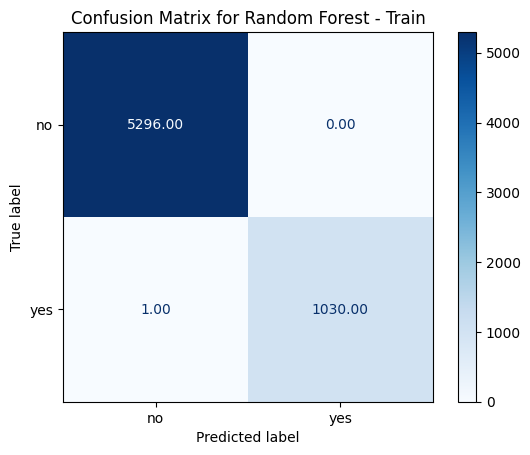

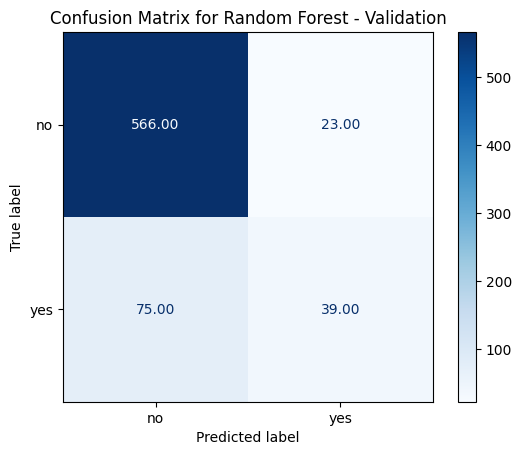


Classification Report for Train:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      5296
         yes       1.00      1.00      1.00      1031

    accuracy                           1.00      6327
   macro avg       1.00      1.00      1.00      6327
weighted avg       1.00      1.00      1.00      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.88      0.96      0.92       589
         yes       0.63      0.34      0.44       114

    accuracy                           0.86       703
   macro avg       0.76      0.65      0.68       703
weighted avg       0.84      0.86      0.84       703



In [88]:
# Best hyperparameter value from cross-validation
best_n_estimators = 100

# Train the Random Forest model on the entire training dataset
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=88)

# Measure training runtime
start_time = time.time()
rf_best.fit(X_young_train_reduced, y_young_train_reduced)
end_time = time.time()
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = rf_best.predict(X_young_train_reduced)

# Measure prediction runtime on validation dataset
start_time = time.time()
y_val_pred = rf_best.predict(X_young_val_reduced)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val_reduced, y_val_pred)

# Plot confusion matrix for training
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_rf_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Train')
plt.show()

# Plot confusion matrix for validation
disp_rf_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_rf_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val_reduced, y_val_pred, target_names=["no", "yes"]))

#### Middle_aged

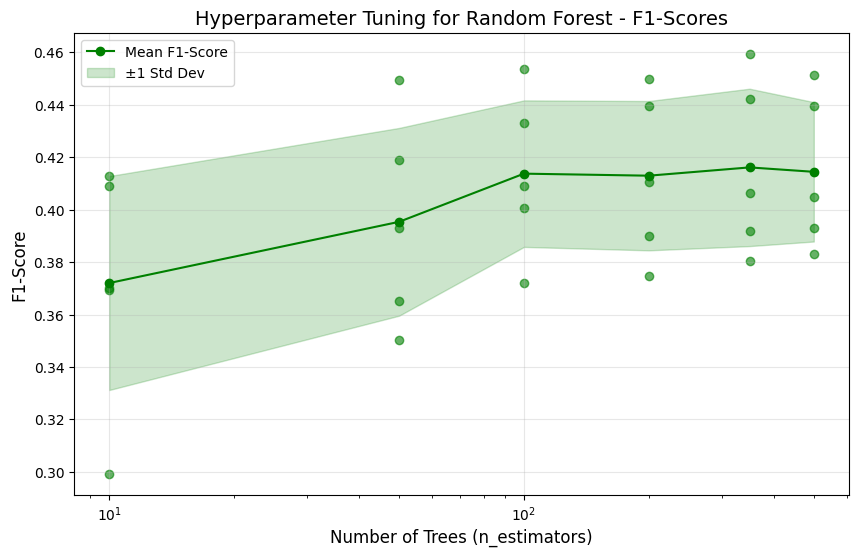

n_estimators = 10: F1-Scores for each fold = [0.41261498 0.36927224 0.36995828 0.40891219 0.29928058], Mean F1-Score = 0.3720
n_estimators = 50: F1-Scores for each fold = [0.44940867 0.39295393 0.35048679 0.41872562 0.36512262], Mean F1-Score = 0.3953
n_estimators = 100: F1-Scores for each fold = [0.45371578 0.40915209 0.37209302 0.43298969 0.40053763], Mean F1-Score = 0.4137
n_estimators = 200: F1-Scores for each fold = [0.4496124  0.41066667 0.374829   0.43964422 0.38985314], Mean F1-Score = 0.4129
n_estimators = 350: F1-Scores for each fold = [0.45935484 0.40641711 0.38043478 0.44218551 0.392     ], Mean F1-Score = 0.4161
n_estimators = 500: F1-Scores for each fold = [0.45136187 0.40482574 0.38315217 0.43964422 0.39300135], Mean F1-Score = 0.4144


In [89]:
# Define hyperparameter values to test
n_estimators_values = [10, 50, 100, 200, 350, 500]

# Initialize a dictionary to store results for each n_estimators
results_rf = {}

# Perform 5-fold cross-validation for each value of n_estimators
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=88)
    cv_scores = cross_val_score(rf, X_middle_aged_train, y_middle_aged_train, cv=5, scoring=f1_scorer)
    results_rf[n] = cv_scores

# Calculate mean and standard deviation for each n_estimators
mean_f1_scores_rf = [np.mean(scores) for scores in results_rf.values()]
std_f1_scores_rf = [np.std(scores) for scores in results_rf.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_f1_scores_rf, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(n_estimators_values,
                 [m - s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 [m + s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for n, scores in results_rf.items():
    plt.scatter([n] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Random Forest - F1-Scores', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for n_estimators
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each n_estimators
for n, scores in results_rf.items():
    print(f"n_estimators = {n}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 1.3119 seconds
Prediction runtime: 0.0321 seconds


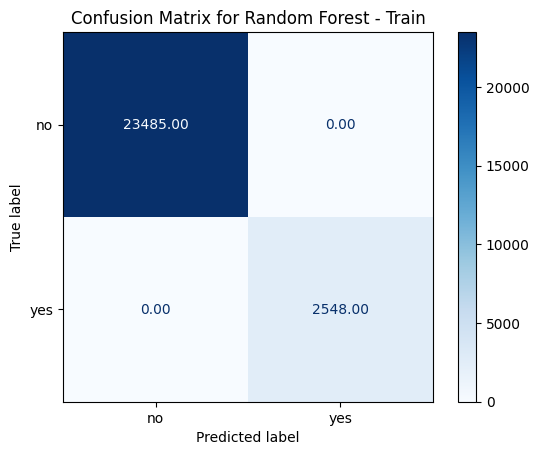

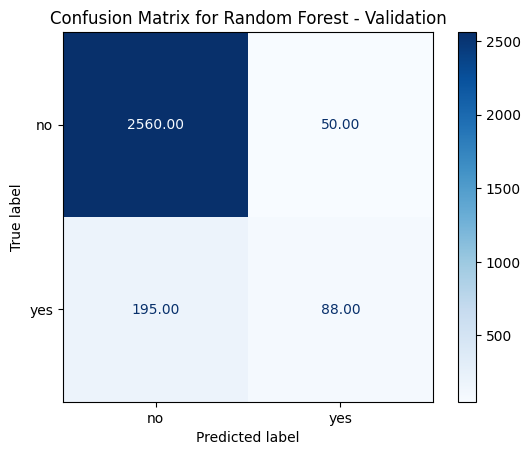


Classification Report for Train:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     23485
         yes       1.00      1.00      1.00      2548

    accuracy                           1.00     26033
   macro avg       1.00      1.00      1.00     26033
weighted avg       1.00      1.00      1.00     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      2610
         yes       0.64      0.31      0.42       283

    accuracy                           0.92      2893
   macro avg       0.78      0.65      0.69      2893
weighted avg       0.90      0.92      0.90      2893



In [90]:
# Best hyperparameter value from cross-validation
best_n_estimators = 100

# Train the Random Forest model on the entire training dataset
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=88)

# Measure training runtime
start_time = time.time()
rf_best.fit(X_middle_aged_train, y_middle_aged_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = rf_best.predict(X_middle_aged_train)

# Measure prediction runtime on validation dataset
start_time = time.time()
y_val_pred = rf_best.predict(X_middle_aged_val)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val, y_val_pred)

# Plot confusion matrix for training
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_rf_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Train')
plt.show()

# Plot confusion matrix for validation
disp_rf_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_rf_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

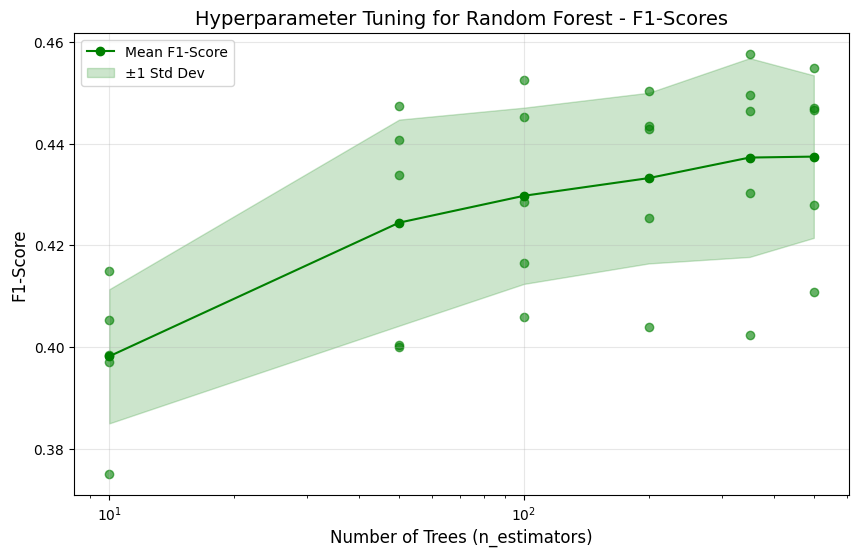

n_estimators = 10: F1-Scores for each fold = [0.39704069 0.39852399 0.37516171 0.40543881 0.415     ], Mean F1-Score = 0.3982
n_estimators = 50: F1-Scores for each fold = [0.44071856 0.43382353 0.40050378 0.44730679 0.4       ], Mean F1-Score = 0.4245
n_estimators = 100: F1-Scores for each fold = [0.44524669 0.42857143 0.40601504 0.45243619 0.41646489], Mean F1-Score = 0.4297
n_estimators = 200: F1-Scores for each fold = [0.44283995 0.44336175 0.40401506 0.4504084  0.42548077], Mean F1-Score = 0.4332
n_estimators = 350: F1-Scores for each fold = [0.44951923 0.44634146 0.4025     0.45760743 0.43028846], Mean F1-Score = 0.4373
n_estimators = 500: F1-Scores for each fold = [0.4547619  0.44662577 0.41089109 0.44703143 0.42788462], Mean F1-Score = 0.4374


In [91]:
# Define hyperparameter values to test
n_estimators_values = [10, 50, 100, 200, 350, 500]

# Initialize a dictionary to store results for each n_estimators
results_rf = {}

# Perform 5-fold cross-validation for each value of n_estimators
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=88)
    cv_scores = cross_val_score(rf, X_middle_aged_train_reduced, y_middle_aged_train_reduced, cv=5, scoring=f1_scorer)
    results_rf[n] = cv_scores

# Calculate mean and standard deviation for each n_estimators
mean_f1_scores_rf = [np.mean(scores) for scores in results_rf.values()]
std_f1_scores_rf = [np.std(scores) for scores in results_rf.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_f1_scores_rf, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(n_estimators_values,
                 [m - s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 [m + s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for n, scores in results_rf.items():
    plt.scatter([n] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Random Forest - F1-Scores', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for n_estimators
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each n_estimators
for n, scores in results_rf.items():
    print(f"n_estimators = {n}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 4.5612 seconds
Prediction runtime: 0.1028 seconds


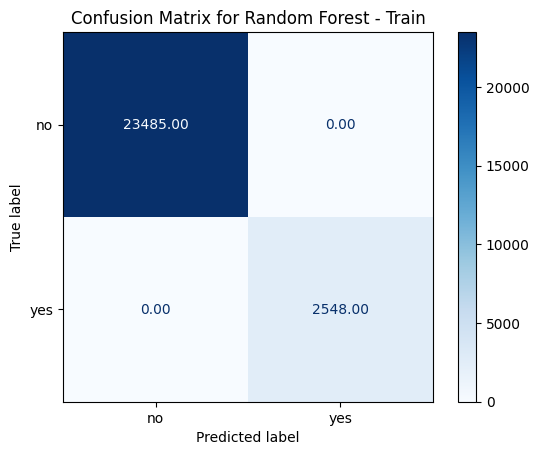

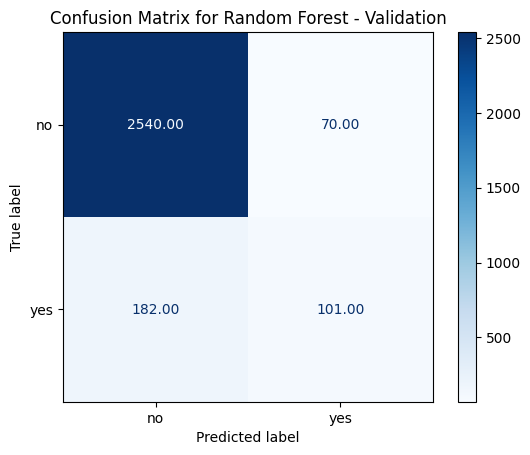


Classification Report for Train:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     23485
         yes       1.00      1.00      1.00      2548

    accuracy                           1.00     26033
   macro avg       1.00      1.00      1.00     26033
weighted avg       1.00      1.00      1.00     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      2610
         yes       0.59      0.36      0.44       283

    accuracy                           0.91      2893
   macro avg       0.76      0.67      0.70      2893
weighted avg       0.90      0.91      0.90      2893



In [92]:
# Best hyperparameter value from cross-validation
best_n_estimators = 350

# Train the Random Forest model on the entire training dataset
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=88)

# Measure training runtime
start_time = time.time()
rf_best.fit(X_middle_aged_train_reduced, y_middle_aged_train_reduced)
end_time = time.time()
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = rf_best.predict(X_middle_aged_train_reduced)

# Measure prediction runtime on validation dataset
start_time = time.time()
y_val_pred = rf_best.predict(X_middle_aged_val_reduced)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val_reduced, y_val_pred)

# Plot confusion matrix for training
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_rf_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Train')
plt.show()

# Plot confusion matrix for validation
disp_rf_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_rf_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val_reduced, y_val_pred, target_names=["no", "yes"]))

#### Senior

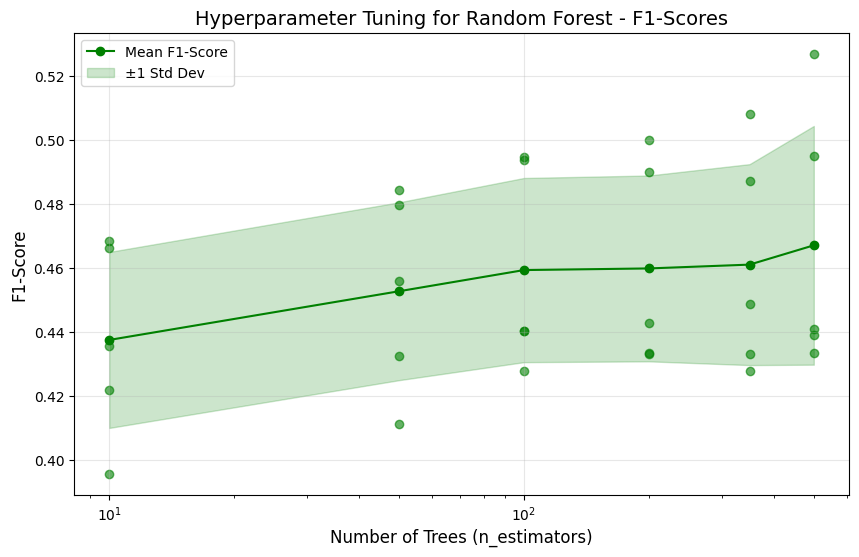

n_estimators = 10: F1-Scores for each fold = [0.42162162 0.43548387 0.39554318 0.46831956 0.46612466], Mean F1-Score = 0.4374
n_estimators = 50: F1-Scores for each fold = [0.43229167 0.45576408 0.41126761 0.47956403 0.484375  ], Mean F1-Score = 0.4527
n_estimators = 100: F1-Scores for each fold = [0.42780749 0.44021739 0.44011142 0.49456522 0.49363868], Mean F1-Score = 0.4593
n_estimators = 200: F1-Scores for each fold = [0.43315508 0.44262295 0.43333333 0.5        0.48979592], Mean F1-Score = 0.4598
n_estimators = 350: F1-Scores for each fold = [0.43315508 0.44864865 0.42777778 0.50810811 0.48717949], Mean F1-Score = 0.4610
n_estimators = 500: F1-Scores for each fold = [0.43902439 0.44086022 0.43333333 0.52688172 0.49494949], Mean F1-Score = 0.4670


In [93]:
# Define hyperparameter values to test
n_estimators_values = [10, 50, 100, 200, 350, 500]

# Initialize a dictionary to store results for each n_estimators
results_rf = {}

# Perform 5-fold cross-validation for each value of n_estimators
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=88)
    cv_scores = cross_val_score(rf, X_senior_train, y_senior_train, cv=5, scoring=f1_scorer)
    results_rf[n] = cv_scores

# Calculate mean and standard deviation for each n_estimators
mean_f1_scores_rf = [np.mean(scores) for scores in results_rf.values()]
std_f1_scores_rf = [np.std(scores) for scores in results_rf.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_f1_scores_rf, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(n_estimators_values,
                 [m - s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 [m + s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for n, scores in results_rf.items():
    plt.scatter([n] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Random Forest - F1-Scores', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for n_estimators
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each n_estimators
for n, scores in results_rf.items():
    print(f"n_estimators = {n}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 2.1763 seconds
Prediction runtime: 0.0498 seconds


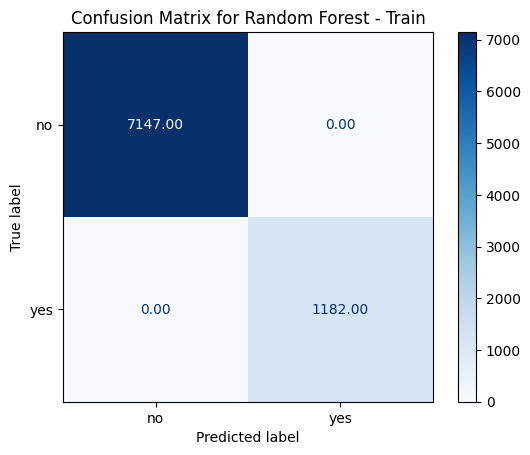

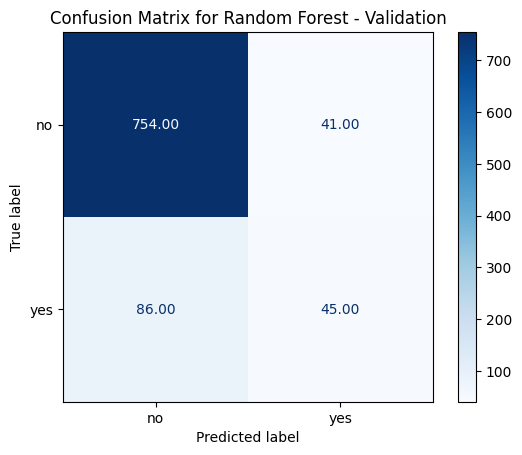


Classification Report for Train:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      7147
         yes       1.00      1.00      1.00      1182

    accuracy                           1.00      8329
   macro avg       1.00      1.00      1.00      8329
weighted avg       1.00      1.00      1.00      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.90      0.95      0.92       795
         yes       0.52      0.34      0.41       131

    accuracy                           0.86       926
   macro avg       0.71      0.65      0.67       926
weighted avg       0.84      0.86      0.85       926



In [94]:
# Best hyperparameter value from cross-validation
best_n_estimators = 500

# Train the Random Forest model on the entire training dataset
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=88)

# Measure training runtime
start_time = time.time()
rf_best.fit(X_senior_train, y_senior_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = rf_best.predict(X_senior_train)

# Measure prediction runtime on validation dataset
start_time = time.time()
y_val_pred = rf_best.predict(X_senior_val)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val, y_val_pred)

# Plot confusion matrix for training
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_rf_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Train')
plt.show()

# Plot confusion matrix for validation
disp_rf_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_rf_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

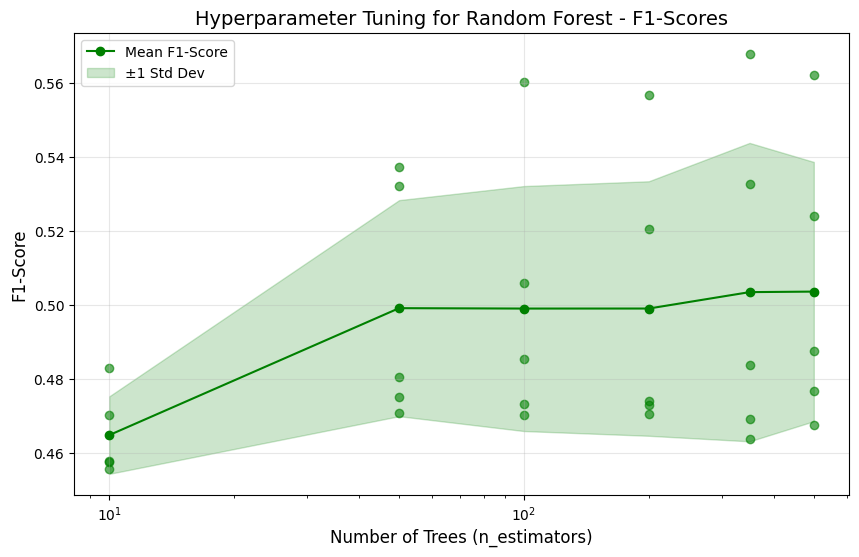

n_estimators = 10: F1-Scores for each fold = [0.45742092 0.47029703 0.45771144 0.45549738 0.48292683], Mean F1-Score = 0.4648
n_estimators = 50: F1-Scores for each fold = [0.47087379 0.48039216 0.475      0.53731343 0.53206651], Mean F1-Score = 0.4991
n_estimators = 100: F1-Scores for each fold = [0.47317073 0.48529412 0.47029703 0.56038647 0.50596659], Mean F1-Score = 0.4990
n_estimators = 200: F1-Scores for each fold = [0.47058824 0.4729064  0.47407407 0.55690073 0.52068127], Mean F1-Score = 0.4990
n_estimators = 350: F1-Scores for each fold = [0.46376812 0.4691358  0.48379052 0.56796117 0.53268765], Mean F1-Score = 0.5035
n_estimators = 500: F1-Scores for each fold = [0.46746988 0.47665848 0.48756219 0.56234719 0.52403846], Mean F1-Score = 0.5036


In [95]:
# Define hyperparameter values to test
n_estimators_values = [10, 50, 100, 200, 350, 500]

# Initialize a dictionary to store results for each n_estimators
results_rf = {}

# Perform 5-fold cross-validation for each value of n_estimators
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=88)
    cv_scores = cross_val_score(rf, X_senior_train_reduced, y_senior_train_reduced, cv=5, scoring=f1_scorer)
    results_rf[n] = cv_scores

# Calculate mean and standard deviation for each n_estimators
mean_f1_scores_rf = [np.mean(scores) for scores in results_rf.values()]
std_f1_scores_rf = [np.std(scores) for scores in results_rf.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_f1_scores_rf, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(n_estimators_values,
                 [m - s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 [m + s for m, s in zip(mean_f1_scores_rf, std_f1_scores_rf)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for n, scores in results_rf.items():
    plt.scatter([n] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Random Forest - F1-Scores', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for n_estimators
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each n_estimators
for n, scores in results_rf.items():
    print(f"n_estimators = {n}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 1.2385 seconds
Prediction runtime: 0.0335 seconds


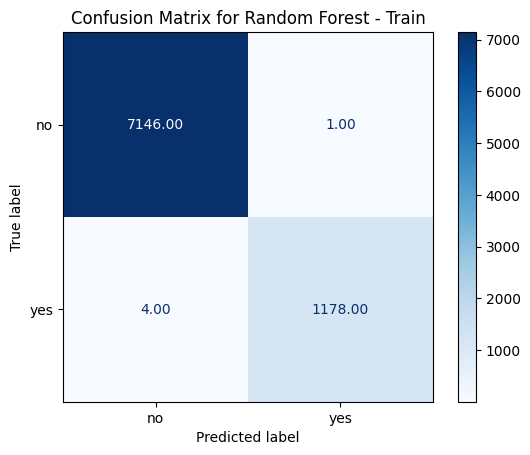

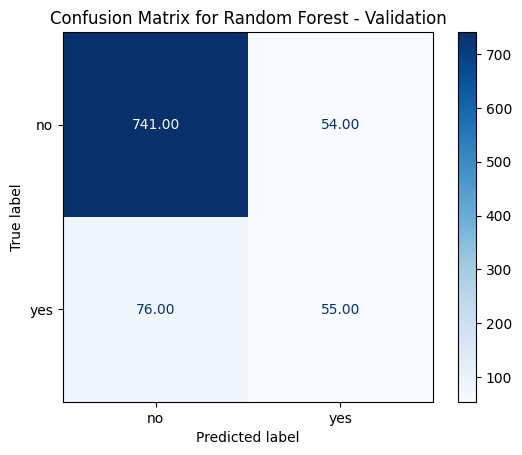


Classification Report for Train:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      7147
         yes       1.00      1.00      1.00      1182

    accuracy                           1.00      8329
   macro avg       1.00      1.00      1.00      8329
weighted avg       1.00      1.00      1.00      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.91      0.93      0.92       795
         yes       0.50      0.42      0.46       131

    accuracy                           0.86       926
   macro avg       0.71      0.68      0.69       926
weighted avg       0.85      0.86      0.85       926



In [96]:
# Best hyperparameter value from cross-validation
best_n_estimators = 350

# Train the Random Forest model on the entire training dataset
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=88)

# Measure training runtime
start_time = time.time()
rf_best.fit(X_senior_train_reduced, y_senior_train_reduced)
end_time = time.time()
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = rf_best.predict(X_senior_train_reduced)

# Measure prediction runtime on validation dataset
start_time = time.time()
y_val_pred = rf_best.predict(X_senior_val_reduced)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val_reduced, y_val_pred)

# Plot confusion matrix for training
disp_rf_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_rf_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Train')
plt.show()

# Plot confusion matrix for validation
disp_rf_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_rf_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Random Forest - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val_reduced, y_val_pred, target_names=["no", "yes"]))

### Naive Bayes Classifier:

#### Young

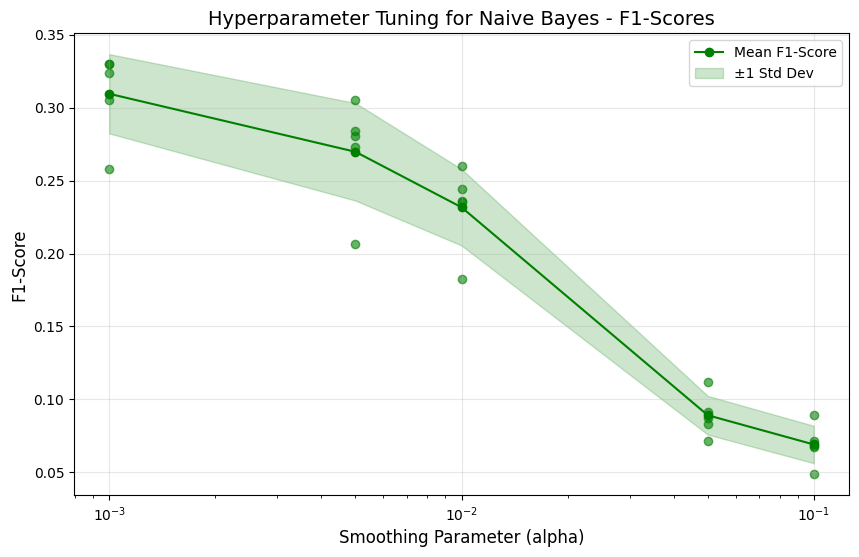

Smoothing Parameter = 0.001: F1-Scores for each fold = [0.33009709 0.30519481 0.32996633 0.25827815 0.32398754], Mean F1-Score = 0.3095
Smoothing Parameter = 0.005: F1-Scores for each fold = [0.28373702 0.27272727 0.28057554 0.20640569 0.30519481], Mean F1-Score = 0.2697
Smoothing Parameter = 0.01: F1-Scores for each fold = [0.23529412 0.23616236 0.24427481 0.18248175 0.26027397], Mean F1-Score = 0.2317
Smoothing Parameter = 0.05: F1-Scores for each fold = [0.08333333 0.09166667 0.07142857 0.08730159 0.112     ], Mean F1-Score = 0.0891
Smoothing Parameter = 0.1: F1-Scores for each fold = [0.06751055 0.06837607 0.07174888 0.04878049 0.08906883], Mean F1-Score = 0.0691


In [97]:
from sklearn.naive_bayes import GaussianNB

# Define hyperparameter values to test (smoothing parameter alpha)
smoothing_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Initialize a dictionary to store results for each alpha
results_nb = {}

# Perform 5-fold cross-validation for each value of alpha
for alpha in smoothing_values:
    nb_model = GaussianNB(var_smoothing=alpha)  # Set the smoothing parameter
    cv_scores = cross_val_score(nb_model, X_young_train, y_young_train, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    results_nb[alpha] = cv_scores

# Calculate mean and standard deviation for each alpha
mean_f1_scores_nb = [np.mean(scores) for scores in results_nb.values()]
std_f1_scores_nb = [np.std(scores) for scores in results_nb.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, mean_f1_scores_nb, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(smoothing_values,
                 [m - s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 [m + s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for alpha, scores in results_nb.items():
    plt.scatter([alpha] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Naive Bayes - F1-Scores', fontsize=14)
plt.xlabel('Smoothing Parameter (alpha)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for smoothing parameter
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each alpha
for alpha, scores in results_nb.items():
    print(f"Smoothing Parameter = {alpha}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0031 seconds
Prediction runtime: 0.0006 seconds


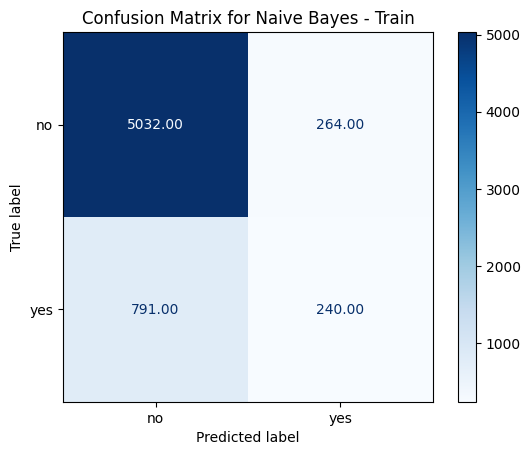

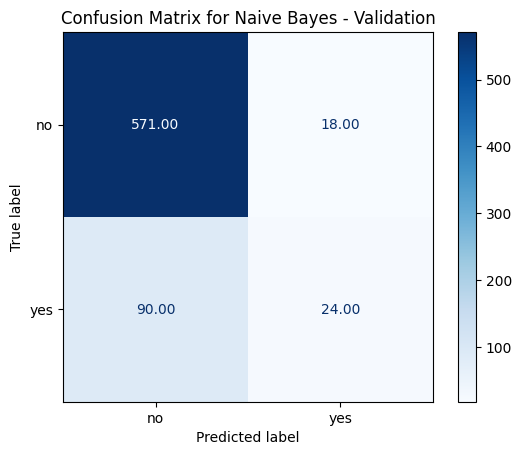


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.86      0.95      0.91      5296
         yes       0.48      0.23      0.31      1031

    accuracy                           0.83      6327
   macro avg       0.67      0.59      0.61      6327
weighted avg       0.80      0.83      0.81      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.86      0.97      0.91       589
         yes       0.57      0.21      0.31       114

    accuracy                           0.85       703
   macro avg       0.72      0.59      0.61       703
weighted avg       0.82      0.85      0.82       703



In [98]:
# Define the best alpha value (replace with your best hyperparameter value)
best_alpha = 0.001

# Initialize the Naive Bayes model with the chosen smoothing parameter
nb_model = GaussianNB(var_smoothing=best_alpha)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
nb_model.fit(X_young_train, y_young_train)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = nb_model.predict(X_young_train)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = nb_model.predict(X_young_val)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val, y_val_pred)

# Plot confusion matrices
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Train')
plt.show()

disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

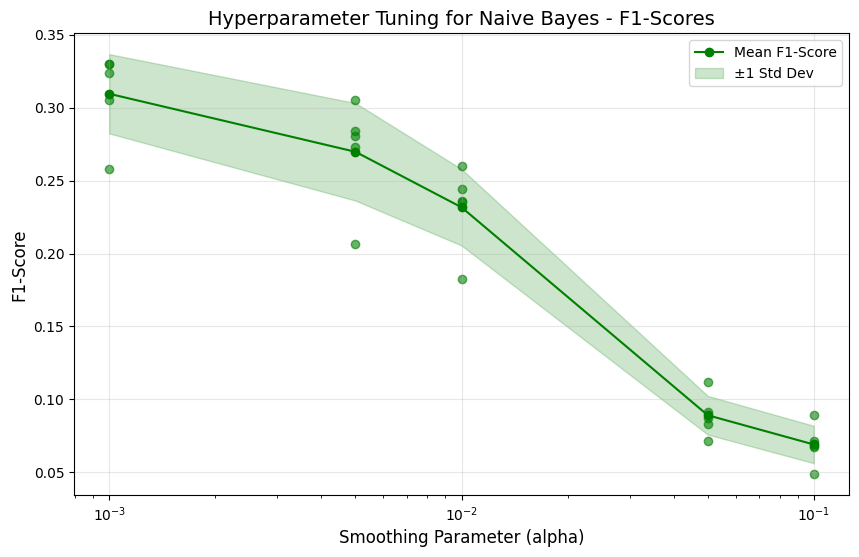

Smoothing Parameter = 0.001: F1-Scores for each fold = [0.33009709 0.30519481 0.32996633 0.25827815 0.32398754], Mean F1-Score = 0.3095
Smoothing Parameter = 0.005: F1-Scores for each fold = [0.28373702 0.27272727 0.28057554 0.20640569 0.30519481], Mean F1-Score = 0.2697
Smoothing Parameter = 0.01: F1-Scores for each fold = [0.23529412 0.23616236 0.24427481 0.18248175 0.26027397], Mean F1-Score = 0.2317
Smoothing Parameter = 0.05: F1-Scores for each fold = [0.08333333 0.09166667 0.07142857 0.08730159 0.112     ], Mean F1-Score = 0.0891
Smoothing Parameter = 0.1: F1-Scores for each fold = [0.06751055 0.06837607 0.07174888 0.04878049 0.08906883], Mean F1-Score = 0.0691


In [99]:
# Define hyperparameter values to test (smoothing parameter alpha)
smoothing_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Initialize a dictionary to store results for each alpha
results_nb = {}

# Perform 5-fold cross-validation for each value of alpha
for alpha in smoothing_values:
    nb_model = GaussianNB(var_smoothing=alpha)  # Set the smoothing parameter
    cv_scores = cross_val_score(nb_model, X_young_train_reduced, y_young_train_reduced, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    results_nb[alpha] = cv_scores

# Calculate mean and standard deviation for each alpha
mean_f1_scores_nb = [np.mean(scores) for scores in results_nb.values()]
std_f1_scores_nb = [np.std(scores) for scores in results_nb.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, mean_f1_scores_nb, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(smoothing_values,
                 [m - s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 [m + s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for alpha, scores in results_nb.items():
    plt.scatter([alpha] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Naive Bayes - F1-Scores', fontsize=14)
plt.xlabel('Smoothing Parameter (alpha)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for smoothing parameter
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each alpha
for alpha, scores in results_nb.items():
    print(f"Smoothing Parameter = {alpha}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0024 seconds
Prediction runtime: 0.0006 seconds


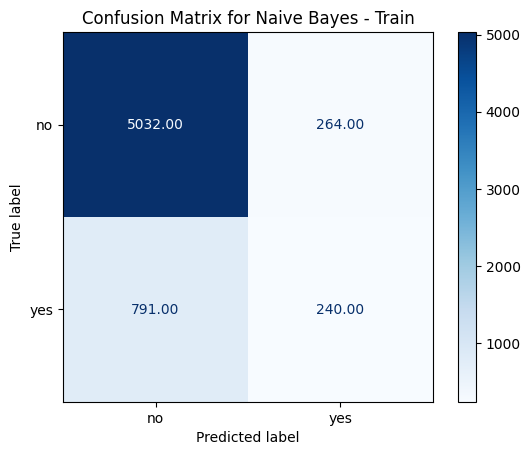

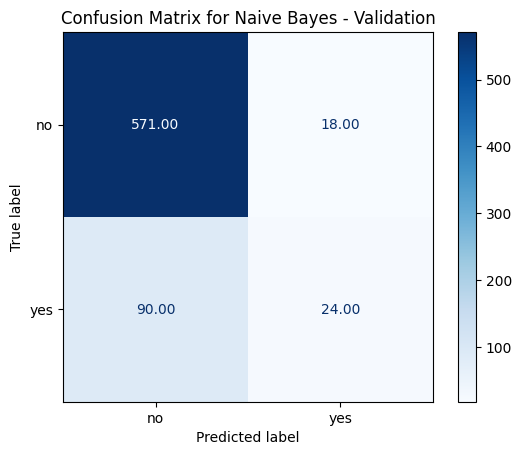


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.86      0.95      0.91      5296
         yes       0.48      0.23      0.31      1031

    accuracy                           0.83      6327
   macro avg       0.67      0.59      0.61      6327
weighted avg       0.80      0.83      0.81      6327


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.86      0.97      0.91       589
         yes       0.57      0.21      0.31       114

    accuracy                           0.85       703
   macro avg       0.72      0.59      0.61       703
weighted avg       0.82      0.85      0.82       703



In [100]:
# Define the best alpha value (replace with your best hyperparameter value)
best_alpha = 0.001

# Initialize the Naive Bayes model with the chosen smoothing parameter
nb_model = GaussianNB(var_smoothing=best_alpha)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
nb_model.fit(X_young_train_reduced, y_young_train_reduced)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = nb_model.predict(X_young_train_reduced)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = nb_model.predict(X_young_val_reduced)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_young_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_young_val_reduced, y_val_pred)

# Plot confusion matrices
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Train')
plt.show()

disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_young_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_young_val_reduced, y_val_pred, target_names=["no", "yes"]))

#### Middle_aged

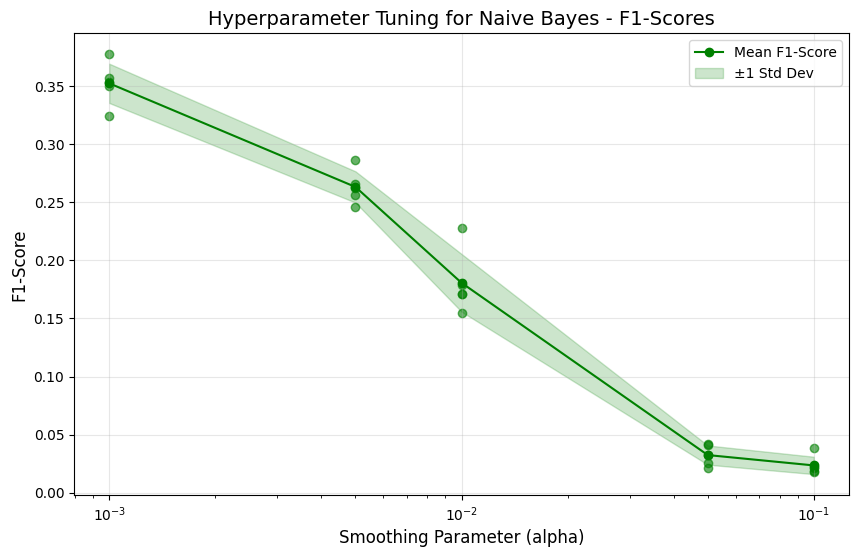

Smoothing Parameter = 0.001: F1-Scores for each fold = [0.32446134 0.35324675 0.34979973 0.35643564 0.37740385], Mean F1-Score = 0.3523
Smoothing Parameter = 0.005: F1-Scores for each fold = [0.24576271 0.26530612 0.26190476 0.25611511 0.28649386], Mean F1-Score = 0.2631
Smoothing Parameter = 0.01: F1-Scores for each fold = [0.17107309 0.17868339 0.15483871 0.17080745 0.22781065], Mean F1-Score = 0.1806
Smoothing Parameter = 0.05: F1-Scores for each fold = [0.0212766  0.04181185 0.02540835 0.0323741  0.04137931], Mean F1-Score = 0.0325
Smoothing Parameter = 0.1: F1-Scores for each fold = [0.01805054 0.02123894 0.01831502 0.02189781 0.03819444], Mean F1-Score = 0.0235


In [101]:
# Define hyperparameter values to test (smoothing parameter alpha)
smoothing_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Initialize a dictionary to store results for each alpha
results_nb = {}

# Perform 5-fold cross-validation for each value of alpha
for alpha in smoothing_values:
    nb_model = GaussianNB(var_smoothing=alpha)  # Set the smoothing parameter
    cv_scores = cross_val_score(nb_model, X_middle_aged_train, y_middle_aged_train, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    results_nb[alpha] = cv_scores

# Calculate mean and standard deviation for each alpha
mean_f1_scores_nb = [np.mean(scores) for scores in results_nb.values()]
std_f1_scores_nb = [np.std(scores) for scores in results_nb.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, mean_f1_scores_nb, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(smoothing_values,
                 [m - s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 [m + s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for alpha, scores in results_nb.items():
    plt.scatter([alpha] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Naive Bayes - F1-Scores', fontsize=14)
plt.xlabel('Smoothing Parameter (alpha)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for smoothing parameter
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each alpha
for alpha, scores in results_nb.items():
    print(f"Smoothing Parameter = {alpha}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0081 seconds
Prediction runtime: 0.0015 seconds


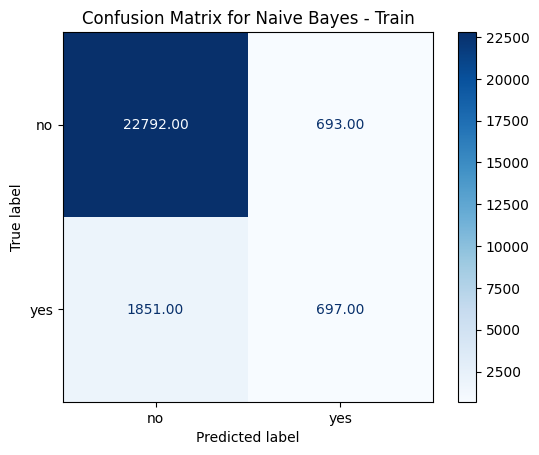

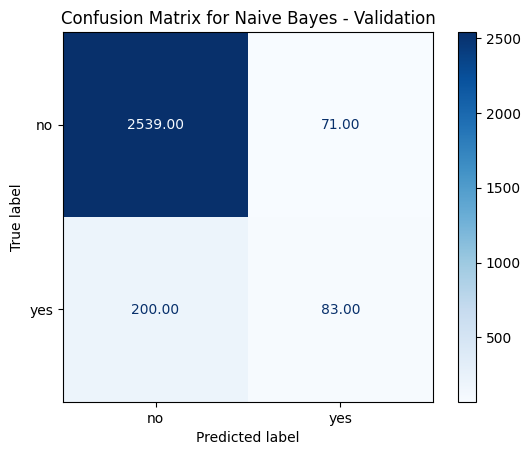


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     23485
         yes       0.50      0.27      0.35      2548

    accuracy                           0.90     26033
   macro avg       0.71      0.62      0.65     26033
weighted avg       0.88      0.90      0.89     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      2610
         yes       0.54      0.29      0.38       283

    accuracy                           0.91      2893
   macro avg       0.73      0.63      0.66      2893
weighted avg       0.89      0.91      0.89      2893



In [102]:
# Define the best alpha value (replace with your best hyperparameter value)
best_alpha = 0.001

# Initialize the Naive Bayes model with the chosen smoothing parameter
nb_model = GaussianNB(var_smoothing=best_alpha)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
nb_model.fit(X_middle_aged_train, y_middle_aged_train)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = nb_model.predict(X_middle_aged_train)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = nb_model.predict(X_middle_aged_val)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val, y_val_pred)

# Plot confusion matrices
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Train')
plt.show()

disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

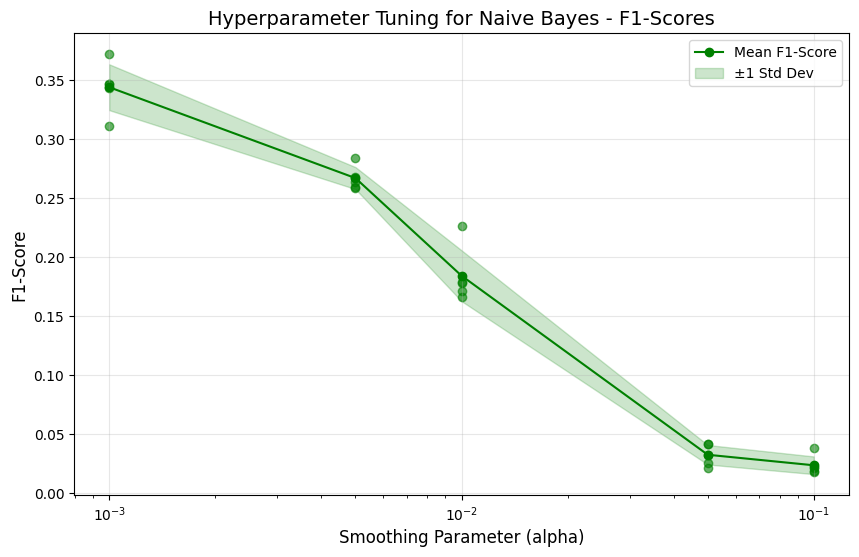

Smoothing Parameter = 0.001: F1-Scores for each fold = [0.31082803 0.34322581 0.34610304 0.34686347 0.37181045], Mean F1-Score = 0.3438
Smoothing Parameter = 0.005: F1-Scores for each fold = [0.25842697 0.26801153 0.2637037  0.2596291  0.28416779], Mean F1-Score = 0.2668
Smoothing Parameter = 0.01: F1-Scores for each fold = [0.17080745 0.178125   0.1664     0.17901235 0.22613803], Mean F1-Score = 0.1841
Smoothing Parameter = 0.05: F1-Scores for each fold = [0.02131439 0.04173913 0.02540835 0.03231598 0.04145078], Mean F1-Score = 0.0324
Smoothing Parameter = 0.1: F1-Scores for each fold = [0.01801802 0.02123894 0.01831502 0.02189781 0.03819444], Mean F1-Score = 0.0235


In [103]:
# Define hyperparameter values to test (smoothing parameter alpha)
smoothing_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Initialize a dictionary to store results for each alpha
results_nb = {}

# Perform 5-fold cross-validation for each value of alpha
for alpha in smoothing_values:
    nb_model = GaussianNB(var_smoothing=alpha)  # Set the smoothing parameter
    cv_scores = cross_val_score(nb_model, X_middle_aged_train_reduced, y_middle_aged_train_reduced, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    results_nb[alpha] = cv_scores

# Calculate mean and standard deviation for each alpha
mean_f1_scores_nb = [np.mean(scores) for scores in results_nb.values()]
std_f1_scores_nb = [np.std(scores) for scores in results_nb.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, mean_f1_scores_nb, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(smoothing_values,
                 [m - s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 [m + s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for alpha, scores in results_nb.items():
    plt.scatter([alpha] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Naive Bayes - F1-Scores', fontsize=14)
plt.xlabel('Smoothing Parameter (alpha)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for smoothing parameter
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each alpha
for alpha, scores in results_nb.items():
    print(f"Smoothing Parameter = {alpha}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0051 seconds
Prediction runtime: 0.0007 seconds


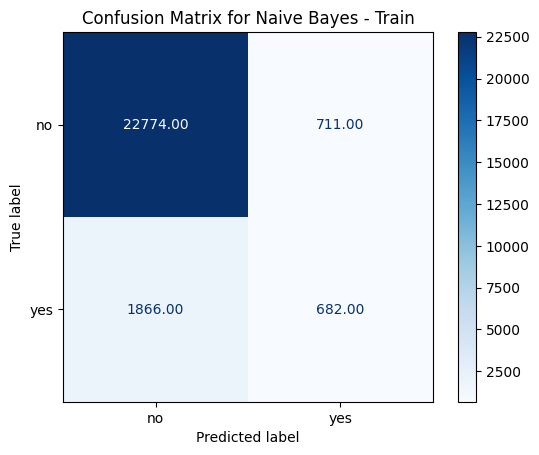

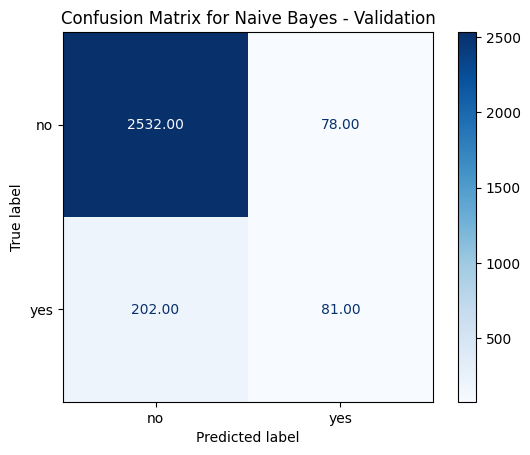


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     23485
         yes       0.49      0.27      0.35      2548

    accuracy                           0.90     26033
   macro avg       0.71      0.62      0.65     26033
weighted avg       0.88      0.90      0.89     26033


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      2610
         yes       0.51      0.29      0.37       283

    accuracy                           0.90      2893
   macro avg       0.72      0.63      0.66      2893
weighted avg       0.89      0.90      0.89      2893



In [104]:
# Define the best alpha value (replace with your best hyperparameter value)
best_alpha = 0.001

# Initialize the Naive Bayes model with the chosen smoothing parameter
nb_model = GaussianNB(var_smoothing=best_alpha)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
nb_model.fit(X_middle_aged_train_reduced, y_middle_aged_train_reduced)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = nb_model.predict(X_middle_aged_train_reduced)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = nb_model.predict(X_middle_aged_val_reduced)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_middle_aged_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_middle_aged_val_reduced, y_val_pred)

# Plot confusion matrices
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Train')
plt.show()

disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_middle_aged_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_middle_aged_val_reduced, y_val_pred, target_names=["no", "yes"]))

#### Senior

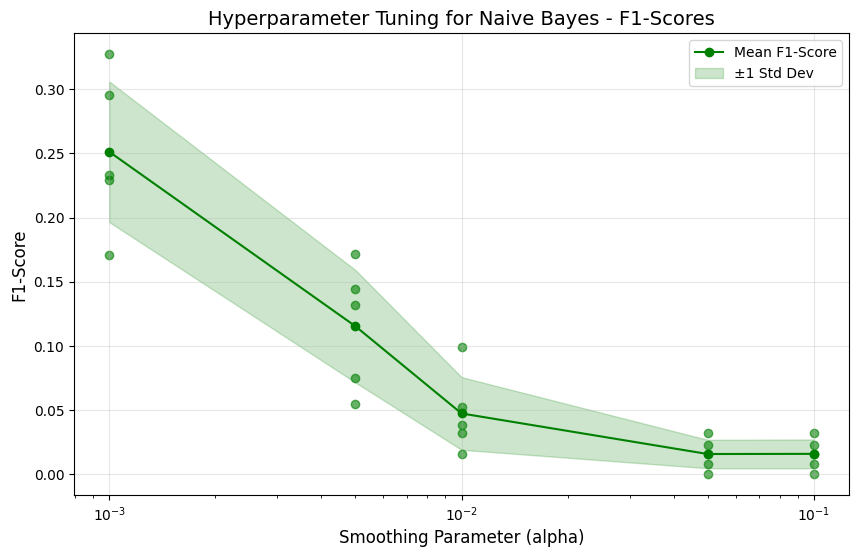

Smoothing Parameter = 0.001: F1-Scores for each fold = [0.22910217 0.29585799 0.23300971 0.17123288 0.32748538], Mean F1-Score = 0.2513
Smoothing Parameter = 0.005: F1-Scores for each fold = [0.13148789 0.1443299  0.07462687 0.05447471 0.17142857], Mean F1-Score = 0.1153
Smoothing Parameter = 0.01: F1-Scores for each fold = [0.03802281 0.05223881 0.0155642  0.03187251 0.09885932], Mean F1-Score = 0.0473
Smoothing Parameter = 0.05: F1-Scores for each fold = [0.015625   0.02290076 0.         0.00809717 0.03174603], Mean F1-Score = 0.0157
Smoothing Parameter = 0.1: F1-Scores for each fold = [0.01568627 0.02307692 0.         0.00813008 0.03212851], Mean F1-Score = 0.0158


In [105]:
# Define hyperparameter values to test (smoothing parameter alpha)
smoothing_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Initialize a dictionary to store results for each alpha
results_nb = {}

# Perform 5-fold cross-validation for each value of alpha
for alpha in smoothing_values:
    nb_model = GaussianNB(var_smoothing=alpha)  # Set the smoothing parameter
    cv_scores = cross_val_score(nb_model, X_senior_train, y_senior_train, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    results_nb[alpha] = cv_scores

# Calculate mean and standard deviation for each alpha
mean_f1_scores_nb = [np.mean(scores) for scores in results_nb.values()]
std_f1_scores_nb = [np.std(scores) for scores in results_nb.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, mean_f1_scores_nb, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(smoothing_values,
                 [m - s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 [m + s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for alpha, scores in results_nb.items():
    plt.scatter([alpha] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Naive Bayes - F1-Scores', fontsize=14)
plt.xlabel('Smoothing Parameter (alpha)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for smoothing parameter
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each alpha
for alpha, scores in results_nb.items():
    print(f"Smoothing Parameter = {alpha}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0062 seconds
Prediction runtime: 0.0008 seconds


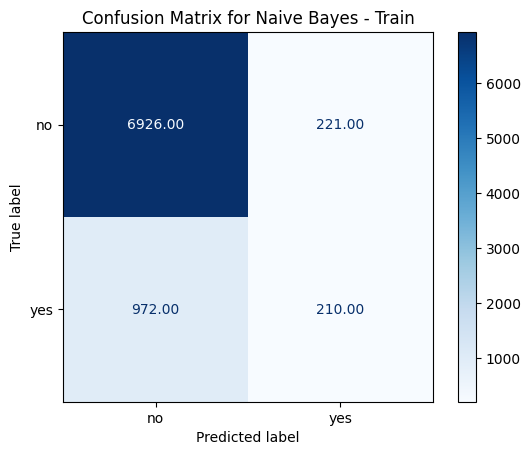

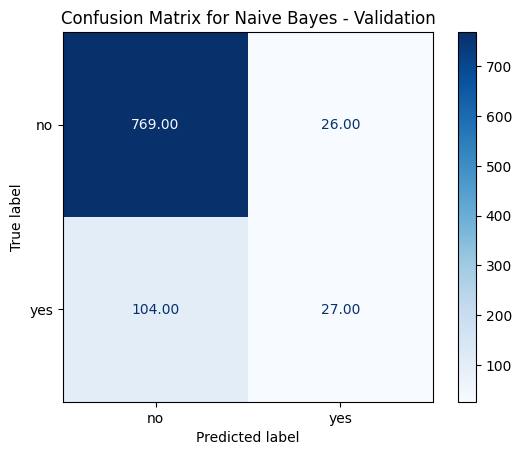


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.88      0.97      0.92      7147
         yes       0.49      0.18      0.26      1182

    accuracy                           0.86      8329
   macro avg       0.68      0.57      0.59      8329
weighted avg       0.82      0.86      0.83      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.88      0.97      0.92       795
         yes       0.51      0.21      0.29       131

    accuracy                           0.86       926
   macro avg       0.70      0.59      0.61       926
weighted avg       0.83      0.86      0.83       926



In [106]:
# Define the best alpha value (replace with your best hyperparameter value)
best_alpha = 0.001

# Initialize the Naive Bayes model with the chosen smoothing parameter
nb_model = GaussianNB(var_smoothing=best_alpha)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
nb_model.fit(X_senior_train, y_senior_train)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = nb_model.predict(X_senior_train)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = nb_model.predict(X_senior_val)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val, y_val_pred)

# Plot confusion matrices
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Train')
plt.show()

disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val, y_val_pred, target_names=["no", "yes"]))

#### Dimension reduction

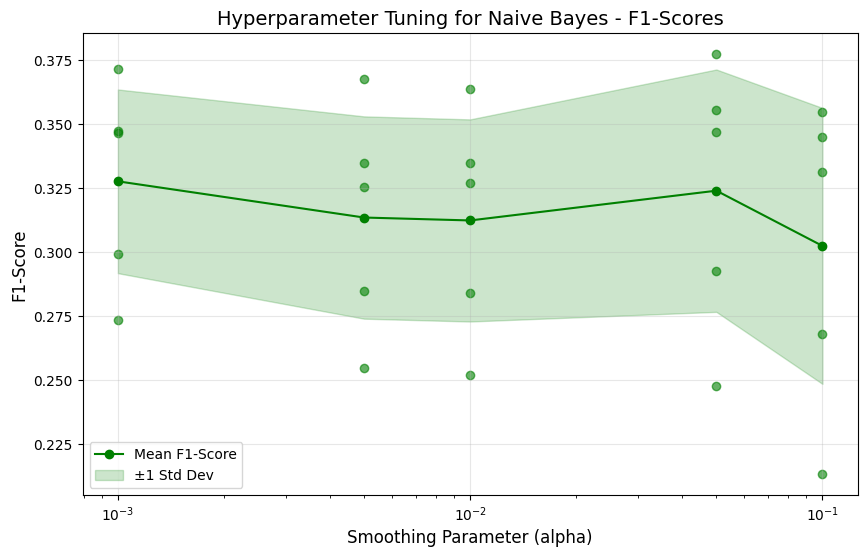

Smoothing Parameter = 0.001: F1-Scores for each fold = [0.2992126  0.34673367 0.34736842 0.27345845 0.37163814], Mean F1-Score = 0.3277
Smoothing Parameter = 0.005: F1-Scores for each fold = [0.28496042 0.33502538 0.32533333 0.25474255 0.36764706], Mean F1-Score = 0.3135
Smoothing Parameter = 0.01: F1-Scores for each fold = [0.28421053 0.33502538 0.32707775 0.25205479 0.36363636], Mean F1-Score = 0.3124
Smoothing Parameter = 0.05: F1-Scores for each fold = [0.29253731 0.35555556 0.34705882 0.24761905 0.37735849], Mean F1-Score = 0.3240
Smoothing Parameter = 0.1: F1-Scores for each fold = [0.26791277 0.34482759 0.3313253  0.21333333 0.35492958], Mean F1-Score = 0.3025


In [107]:
# Define hyperparameter values to test (smoothing parameter alpha)
smoothing_values = [0.001, 0.005, 0.01, 0.05, 0.1]

# Initialize a dictionary to store results for each alpha
results_nb = {}

# Perform 5-fold cross-validation for each value of alpha
for alpha in smoothing_values:
    nb_model = GaussianNB(var_smoothing=alpha)  # Set the smoothing parameter
    cv_scores = cross_val_score(nb_model, X_senior_train_reduced, y_senior_train_reduced, cv=5, scoring=make_scorer(f1_score, pos_label=1))
    results_nb[alpha] = cv_scores

# Calculate mean and standard deviation for each alpha
mean_f1_scores_nb = [np.mean(scores) for scores in results_nb.values()]
std_f1_scores_nb = [np.std(scores) for scores in results_nb.values()]

# Plot the mean F1-Scores with scatter points and standard deviation shadow
plt.figure(figsize=(10, 6))
plt.plot(smoothing_values, mean_f1_scores_nb, marker='o', linestyle='-', color='green', label='Mean F1-Score')
plt.fill_between(smoothing_values,
                 [m - s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 [m + s for m, s in zip(mean_f1_scores_nb, std_f1_scores_nb)],
                 color='green', alpha=0.2, label='±1 Std Dev')

# Scatter individual fold scores
for alpha, scores in results_nb.items():
    plt.scatter([alpha] * len(scores), scores, color='green', alpha=0.6, label='_nolegend_')

# Add titles, labels, and legend
plt.title('Hyperparameter Tuning for Naive Bayes - F1-Scores', fontsize=14)
plt.xlabel('Smoothing Parameter (alpha)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xscale('log')  # Logarithmic scale for smoothing parameter
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Print F1-Scores for each fold and their mean for each alpha
for alpha, scores in results_nb.items():
    print(f"Smoothing Parameter = {alpha}: F1-Scores for each fold = {scores}, Mean F1-Score = {np.mean(scores):.4f}")

Training runtime: 0.0042 seconds
Prediction runtime: 0.0006 seconds


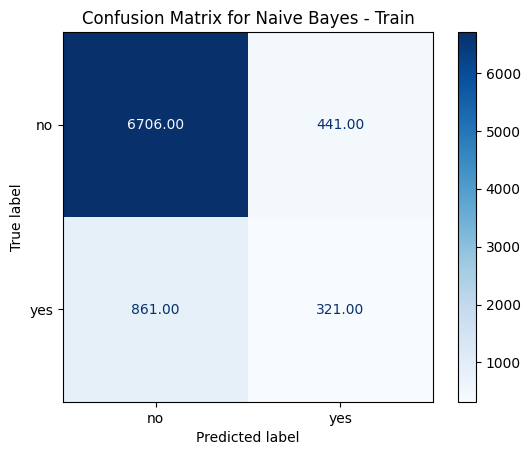

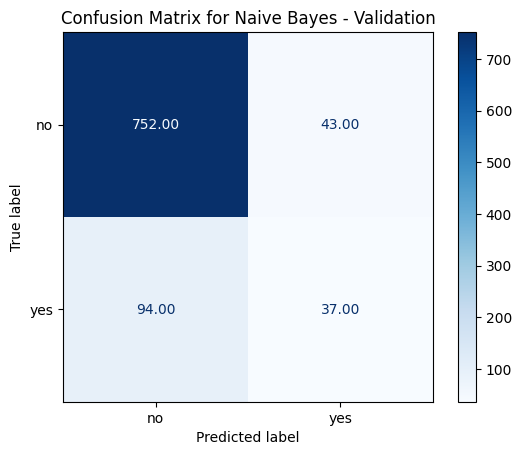


Classification Report for Train:
              precision    recall  f1-score   support

          no       0.89      0.94      0.91      7147
         yes       0.42      0.27      0.33      1182

    accuracy                           0.84      8329
   macro avg       0.65      0.60      0.62      8329
weighted avg       0.82      0.84      0.83      8329


Classification Report for Validation:
              precision    recall  f1-score   support

          no       0.89      0.95      0.92       795
         yes       0.46      0.28      0.35       131

    accuracy                           0.85       926
   macro avg       0.68      0.61      0.63       926
weighted avg       0.83      0.85      0.84       926



In [108]:
# Define the best alpha value (replace with your best hyperparameter value)
best_alpha = 0.001

# Initialize the Naive Bayes model with the chosen smoothing parameter
nb_model = GaussianNB(var_smoothing=best_alpha)

# Train the model on the entire training dataset and measure training runtime
start_time = time.time()
nb_model.fit(X_senior_train_reduced, y_senior_train_reduced)
end_time = time.time()

# Calculate and print training runtime
training_time = end_time - start_time
print(f"Training runtime: {training_time:.4f} seconds")

# Predict on the training dataset
y_train_pred = nb_model.predict(X_senior_train_reduced)

# Predict on the validation dataset and measure prediction runtime
start_time = time.time()
y_val_pred = nb_model.predict(X_senior_val_reduced)
end_time = time.time()

# Calculate and print prediction runtime
prediction_time = end_time - start_time
print(f"Prediction runtime: {prediction_time:.4f} seconds")

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_senior_train_reduced, y_train_pred)
conf_matrix_val = confusion_matrix(y_senior_val_reduced, y_val_pred)

# Plot confusion matrices
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=["no", "yes"])
disp_train.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Train')
plt.show()

disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=["no", "yes"])
disp_val.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix for Naive Bayes - Validation')
plt.show()

# Print classification reports
print("\nClassification Report for Train:")
print(classification_report(y_senior_train_reduced, y_train_pred, target_names=["no", "yes"]))

print("\nClassification Report for Validation:")
print(classification_report(y_senior_val_reduced, y_val_pred, target_names=["no", "yes"]))